In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import json
import requests
from api_keys import weather_api_key
import time
import csv 

running_data= "Resources/2019boston_marathon_runners.csv"
running_data_df= pd.read_csv(running_data)
running_data_df

BibNumber            FullName             SortName AgeOnRaceDay Gender  \
0             2    Lawrence Cherono    Cherono, Lawrence           30      M   
1             6       Lelisa Desisa       Desisa, Lelisa           29      M   
2             7    Kenneth Kipkemoi    Kipkemoi, Kenneth           34      M   
3             8        Felix Kandie        Kandie, Felix           32      M   
4            11      Geoffrey Kirui      Kirui, Geoffrey           26      M   
...         ...                 ...                  ...          ...    ...   
26651     23316  Denise Lewandowski  Lewandowski, Denise           50      F   
26652     12945       Amanda Schmid       Schmid, Amanda           32      F   
26653     23907       Rhonda Foulds       Foulds, Rhonda           55      F   
26654     15943      Candice Caesar      Caesar, Candice           46      F   
26655     23937        Denise Smith        Smith, Denise           51      F   

                  City StateAbbrev     StateName         Zip  \
0              Eldoret         NaN           NaN         NaN   
1                 Ambo         NaN           NaN         NaN   
2              Eldoret         NaN           NaN         NaN   
3                 Iten         NaN           NaN         NaN   
4             Keringet         NaN           NaN         NaN   
...                ...         ...           ...         ...   
26651  Boiling Springs         PA   Pennsylvania       17007   
26652     Grand Island         NE       Nebraska       68803   
26653           Justin         TX          Texas       76247   
26654           Fresno         TX          Texas       77545   
26655     Fort Collins         CO       Colorado  80525-2038   

      CountryOfResAbbrev          CountryOfResName CountryOfCtzAbbrev  \
0                    KEN                     Kenya                KEN   
1                    ETH                  Ethiopia                ETH   
2                    KEN                     Kenya                KEN   
3                    KEN                     Kenya                KEN   
4                    KEN                     Kenya                KEN   
...                  ...                       ...                ...   
26651                USA  United States of America                USA   
26652                USA  United States of America                USA   
26653                USA  United States of America                USA   
26654                USA  United States of America                USA   
26655                USA  United States of America                USA   

               CountryOfCtzName OfficialTime RankOverall  RankOverGender  \
0                         Kenya      2:07:57           1               1   
1                      Ethiopia      2:07:59           2               2   
2                         Kenya      2:08:07           3               3   
3                         Kenya      2:08:54           4               4   
4                         Kenya      2:08:55           5               5   
...                         ...          ...         ...             ...   
26651  United States of America      6:22:27       26641           11978   
26652  United States of America      6:35:50       26648           11979   
26653  United States of America      6:53:38       26650           11980   
26654  United States of America      7:00:57       26652           11981   
26655  United States of America      7:25:39       26656           11982   

       RankOverDivision EventGroup SubGroupLabel           SubGroup  
0                     1    Runners           NaN                NaN  
1                     2    Runners           NaN                NaN  
2                     3    Runners           NaN                NaN  
3                     4    Runners           NaN                NaN  
4                     5    Runners           NaN                NaN  
...                 ...        ...           ...                ..

In [2]:
subgroup_label_df=running_data_df.loc[running_data_df["SubGroupLabel"].isnull()]
subgroup_label_df


BibNumber            FullName             SortName AgeOnRaceDay Gender  \
0             2    Lawrence Cherono    Cherono, Lawrence           30      M   
1             6       Lelisa Desisa       Desisa, Lelisa           29      M   
2             7    Kenneth Kipkemoi    Kipkemoi, Kenneth           34      M   
3             8        Felix Kandie        Kandie, Felix           32      M   
4            11      Geoffrey Kirui      Kirui, Geoffrey           26      M   
...         ...                 ...                  ...          ...    ...   
26648     30798   Mackenzie Shubert   Shubert, Mackenzie           28      F   
26649     25235     Nikki Mcsweeney     Mcsweeney, Nikki           33      F   
26650     25616       Debbie Genest       Genest, Debbie           44      F   
26651     23316  Denise Lewandowski  Lewandowski, Denise           50      F   
26652     12945       Amanda Schmid       Schmid, Amanda           32      F   

                  City StateAbbrev      StateName    Zip CountryOfResAbbrev  \
0              Eldoret         NaN            NaN    NaN                KEN   
1                 Ambo         NaN            NaN    NaN                ETH   
2              Eldoret         NaN            NaN    NaN                KEN   
3                 Iten         NaN            NaN    NaN                KEN   
4             Keringet         NaN            NaN    NaN                KEN   
...                ...         ...            ...    ...                ...   
26648           Malden         MA   Massachusetts  02148                USA   
26649           Natick         MA   Massachusetts  01760                USA   
26650      Harrisville         RI    Rhode Island  02830                USA   
26651  Boiling Springs         PA    Pennsylvania  17007                USA   
26652     Grand Island         NE        Nebraska  68803                USA   

               CountryOfResName CountryOfCtzAbbrev          CountryOfCtzName  \
0                         Kenya                KEN                     Kenya   
1                      Ethiopia                ETH                  Ethiopia   
2                         Kenya                KEN                     Kenya   
3                         Kenya                KEN                     Kenya   
4                         Kenya                KEN                     Kenya   
...                         ...                ...                       ...   
26648  United States of America                USA  United States of America   
26649  United States of America                USA  United States of America   
26650  United States of America                USA  United States of America   
26651  United States of America                USA  United States of America   
26652  United States of America                USA  United States of America   

      OfficialTime RankOverall  RankOverGender  RankOverDivision EventGroup  \
0          2:07:57           1               1                 1    Runners   
1          2:07:59           2               2                 2    Runners   
2          2:08:07           3               3                 3    Runners   
3          2:08:54           4               4                 4    Runners   
4          2:08:55           5               5                 5    Runners   
...            ...         ...             ...               ...        ...   
26648      6:16:56       26636           11975              5658    Runners   
26649      6:18:13       26637           11976              5659    Runners   
26650      6:21:19       26640           11977              1840    Runners   
26651      6:22:27       26641           11978              1199    Runners   
26652      6:35:50       26648           11979              5660    Runners   

      SubGroupLabel SubGroup  
0               NaN      NaN  
1               NaN      NaN  
2               NaN      NaN  
3               NaN      NaN  
4               NaN      NaN  


In [3]:
subgroup= subgroup_label_df.loc[subgroup_label_df["SubGroup"].isnull()]  
subgroup

BibNumber            FullName             SortName AgeOnRaceDay Gender  \
0             2    Lawrence Cherono    Cherono, Lawrence           30      M   
1             6       Lelisa Desisa       Desisa, Lelisa           29      M   
2             7    Kenneth Kipkemoi    Kipkemoi, Kenneth           34      M   
3             8        Felix Kandie        Kandie, Felix           32      M   
4            11      Geoffrey Kirui      Kirui, Geoffrey           26      M   
...         ...                 ...                  ...          ...    ...   
26648     30798   Mackenzie Shubert   Shubert, Mackenzie           28      F   
26649     25235     Nikki Mcsweeney     Mcsweeney, Nikki           33      F   
26650     25616       Debbie Genest       Genest, Debbie           44      F   
26651     23316  Denise Lewandowski  Lewandowski, Denise           50      F   
26652     12945       Amanda Schmid       Schmid, Amanda           32      F   

                  City StateAbbrev      StateName    Zip CountryOfResAbbrev  \
0              Eldoret         NaN            NaN    NaN                KEN   
1                 Ambo         NaN            NaN    NaN                ETH   
2              Eldoret         NaN            NaN    NaN                KEN   
3                 Iten         NaN            NaN    NaN                KEN   
4             Keringet         NaN            NaN    NaN                KEN   
...                ...         ...            ...    ...                ...   
26648           Malden         MA   Massachusetts  02148                USA   
26649           Natick         MA   Massachusetts  01760                USA   
26650      Harrisville         RI    Rhode Island  02830                USA   
26651  Boiling Springs         PA    Pennsylvania  17007                USA   
26652     Grand Island         NE        Nebraska  68803                USA   

               CountryOfResName CountryOfCtzAbbrev          CountryOfCtzName  \
0                         Kenya                KEN                     Kenya   
1                      Ethiopia                ETH                  Ethiopia   
2                         Kenya                KEN                     Kenya   
3                         Kenya                KEN                     Kenya   
4                         Kenya                KEN                     Kenya   
...                         ...                ...                       ...   
26648  United States of America                USA  United States of America   
26649  United States of America                USA  United States of America   
26650  United States of America                USA  United States of America   
26651  United States of America                USA  United States of America   
26652  United States of America                USA  United States of America   

      OfficialTime RankOverall  RankOverGender  RankOverDivision EventGroup  \
0          2:07:57           1               1                 1    Runners   
1          2:07:59           2               2                 2    Runners   
2          2:08:07           3               3                 3    Runners   
3          2:08:54           4               4                 4    Runners   
4          2:08:55           5               5                 5    Runners   
...            ...         ...             ...               ...        ...   
26648      6:16:56       26636           11975              5658    Runners   
26649      6:18:13       26637           11976              5659    Runners   
26650      6:21:19       26640           11977              1840    Runners   
26651      6:22:27       26641           11978              1199    Runners   
26652      6:35:50       26648           11979              5660    Runners   

      SubGroupLabel SubGroup  
0               NaN      NaN  
1               NaN      NaN  
2               NaN      NaN  
3               NaN      NaN  
4               NaN      NaN  


In [4]:
city_df= subgroup.drop(columns=["Zip","StateAbbrev","SortName","Gender","AgeOnRaceDay", "CountryOfResName","CountryOfCtzAbbrev", "RankOverGender", "RankOverDivision", "EventGroup", "SubGroupLabel", "SubGroup"])
city_df.head()

BibNumber          FullName      City StateName CountryOfResAbbrev  \
0         2  Lawrence Cherono   Eldoret       NaN                KEN   
1         6     Lelisa Desisa      Ambo       NaN                ETH   
2         7  Kenneth Kipkemoi   Eldoret       NaN                KEN   
3         8      Felix Kandie      Iten       NaN                KEN   
4        11    Geoffrey Kirui  Keringet       NaN                KEN   

  CountryOfCtzName OfficialTime RankOverall  
0            Kenya      2:07:57           1  
1         Ethiopia      2:07:59           2  
2            Kenya      2:08:07           3  
3            Kenya      2:08:54           4  
4            Kenya      2:08:55           5

In [5]:
city_counts= city_df["City"].value_counts()
city_counts

Boston          770
New York        445
Chicago         249
Brooklyn        207
Toronto         197
               ... 
Leyden            1
Indiana           1
Portand           1
Pitt Meadows      1
Augsburg          1
Name: City, Length: 6212, dtype: int64

In [6]:
clean_city_df= city_df.drop_duplicates(["City"], keep='first', inplace=False,ignore_index=False) 
clean_city_df

BibNumber          FullName            City      StateName  \
0             2  Lawrence Cherono         Eldoret            NaN   
1             6     Lelisa Desisa            Ambo            NaN   
3             8      Felix Kandie            Iten            NaN   
4            11    Geoffrey Kirui        Keringet            NaN   
5            12     Philemon Rono        Kaptagat            NaN   
...         ...               ...             ...            ...   
26621     24044    Nancy Buonanni  Merritt Island        Florida   
26625     26470   Kristin Ellison     Paintsville       Kentucky   
26628     17988      Emma Cameron          Jabiru            NaN   
26635     26513    Ashley Glendye      Middleboro  Massachusetts   
26650     25616     Debbie Genest     Harrisville   Rhode Island   

      CountryOfResAbbrev          CountryOfCtzName OfficialTime RankOverall  
0                    KEN                     Kenya      2:07:57           1  
1                    ETH                  Ethiopia      2:07:59           2  
3                    KEN                     Kenya      2:08:54           4  
4                    KEN                     Kenya      2:08:55           5  
5                    KEN                     Kenya      2:08:57           6  
...                  ...                       ...          ...         ...  
26621                USA  United States of America      6:09:15       26591  
26625                USA  United States of America      6:10:08       26595  
26628                AUS                 Australia      6:11:20       26611  
26635                USA  United States of America      6:13:45       26620  
26650                USA  United States of America      6:21:19       26640  

[6213 rows x 8 columns]

In [7]:
#Obtain humidity data for each city.
#Add a column of humidity data to the dataframe.
#Create a stat summary table.
#Use Matplotlib to generate charts.
#Exports charts as humidity .png file.

# grouped_city_df= clean_city_df.groupby("City")
# grouped_city_df
city_list= clean_city_df["City"].unique()
city_list

array(['Eldoret', 'Ambo', 'Iten', ..., 'Jabiru', 'Middleboro',
       'Harrisville'], dtype=object)

In [ ]:
# humidity_df= clean_city_df.insert(4, "Humidity", "",True)
# humidity_df


In [12]:
Boston_humidity= 100
url = "http://api.openweathermap.org/data/2.5/weather?"
units= "imperial"
humidity_list=[]
# query_url =f"{url}appid={weather_api_key}&q={city}&units={units}"

#city_list= clean_city_df["City"].unique()
for city_name in city_list:
    time.sleep(1)
    query_url =f"{url}appid={weather_api_key}&q={city_name}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    print(json.dumps(weather_json, indent=4, sort_keys=True))
#     humidity= weather_json["main"]["humidity"]
    if  "cod" in weather_json and weather_json["cod"]== "404": 
        continue
    humidity_list.append((city_name, weather_json["main"]["humidity"]))

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 0.52,
        "lon": 35.27
    },
    "dt": 1603764458,
    "id": 198629,
    "main": {
        "feels_like": 288.34,
        "humidity": 87,
        "pressure": 1022,
        "temp": 288.15,
        "temp_max": 288.15,
        "temp_min": 288.15
    },
    "name": "Eldoret",
    "sys": {
        "country": "KE",
        "id": 2541,
        "sunrise": 1603768783,
        "sunset": 1603812335,
        "type": 1
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -10.13,
        "lon": -76.2
    },
    "dt": 1603764459,
    "id": 3947956,
    "

{
    "base": "stations",
    "clouds": {
        "all": 44
    },
    "cod": 200,
    "coord": {
        "lat": 34.69,
        "lon": -5.45
    },
    "dt": 1603764472,
    "id": 2533158,
    "main": {
        "feels_like": 282.82,
        "grnd_level": 996,
        "humidity": 71,
        "pressure": 1021,
        "sea_level": 1021,
        "temp": 284.39,
        "temp_max": 284.39,
        "temp_min": 284.39
    },
    "name": "Sidi Redouane",
    "sys": {
        "country": "MA",
        "sunrise": 1603780676,
        "sunset": 1603819987
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 17,
        "speed": 0.99
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 51
    },
    "cod": 200,
    "coord": {
        "lat": 36.07,
        "lon": 139.67
    },
    "dt": 1603

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 41.13,
        "lon": -111.93
    },
    "dt": 1603764303,
    "id": 5781809,
    "main": {
        "feels_like": 265.82,
        "humidity": 39,
        "pressure": 1023,
        "temp": 271.3,
        "temp_max": 272.59,
        "temp_min": 269.82
    },
    "name": "South Weber",
    "sys": {
        "country": "US",
        "id": 4364,
        "sunrise": 1603720338,
        "sunset": 1603758642,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": 25.68,
        "lon": -100.25
    },
    "dt": 1603764364,
    "id": 40054

{
    "base": "stations",
    "clouds": {
        "all": 96
    },
    "cod": 200,
    "coord": {
        "lat": 40.88,
        "lon": -75.25
    },
    "dt": 1603764495,
    "id": 5203809,
    "main": {
        "feels_like": 284.78,
        "humidity": 97,
        "pressure": 1018,
        "temp": 285.09,
        "temp_max": 285.37,
        "temp_min": 284.82
    },
    "name": "Northampton",
    "sys": {
        "country": "US",
        "id": 2003566,
        "sunrise": 1603711505,
        "sunset": 1603749870,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 238,
        "speed": 1.11
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 34.05,
        "lon": -118.24
    },
    "dt": 1603764325,
   

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 11.65,
        "lon": 78.17
    },
    "dt": 1603764350,
    "id": 1257629,
    "main": {
        "feels_like": 302.14,
        "humidity": 83,
        "pressure": 1011,
        "temp": 298.15,
        "temp_max": 298.15,
        "temp_min": 298.15
    },
    "name": "Salem",
    "sys": {
        "country": "IN",
        "id": 9223,
        "sunrise": 1603759102,
        "sunset": 1603801425,
        "type": 1
    },
    "timezone": 19800,
    "visibility": 3000,
    "weather": [
        {
            "description": "mist",
            "icon": "50d",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 14,
        "speed": 0.95
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 35.08,
        "lon": -106.65
    },
    "dt": 1603764507,
    "id": 5454711,
    "main

{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": 37.37,
        "lon": -122.04
    },
    "dt": 1603764319,
    "id": 5400075,
    "main": {
        "feels_like": 285.66,
        "humidity": 39,
        "pressure": 1020,
        "temp": 289.75,
        "temp_max": 291.48,
        "temp_min": 287.59
    },
    "name": "Sunnyvale",
    "sys": {
        "country": "US",
        "id": 5310,
        "sunrise": 1603722436,
        "sunset": 1603761396,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 330,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 34.73,
        "lon": -86.59
    },
    "dt": 1603764459,
    "id": 406859

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 43.61,
        "lon": -116.2
    },
    "dt": 1603764527,
    "id": 5586437,
    "main": {
        "feels_like": 269.57,
        "humidity": 21,
        "pressure": 1026,
        "temp": 275.92,
        "temp_max": 277.15,
        "temp_min": 274.26
    },
    "name": "Boise",
    "sys": {
        "country": "US",
        "id": 3479,
        "sunrise": 1603721603,
        "sunset": 1603759427,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 300,
        "speed": 4.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 41.8,
        "lon": -111.82
    },
    "dt": 1603764528,
    "id": 5776221,
   

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 47.61,
        "lon": -122.33
    },
    "dt": 1603764434,
    "id": 5809844,
    "main": {
        "feels_like": 276.68,
        "humidity": 57,
        "pressure": 1032,
        "temp": 281.18,
        "temp_max": 282.59,
        "temp_min": 280.37
    },
    "name": "Seattle",
    "sys": {
        "country": "US",
        "id": 5692,
        "sunrise": 1603723507,
        "sunset": 1603760464,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 330,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.71,
        "lon": -74.01
    },
    "dt": 1603764465,
    "id": 51

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -33.92,
        "lon": 151.22
    },
    "dt": 1603764504,
    "id": 2161608,
    "main": {
        "feels_like": 286.07,
        "humidity": 72,
        "pressure": 1020,
        "temp": 291.24,
        "temp_max": 292.59,
        "temp_min": 289.82
    },
    "name": "Kensington",
    "sys": {
        "country": "AU",
        "id": 9600,
        "sunrise": 1603738775,
        "sunset": 1603786690,
        "type": 1
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 180,
        "speed": 8.7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.27,
       

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 39.74,
        "lon": -104.98
    },
    "dt": 1603764139,
    "id": 5419384,
    "main": {
        "feels_like": 258.54,
        "humidity": 78,
        "pressure": 1021,
        "temp": 262.23,
        "temp_max": 263.71,
        "temp_min": 260.93
    },
    "name": "Denver",
    "sys": {
        "country": "US",
        "id": 3449,
        "sunrise": 1603718543,
        "sunset": 1603757102,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 275,
        "speed": 0.54
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 33.87,
        "lon": -112.15
    },
    "dt": 1603764460,
    "id": 55514

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 38.85,
        "lon": -77.35
    },
    "dt": 1603764576,
    "id": 4758041,
    "main": {
        "feels_like": 286.41,
        "humidity": 93,
        "pressure": 1020,
        "temp": 286.29,
        "temp_max": 287.04,
        "temp_min": 285.37
    },
    "name": "Fairfax",
    "sys": {
        "country": "US",
        "id": 4481,
        "sunrise": 1603711828,
        "sunset": 1603750554,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 201,
        "speed": 0.73
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 7
    },
    "cod": 200,
    "coord": {
        "lat": 31.02,
        "l

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.48,
        "lon": -90.87
    },
    "dt": 1603764309,
    "id": 4854534,
    "main": {
        "feels_like": 268.93,
        "humidity": 97,
        "pressure": 1027,
        "temp": 273.15,
        "temp_max": 273.15,
        "temp_min": 273.15
    },
    "name": "Dubuque",
    "sys": {
        "country": "US",
        "id": 3792,
        "sunrise": 1603715407,
        "sunset": 1603753465,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 330,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 35.05,
        "lon": -78.88
    },
    "dt": 1603764589,
    "id": 44

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 40.69,
        "lon": -112
    },
    "dt": 1603764367,
    "id": 5784607,
    "main": {
        "feels_like": 267.13,
        "humidity": 53,
        "pressure": 1031,
        "temp": 270.7,
        "temp_max": 272.04,
        "temp_min": 269.26
    },
    "name": "West Valley City",
    "sys": {
        "country": "US",
        "id": 2021520,
        "sunrise": 1603720314,
        "sunset": 1603758699,
        "type": 3
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 299,
        "speed": 0.66
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.67,
        "lon": -83.4
    },
    "dt": 1603764601,
    "id": 

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.65,
        "lon": -73.95
    },
    "dt": 1603764501,
    "id": 5110302,
    "main": {
        "feels_like": 287.81,
        "humidity": 93,
        "pressure": 1020,
        "temp": 287.55,
        "temp_max": 288.15,
        "temp_min": 287.04
    },
    "name": "Brooklyn",
    "sys": {
        "country": "US",
        "id": 5141,
        "sunrise": 1603711171,
        "sunset": 1603749579,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 4023,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 153,
        "speed": 1.09
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 42.28,
        "lon": -83.74
    },
    "dt": 1603764611,
    "id": 4984247,
    "

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 48.51,
        "lon": -122.61
    },
    "dt": 1603764490,
    "id": 5785657,
    "main": {
        "feels_like": 277.03,
        "humidity": 75,
        "pressure": 1032,
        "temp": 279.12,
        "temp_max": 279.82,
        "temp_min": 278.15
    },
    "name": "Anacortes",
    "sys": {
        "country": "US",
        "id": 3524,
        "sunrise": 1603723681,
        "sunset": 1603760425,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 200,
        "speed": 0.57
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 44.78,
    

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 45.4,
        "lon": -71.9
    },
    "dt": 1603764589,
    "id": 6146143,
    "main": {
        "feels_like": 276.33,
        "humidity": 100,
        "pressure": 1017,
        "temp": 278.15,
        "temp_max": 278.15,
        "temp_min": 278.15
    },
    "name": "Sherbrooke",
    "sys": {
        "country": "CA",
        "id": 924,
        "sunrise": 1603711146,
        "sunset": 1603748621,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 4023,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 310,
        "speed": 1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 80
    },
    "cod": 200,
    "coord": {
        "lat": -32.95,
        "lon": 151.67
    },
    "dt": 1603764636,
    "id": 2171766,
    "m

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 36.83,
        "lon": -119.7
    },
    "dt": 1603764646,
    "id": 5338122,
    "main": {
        "feels_like": 284.52,
        "humidity": 36,
        "pressure": 1021,
        "temp": 287.99,
        "temp_max": 289.15,
        "temp_min": 287.59
    },
    "name": "Clovis",
    "sys": {
        "country": "US",
        "id": 4056,
        "sunrise": 1603721830,
        "sunset": 1603760880,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "smoke",
            "icon": "50n",
            "id": 711,
            "main": "Smoke"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 38.38,
        "lon": -86.78
    },
    "dt": 1603764647,
    "id": 4256808,
    

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 45.49,
        "lon": -122.8
    },
    "dt": 1603764393,
    "id": 5713376,
    "main": {
        "feels_like": 278.01,
        "humidity": 59,
        "pressure": 1029,
        "temp": 280.52,
        "temp_max": 281.48,
        "temp_min": 278.71
    },
    "name": "Beaverton",
    "sys": {
        "country": "US",
        "id": 2033837,
        "sunrise": 1603723383,
        "sunset": 1603760814,
        "type": 3
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 21,
        "speed": 0.73
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 38.63,
        "lon": -90.2
    },
    "dt": 1603764413,
    "id": 44070

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 38.73,
        "lon": -90.38
    },
    "dt": 1603764446,
    "id": 4406783,
    "main": {
        "feels_like": 270.34,
        "humidity": 86,
        "pressure": 1026,
        "temp": 275.81,
        "temp_max": 276.48,
        "temp_min": 274.82
    },
    "name": "Saint Ann",
    "sys": {
        "country": "US",
        "id": 5931,
        "sunrise": 1603714948,
        "sunset": 1603753689,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 20,
        "speed": 5.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 95
    },
    "cod": 200,
    "coord": {
        "lat": 40.02,
        "lon": -79.98
    },
    "dt": 1603764670,
    "id": 

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.78,
        "lon": -73.25
    },
    "dt": 1603764680,
    "id": 5110077,
    "main": {
        "feels_like": 286.31,
        "humidity": 100,
        "pressure": 1019,
        "temp": 286.94,
        "temp_max": 287.59,
        "temp_min": 286.48
    },
    "name": "Brentwood",
    "sys": {
        "country": "US",
        "id": 4550,
        "sunrise": 1603711015,
        "sunset": 1603749400,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 4828,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 120,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 33.15,
        "lon": -96.82
    },
    "dt": 1603764398,
    "id": 4692559,
  

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 42.92,
        "lon": -83.51
    },
    "dt": 1603764693,
    "id": 4994154,
    "main": {
        "feels_like": 273.28,
        "humidity": 75,
        "pressure": 1025,
        "temp": 276.79,
        "temp_max": 278.15,
        "temp_min": 275.93
    },
    "name": "Goodrich",
    "sys": {
        "country": "US",
        "id": 4123,
        "sunrise": 1603713682,
        "sunset": 1603751657,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 260,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 39.55,
        "lon": -104.97
    },
    "dt": 1603764694,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 40.57,
        "lon": -111.86
    },
    "dt": 1603764704,
    "id": 5781061,
    "main": {
        "feels_like": 266.65,
        "humidity": 53,
        "pressure": 1022,
        "temp": 270.69,
        "temp_max": 271.48,
        "temp_min": 269.82
    },
    "name": "Sandy City",
    "sys": {
        "country": "US",
        "id": 2001508,
        "sunrise": 1603720270,
        "sunset": 1603758677,
        "type": 3
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 8,
        "speed": 1.33
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 40.8,
        "lon

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 34
    },
    "cod": 200,
    "coord": {
        "lat": 42.42,
        "lon": -88.61
    },
    "dt": 1603764718,
    "id": 4895282,
    "main": {
        "feels_like": 269.51,
        "humidity": 82,
        "pressure": 1028,
        "temp": 273.55,
        "temp_max": 274.26,
        "temp_min": 273.15
    },
    "name": "Harvard",
    "sys": {
        "country": "US",
        "id": 2006813,
        "sunrise": 1603714858,
        "sunset": 1603752929,
        "type": 3
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 335,
        "speed": 2.49
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 44.46,
    

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 43.71,
        "lon": -98.03
    },
    "dt": 1603764688,
    "id": 5229794,
    "main": {
        "feels_like": 261.48,
        "humidity": 67,
        "pressure": 1029,
        "temp": 266.15,
        "temp_max": 266.15,
        "temp_min": 266.15
    },
    "name": "Mitchell",
    "sys": {
        "country": "US",
        "id": 4891,
        "sunrise": 1603717248,
        "sunset": 1603755060,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 210,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.7,
        "lon": -71.42
    },
    "dt": 1603764657,
    "id": 5225507,


{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -19.47,
        "lon": -44.25
    },
    "dt": 1603764535,
    "id": 3447624,
    "main": {
        "feels_like": 295.53,
        "humidity": 68,
        "pressure": 1012,
        "temp": 294.53,
        "temp_max": 295.15,
        "temp_min": 293.15
    },
    "name": "Sete Lagoas",
    "sys": {
        "country": "BR",
        "id": 8344,
        "sunrise": 1603700339,
        "sunset": 1603746156,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 70,
        "speed": 1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 37.77,
        "lon": -122.42
    },
    "dt": 1603764536,
    "id": 539195

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 37.68,
        "lon": -121.77
    },
    "dt": 1603764702,
    "id": 5367440,
    "main": {
        "feels_like": 285.11,
        "humidity": 6,
        "pressure": 1020,
        "temp": 290.2,
        "temp_max": 294.15,
        "temp_min": 287.04
    },
    "name": "Livermore",
    "sys": {
        "country": "US",
        "id": 4774,
        "sunrise": 1603722397,
        "sunset": 1603761306,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 60,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.59,
        "lon": -82.92
    },
    "dt": 1603764732,
    "id": 4989133,


{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 43.1,
        "lon": -79.07
    },
    "dt": 1603764767,
    "id": 6087892,
    "main": {
        "feels_like": 278.78,
        "humidity": 93,
        "pressure": 1022,
        "temp": 280.05,
        "temp_max": 280.93,
        "temp_min": 279.15
    },
    "name": "Niagara Falls",
    "sys": {
        "country": "CA",
        "id": 4482,
        "sunrise": 1603712633,
        "sunset": 1603750575,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 95,
        "speed": 0.46
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 39.64,
        "lon": -84.07
    },
    "dt": 1603764768,
    "i

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.09,
        "lon": -83.02
    },
    "dt": 1603764779,
    "id": 5177396,
    "main": {
        "feels_like": 278.23,
        "humidity": 100,
        "pressure": 1024,
        "temp": 280.35,
        "temp_max": 281.15,
        "temp_min": 279.82
    },
    "name": "Worthington",
    "sys": {
        "country": "US",
        "id": 5238,
        "sunrise": 1603713299,
        "sunset": 1603751805,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 340,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 36.68,
        "lon": -79.42
    },
    "dt": 1603764780,
    "id

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 42.14,
        "lon": -83.24
    },
    "dt": 1603764620,
    "id": 5015456,
    "main": {
        "feels_like": 274.91,
        "humidity": 75,
        "pressure": 1025,
        "temp": 279.12,
        "temp_max": 279.26,
        "temp_min": 278.71
    },
    "name": "Woodhaven",
    "sys": {
        "country": "US",
        "id": 5219,
        "sunrise": 1603713542,
        "sunset": 1603751668,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 320,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 33.97,
        "lon": -118.43
    },
    "dt": 1603764791,
    "id": 536836

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 41.73,
        "lon": 1.83
    },
    "dt": 1603764802,
    "id": 3117533,
    "main": {
        "feels_like": 277.07,
        "humidity": 79,
        "pressure": 1012,
        "temp": 279.78,
        "temp_max": 281.48,
        "temp_min": 278.71
    },
    "name": "Manresa",
    "sys": {
        "country": "ES",
        "id": 2009765,
        "sunrise": 1603779541,
        "sunset": 1603817627,
        "type": 3
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 90,
        "gust": 2.24,
        "speed": 1.79
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 38.9,
        "lon": -77.04
    },
    "dt": 1603764776,


{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 29.42,
        "lon": -98.49
    },
    "dt": 1603764813,
    "id": 4726206,
    "main": {
        "feels_like": 274.92,
        "humidity": 81,
        "pressure": 1015,
        "temp": 282.62,
        "temp_max": 283.15,
        "temp_min": 281.48
    },
    "name": "San Antonio",
    "sys": {
        "country": "US",
        "id": 5857,
        "sunrise": 1603716179,
        "sunset": 1603756350,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 30,
        "gust": 13.4,
        "speed": 9.8
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.8,
        "lon": -81.52
    },
    "dt":

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 45.52,
        "lon": -73.65
    },
    "dt": 1603764826,
    "id": 6077315,
    "main": {
        "feels_like": 273.7,
        "humidity": 93,
        "pressure": 1020,
        "temp": 276.09,
        "temp_max": 276.48,
        "temp_min": 275.93
    },
    "name": "Mount Royal",
    "sys": {
        "country": "CA",
        "id": 943,
        "sunrise": 1603711579,
        "sunset": 1603749027,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 1
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 27
    },
    "cod": 200,
    "coord": {
        "lat": 39.7,
        "lo

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 38.42,
        "lon": -82.45
    },
    "dt": 1603764651,
    "id": 4809537,
    "main": {
        "feels_like": 285.45,
        "humidity": 93,
        "pressure": 1019,
        "temp": 286.29,
        "temp_max": 287.04,
        "temp_min": 285.37
    },
    "name": "Huntington",
    "sys": {
        "country": "US",
        "id": 4438,
        "sunrise": 1603713016,
        "sunset": 1603751814,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 9656,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 49.06,
        "lon": -122.25
    },
    "dt": 1603764742,
    "id":

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 44.76,
        "lon": -85.62
    },
    "dt": 1603764832,
    "id": 5012495,
    "main": {
        "feels_like": 269.63,
        "humidity": 74,
        "pressure": 1025,
        "temp": 274.82,
        "temp_max": 276.15,
        "temp_min": 273.15
    },
    "name": "Traverse City",
    "sys": {
        "country": "US",
        "id": 6082,
        "sunrise": 1603714375,
        "sunset": 1603751977,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 290,
        "speed": 4.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 43.03,
        "lon": -88.3
    },
    "dt": 1603764851,
    "i

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 50.93,
        "lon": 6.95
    },
    "dt": 1603764846,
    "id": 2886242,
    "main": {
        "feels_like": 277.69,
        "humidity": 81,
        "pressure": 1005,
        "temp": 281.9,
        "temp_max": 282.59,
        "temp_min": 281.15
    },
    "name": "Cologne",
    "sys": {
        "country": "DE",
        "id": 1271,
        "sunrise": 1603779360,
        "sunset": 1603815351,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 160,
        "speed": 4.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 44.65,
        "lon": -73.3


{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 46.86,
        "lon": -68.01
    },
    "dt": 1603764873,
    "id": 4960140,
    "main": {
        "feels_like": 269.31,
        "humidity": 86,
        "pressure": 1018,
        "temp": 273.68,
        "temp_max": 274.15,
        "temp_min": 273.15
    },
    "name": "Caribou",
    "rain": {
        "1h": 2.37
    },
    "snow": {
        "1h": 2.368
    },
    "sys": {
        "country": "US",
        "id": 3570,
        "sunrise": 1603710371,
        "sunset": 1603747528,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 6437,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10n",
            "id": 501,
            "main": "Rain"
        },
        {
            "description": "snow",
            "icon": "13n",
            "id": 601,
            "main": "Snow"
        },
        {
            "description": "mist

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 42.25,
        "lon": -71
    },
    "dt": 1603764884,
    "id": 4948247,
    "main": {
        "feels_like": 283.82,
        "humidity": 93,
        "pressure": 1019,
        "temp": 284.7,
        "temp_max": 285.37,
        "temp_min": 283.71
    },
    "name": "Quincy",
    "sys": {
        "country": "US",
        "id": 4967,
        "sunrise": 1603710612,
        "sunset": 1603748723,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 240,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 25.04,
        "lon": 102.72
    },
    "dt": 1603764885,
    "id": 18046

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 35.61,
        "lon": -77.37
    },
    "dt": 1603764736,
    "id": 4469160,
    "main": {
        "feels_like": 290.12,
        "humidity": 100,
        "pressure": 1021,
        "temp": 289.07,
        "temp_max": 289.82,
        "temp_min": 288.15
    },
    "name": "Greenville",
    "sys": {
        "country": "US",
        "id": 5345,
        "sunrise": 1603711565,
        "sunset": 1603750827,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 1609,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 7,
        "speed": 1.29
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.97,
        "lon": -73.96
    },
    "dt": 1603764898,
    "id": 5096742,
   

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 55.75,
        "lon": 37.62
    },
    "dt": 1603764736,
    "id": 524901,
    "main": {
        "feels_like": 275.54,
        "humidity": 80,
        "pressure": 1026,
        "temp": 278.57,
        "temp_max": 279.26,
        "temp_min": 278.15
    },
    "name": "Moscow",
    "sys": {
        "country": "RU",
        "id": 9027,
        "sunrise": 1603772728,
        "sunset": 1603807262,
        "type": 1
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 80,
        "speed": 2
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 33.53,
        "lon": 

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 32.79,
        "lon": -79.86
    },
    "dt": 1603764797,
    "id": 4588165,
    "main": {
        "feels_like": 294.07,
        "humidity": 100,
        "pressure": 1021,
        "temp": 292.25,
        "temp_max": 293.15,
        "temp_min": 291.48
    },
    "name": "Mt. Pleasant",
    "sys": {
        "country": "US",
        "id": 4761,
        "sunrise": 1603711947,
        "sunset": 1603751640,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 70,
        "speed": 2.09
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 53.13,
        "lon": -1.2
    },
    "dt": 1603764685,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": 40,
        "lon": -76.35
    },
    "dt": 1603764933,
    "id": 4559685,
    "main": {
        "feels_like": 284.79,
        "humidity": 96,
        "pressure": 1018,
        "temp": 285.05,
        "temp_max": 285.93,
        "temp_min": 284.26
    },
    "name": "Millersville",
    "sys": {
        "country": "US",
        "id": 2007003,
        "sunrise": 1603711689,
        "sunset": 1603750213,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 335,
        "speed": 0.95
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 41.22,
        "lon": -111.97
    },
    "dt": 1603764934,
    "

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 26.72,
        "lon": -80.05
    },
    "dt": 1603764943,
    "id": 4177887,
    "main": {
        "feels_like": 303.51,
        "humidity": 88,
        "pressure": 1017,
        "temp": 300.31,
        "temp_max": 301.15,
        "temp_min": 299.15
    },
    "name": "West Palm Beach",
    "sys": {
        "country": "US",
        "id": 5314,
        "sunrise": 1603711569,
        "sunset": 1603752110,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 120,
        "speed": 4.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 42.22,
        "lon": -121.78
    },
    "dt": 1603764612,
  

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 39.95,
        "lon": -86.26
    },
    "dt": 1603764835,
    "id": 4267336,
    "main": {
        "feels_like": 275.45,
        "humidity": 75,
        "pressure": 1026,
        "temp": 279.89,
        "temp_max": 280.93,
        "temp_min": 279.15
    },
    "name": "Zionsville",
    "sys": {
        "country": "US",
        "id": 6096,
        "sunrise": 1603714065,
        "sunset": 1603752594,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "drizzle",
            "icon": "09n",
            "id": 301,
            "main": "Drizzle"
        }
    ],
    "wind": {
        "deg": 330,
        "speed": 4.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 43.53,
        "lon": 5.45
    },
    "dt": 1603764690,
    "id": 3038354,

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 39.36,
        "lon": -84.31
    },
    "dt": 1603764971,
    "id": 4517698,
    "main": {
        "feels_like": 279.9,
        "humidity": 100,
        "pressure": 1024,
        "temp": 281.36,
        "temp_max": 282.15,
        "temp_min": 280.37
    },
    "name": "Mason",
    "sys": {
        "country": "US",
        "id": 4475,
        "sunrise": 1603713544,
        "sunset": 1603752179,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 360,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 34.13,
        "lon": -117.21
    },
    "dt": 1603764910,
    "id": 53568

{
    "base": "stations",
    "clouds": {
        "all": 49
    },
    "cod": 200,
    "coord": {
        "lat": -25.86,
        "lon": 28.19
    },
    "dt": 1603764929,
    "id": 1105777,
    "main": {
        "feels_like": 290.46,
        "humidity": 63,
        "pressure": 1023,
        "temp": 292.36,
        "temp_max": 293.15,
        "temp_min": 291.15
    },
    "name": "Centurion",
    "sys": {
        "country": "ZA",
        "id": 2001,
        "sunrise": 1603768899,
        "sunset": 1603815618,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 130,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": 37.55,
        "lon": -121.99
    },
    "dt": 1603764751,
    "id": 

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 35.41,
        "lon": -80.84
    },
    "dt": 1603764872,
    "id": 4472370,
    "main": {
        "feels_like": 289.89,
        "humidity": 93,
        "pressure": 1021,
        "temp": 288.86,
        "temp_max": 290.15,
        "temp_min": 288.15
    },
    "name": "Huntersville",
    "sys": {
        "country": "US",
        "id": 4592,
        "sunrise": 1603712383,
        "sunset": 1603751675,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 234,
        "speed": 0.62
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 39.52,
        "lon": -84.4
    },
    "dt": 1603764993,
    "id": 4518

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.54,
        "lon": -71.05
    },
    "dt": 1603765004,
    "id": 4942821,
    "main": {
        "feels_like": 282.36,
        "humidity": 93,
        "pressure": 1019,
        "temp": 283.88,
        "temp_max": 285.37,
        "temp_min": 282.04
    },
    "name": "Lynnfield",
    "sys": {
        "country": "US",
        "id": 3530,
        "sunrise": 1603710652,
        "sunset": 1603748707,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 200,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 39.95,
        "lon": -74.2
    },
    "dt": 1603765005,
    "id": 

{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 30.41,
        "lon": -98.04
    },
    "dt": 1603765016,
    "id": 4676287,
    "main": {
        "feels_like": 274.38,
        "humidity": 73,
        "pressure": 1018,
        "temp": 279.24,
        "temp_max": 279.82,
        "temp_min": 278.71
    },
    "name": "Briarcliff",
    "rain": {
        "1h": 0.29
    },
    "sys": {
        "country": "US",
        "id": 2032845,
        "sunrise": 1603716140,
        "sunset": 1603756173,
        "type": 3
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 313,
        "gust": 5.36,
        "speed": 4.47
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 63
    },
    "cod": 200,
    "coord": {
        "lat": 51.46,


{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 36.07,
        "lon": -79.79
    },
    "dt": 1603764868,
    "id": 4469146,
    "main": {
        "feels_like": 286.68,
        "humidity": 100,
        "pressure": 1021,
        "temp": 286.64,
        "temp_max": 287.15,
        "temp_min": 285.93
    },
    "name": "Greensboro",
    "sys": {
        "country": "US",
        "id": 4266,
        "sunrise": 1603712183,
        "sunset": 1603751371,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 190,
        "speed": 1.5
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 28.08,
        "lon": -80.61
    },
    "dt": 1603764816,
    "id": 4163971,
    "main": {
        "feels_like": 303.87,
        "humidity": 94,
        "pressure": 1017,
        "temp": 299.67,
        "temp_max": 300.37,
        "temp_min": 298.71
    },
    "name": "Melbourne",
    "sys": {
        "country": "US",
        "id": 4922,
        "sunrise": 1603711794,
        "sunset": 1603752153,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 96
    },
    "cod": 200,
    "coord": {
        "lat": 55.68,
        "lon": 12.53
    },
    "dt": 1603765044,
    "id": 26

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.77,
        "lon": -73.53
    },
    "dt": 1603765055,
    "id": 5120656,
    "main": {
        "feels_like": 286.46,
        "humidity": 93,
        "pressure": 1019,
        "temp": 286.97,
        "temp_max": 287.59,
        "temp_min": 286.48
    },
    "name": "Hicksville",
    "sys": {
        "country": "US",
        "id": 4135,
        "sunrise": 1603711081,
        "sunset": 1603749468,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 142,
        "speed": 1.93
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 32.08,
        "lon": -81.1
    },
    "dt": 1603764836,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 38.98,
        "lon": -77.1
    },
    "dt": 1603764923,
    "id": 4348599,
    "main": {
        "feels_like": 286.46,
        "humidity": 93,
        "pressure": 1020,
        "temp": 286.3,
        "temp_max": 287.04,
        "temp_min": 285.15
    },
    "name": "Bethesda",
    "sys": {
        "country": "US",
        "id": 3614,
        "sunrise": 1603711780,
        "sunset": 1603750483,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 174,
        "speed": 0.67
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 41.8,
        "lon": 13.22
    },
    "dt": 1603765067,
    "id": 3176946,
 

{
    "base": "stations",
    "clouds": {
        "all": 23
    },
    "cod": 200,
    "coord": {
        "lat": 54.8,
        "lon": -1.35
    },
    "dt": 1603765077,
    "id": 2647274,
    "main": {
        "feels_like": 278.26,
        "humidity": 78,
        "pressure": 983,
        "temp": 280.82,
        "temp_max": 281.48,
        "temp_min": 280.37
    },
    "name": "Hawthorn",
    "sys": {
        "country": "GB",
        "id": 2034000,
        "sunrise": 1603781934,
        "sunset": 1603816761,
        "type": 3
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 270,
        "gust": 6.71,
        "speed": 1.79
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 33.88,
        "lon": -84.51
    },
    "dt": 160376507

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 39.43,
        "lon": -84.17
    },
    "dt": 1603764877,
    "id": 4527624,
    "main": {
        "feels_like": 279.4,
        "humidity": 100,
        "pressure": 1024,
        "temp": 280.96,
        "temp_max": 281.48,
        "temp_min": 279.82
    },
    "name": "Warren",
    "sys": {
        "country": "US",
        "id": 4475,
        "sunrise": 1603713517,
        "sunset": 1603752139,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 360,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 29.69,
        "lon": -95.21
    },
    "dt": 1603764836,
    "id": 4717

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.43,
        "lon": -71.07
    },
    "dt": 1603764940,
    "id": 4942939,
    "main": {
        "feels_like": 282.81,
        "humidity": 93,
        "pressure": 1019,
        "temp": 283.9,
        "temp_max": 285.37,
        "temp_min": 282.04
    },
    "name": "Malden",
    "sys": {
        "country": "US",
        "id": 3486,
        "sunrise": 1603710646,
        "sunset": 1603748722,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 9656,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 200,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 35.55,
        "lon": -120.71
    },
    "dt": 1603765103,
    "id": 5401516,
    "mai

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 46.1,
        "lon": -60.75
    },
    "dt": 1603765114,
    "id": 5905138,
    "main": {
        "feels_like": 276.47,
        "humidity": 92,
        "pressure": 1025,
        "temp": 278.4,
        "temp_max": 279.26,
        "temp_min": 277.59
    },
    "name": "Baddeck",
    "sys": {
        "country": "CA",
        "id": 2004772,
        "sunrise": 1603708543,
        "sunset": 1603745872,
        "type": 3
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 115,
        "gust": 3.13,
        "speed": 0.89
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 66
    },
    "cod": 200,
    "coord": {
        "lat": 38.88,
        "lon": -77.3
    },
    "dt":

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.81,
        "lon": -73.08
    },
    "dt": 1603765126,
    "id": 5120987,
    "main": {
        "feels_like": 286.72,
        "humidity": 100,
        "pressure": 1019,
        "temp": 286.98,
        "temp_max": 287.59,
        "temp_min": 286.48
    },
    "name": "Holbrook",
    "sys": {
        "country": "US",
        "id": 4550,
        "sunrise": 1603710977,
        "sunset": 1603749356,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 4828,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 120,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 29.06,
        "lon": -95.41
    },
    "dt": 1603765127,
    "id": 4722697,
    "

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 34.26,
        "lon": -85.16
    },
    "dt": 1603764911,
    "id": 4219762,
    "main": {
        "feels_like": 293.63,
        "humidity": 83,
        "pressure": 1020,
        "temp": 292.28,
        "temp_max": 294.15,
        "temp_min": 291.48
    },
    "name": "Rome",
    "sys": {
        "country": "US",
        "id": 5680,
        "sunrise": 1603713331,
        "sunset": 1603752800,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 63,
        "speed": 1.01
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 44.1,
        "lon": -70.21
    },
    "dt": 1603765139,
    "id": 49693

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 40.1,
        "lon": -105.17
    },
    "dt": 1603765148,
    "id": 5580305,
    "main": {
        "feels_like": 256.16,
        "humidity": 72,
        "pressure": 1022,
        "temp": 260.63,
        "temp_max": 262.15,
        "temp_min": 259.26
    },
    "name": "Niwot",
    "sys": {
        "country": "US",
        "id": 3406,
        "sunrise": 1603718620,
        "sunset": 1603757115,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 241,
        "speed": 1.47
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 24.95,
        "lon": 121.58
    },
    "dt": 1603765031,
    "id": 1

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 28.07,
        "lon": -80.65
    },
    "dt": 1603764929,
    "id": 4177872,
    "main": {
        "feels_like": 303.77,
        "humidity": 94,
        "pressure": 1017,
        "temp": 299.61,
        "temp_max": 300.37,
        "temp_min": 298.71
    },
    "name": "West Melbourne",
    "sys": {
        "country": "US",
        "id": 4922,
        "sunrise": 1603711803,
        "sunset": 1603752163,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 3.6
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.46,
   

{
    "base": "stations",
    "clouds": {
        "all": 2
    },
    "cod": 200,
    "coord": {
        "lat": 29.8,
        "lon": -90.82
    },
    "dt": 1603765174,
    "id": 4343429,
    "main": {
        "feels_like": 294.89,
        "humidity": 85,
        "pressure": 1017,
        "temp": 293.78,
        "temp_max": 295.37,
        "temp_min": 292.59
    },
    "name": "Thibodaux",
    "sys": {
        "country": "US",
        "id": 2017946,
        "sunrise": 1603714364,
        "sunset": 1603754484,
        "type": 3
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 87,
        "speed": 2.41
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": 39.41,
        "lon": -76.76
    },
    "dt": 1603765175,
    "id": 43559

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 15.06,
        "lon": 120.72
    },
    "dt": 1603765186,
    "id": 1699805,
    "main": {
        "feels_like": 305.38,
        "humidity": 78,
        "pressure": 1010,
        "temp": 301.15,
        "temp_max": 301.15,
        "temp_min": 301.15
    },
    "name": "Mexico",
    "sys": {
        "country": "PH",
        "id": 8152,
        "sunrise": 1603749083,
        "sunset": 1603791022,
        "type": 1
    },
    "timezone": 28800,
    "visibility": 8000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 160,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.73,
        "lon": -74.23
    },
    "dt": 1603765135,
    "id": 509972

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 12.31,
        "lon": 76.65
    },
    "dt": 1603765198,
    "id": 1262321,
    "main": {
        "feels_like": 295.2,
        "grnd_level": 928,
        "humidity": 79,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 293.9,
        "temp_max": 293.9,
        "temp_min": 293.9
    },
    "name": "Mysore",
    "sys": {
        "country": "IN",
        "sunrise": 1603759504,
        "sunset": 1603801752
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 41,
        "speed": 1.53
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 51
    },
    "cod": 200,
    "coord": {
        "lat": -45.87,
       

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 25.47,
        "lon": -80.48
    },
    "dt": 1603765209,
    "id": 4159050,
    "main": {
        "feels_like": 303.76,
        "humidity": 83,
        "pressure": 1017,
        "temp": 300.4,
        "temp_max": 301.15,
        "temp_min": 299.82
    },
    "name": "Homestead",
    "sys": {
        "country": "US",
        "id": 4431,
        "sunrise": 1603711591,
        "sunset": 1603752294,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.41,
        "lon": -75.66
    },
    "dt": 1603765187,
    "id": 52

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 50.09,
        "lon": 14.42
    },
    "dt": 1603765219,
    "id": 3067696,
    "main": {
        "feels_like": 278.52,
        "humidity": 93,
        "pressure": 1009,
        "temp": 281.07,
        "temp_max": 282.04,
        "temp_min": 280.37
    },
    "name": "Prague",
    "rain": {
        "1h": 0.21
    },
    "sys": {
        "country": "CZ",
        "id": 6835,
        "sunrise": 1603777453,
        "sunset": 1603813673,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 200,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 14
    },
    "cod": 200,
    "coord": {
        "lat": 53.74,
        "lon": -2.96
    },
    "

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 4.75,
        "lon": -75.91
    },
    "dt": 1603765231,
    "id": 3687230,
    "main": {
        "feels_like": 292.91,
        "humidity": 73,
        "pressure": 1017,
        "temp": 294.15,
        "temp_max": 294.15,
        "temp_min": 294.15
    },
    "name": "Cartago",
    "sys": {
        "country": "CO",
        "id": 8610,
        "sunrise": 1603709298,
        "sunset": 1603752394,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 4.6
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "co

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 37.77,
        "lon": -87.11
    },
    "dt": 1603765042,
    "id": 4303436,
    "main": {
        "feels_like": 280.61,
        "humidity": 81,
        "pressure": 1024,
        "temp": 283.15,
        "temp_max": 283.15,
        "temp_min": 283.15
    },
    "name": "Owensboro",
    "sys": {
        "country": "US",
        "id": 5253,
        "sunrise": 1603714081,
        "sunset": 1603752987,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 39.99,
        "lon": -83.06
    },
    "dt": 1603765244,
    "id": 

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 33.14,
        "lon": -117.17
    },
    "dt": 1603765256,
    "id": 5392368,
    "main": {
        "feels_like": 284.28,
        "humidity": 3,
        "pressure": 1015,
        "temp": 290.26,
        "temp_max": 293.15,
        "temp_min": 287.59
    },
    "name": "San Marcos",
    "sys": {
        "country": "US",
        "id": 3700,
        "sunrise": 1603720933,
        "sunset": 1603760562,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 20,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 37.09,
        "lon": 15.28
    },
    "dt": 1603765257,
    "id": 2523082,

{
    "base": "stations",
    "clouds": {
        "all": 60
    },
    "cod": 200,
    "coord": {
        "lat": 28.22,
        "lon": -82.46
    },
    "dt": 1603765267,
    "id": 4161534,
    "main": {
        "feels_like": 302.83,
        "humidity": 71,
        "pressure": 1017,
        "temp": 300.1,
        "temp_max": 300.93,
        "temp_min": 299.26
    },
    "name": "Land O' Lakes",
    "sys": {
        "country": "US",
        "id": 2006346,
        "sunrise": 1603712248,
        "sunset": 1603752587,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 97,
        "gust": 4.02,
        "speed": 2.24
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.93,
        "lon": -73.05
    },
    "

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 32.22,
        "lon": -80.75
    },
    "dt": 1603765278,
    "id": 4581833,
    "main": {
        "feels_like": 295.9,
        "humidity": 88,
        "pressure": 1021,
        "temp": 294.42,
        "temp_max": 294.82,
        "temp_min": 294.15
    },
    "name": "Hilton Head",
    "sys": {
        "country": "US",
        "id": 4449,
        "sunrise": 1603712119,
        "sunset": 1603751896,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 77,
        "speed": 2.63
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 43.49,
        "lon": -70.45
    },
    "dt": 1603765279,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.66,
        "lon": -74.39
    },
    "dt": 1603765289,
    "id": 5104473,
    "main": {
        "feels_like": 286.78,
        "humidity": 93,
        "pressure": 1020,
        "temp": 286.53,
        "temp_max": 288.15,
        "temp_min": 285.37
    },
    "name": "Scotch Plains",
    "sys": {
        "country": "US",
        "id": 4686,
        "sunrise": 1603711278,
        "sunset": 1603749684,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 2414,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 288,
        "speed": 0.64
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.71,
        "lon": -85.46
    },
    "dt": 1603765290,
    "id": 5001924,

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.78,
        "lon": -73.85
    },
    "dt": 1603765300,
    "id": 5128824,
    "main": {
        "feels_like": 281.68,
        "humidity": 93,
        "pressure": 1019,
        "temp": 283.62,
        "temp_max": 284.26,
        "temp_min": 283.15
    },
    "name": "Niskayuna",
    "sys": {
        "country": "US",
        "id": 5782,
        "sunrise": 1603711348,
        "sunset": 1603749355,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 6437,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 61
    },
    "cod": 200,
    "coord": {
        "lat": 19.08,
        "lon": -98.27
    },
    "dt": 1603765302,
    "id": 

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 51.75,
        "lon": -1.26
    },
    "dt": 1603765256,
    "id": 2640729,
    "main": {
        "feels_like": 275.63,
        "humidity": 100,
        "pressure": 1001,
        "temp": 278.79,
        "temp_max": 279.26,
        "temp_min": 278.15
    },
    "name": "Oxford",
    "sys": {
        "country": "GB",
        "id": 1478,
        "sunrise": 1603781447,
        "sunset": 1603817205,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 190,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 34.72,
        "lon": 135.33
 

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 34.5,
        "lon": -117.19
    },
    "dt": 1603765079,
    "id": 5324363,
    "main": {
        "feels_like": 276.25,
        "humidity": 10,
        "pressure": 1022,
        "temp": 280.53,
        "temp_max": 282.59,
        "temp_min": 277.04
    },
    "name": "Apple Valley",
    "sys": {
        "country": "US",
        "id": 2004609,
        "sunrise": 1603721041,
        "sunset": 1603760463,
        "type": 3
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 100,
        "gust": 2.68,
        "speed": 0.89
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.17,
        "lon": -85.49
    },
    "dt": 

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 42.61,
        "lon": -83.15
    },
    "dt": 1603765335,
    "id": 5012639,
    "main": {
        "feels_like": 274.16,
        "humidity": 75,
        "pressure": 1025,
        "temp": 277.87,
        "temp_max": 279.15,
        "temp_min": 276.48
    },
    "name": "Troy",
    "sys": {
        "country": "US",
        "id": 6182,
        "sunrise": 1603713565,
        "sunset": 1603751601,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 2.6
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 17
    },
    "cod": 200,
    "coord": {
        "lat": 41.61,
        "lon"

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 35.33,
        "lon": -81.5
    },
    "dt": 1603765348,
    "id": 4461030,
    "main": {
        "feels_like": 289.58,
        "humidity": 93,
        "pressure": 1021,
        "temp": 288.98,
        "temp_max": 290.37,
        "temp_min": 288.15
    },
    "name": "Vestavia",
    "sys": {
        "country": "US",
        "id": 3954,
        "sunrise": 1603712535,
        "sunset": 1603751839,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 246,
        "speed": 1.3
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 39.01,
        "lon": -85.62
    },
    "dt": 1603765349,
    "id":

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 29.91,
        "lon": -90.14
    },
    "dt": 1603765315,
    "id": 4345968,
    "main": {
        "feels_like": 296.1,
        "humidity": 83,
        "pressure": 1017,
        "temp": 295.08,
        "temp_max": 296.48,
        "temp_min": 294.26
    },
    "name": "Westwego",
    "sys": {
        "country": "US",
        "id": 4990,
        "sunrise": 1603714208,
        "sunset": 1603754313,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 90,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.99,
        "lon": -88.29
    },
    "dt": 1603765360,
    "id": 4911893

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 40.52,
        "lon": -111.86
    },
    "dt": 1603765372,
    "id": 5774001,
    "main": {
        "feels_like": 264.62,
        "humidity": 50,
        "pressure": 1022,
        "temp": 270.31,
        "temp_max": 271.48,
        "temp_min": 269.26
    },
    "name": "Draper",
    "sys": {
        "country": "US",
        "id": 2010387,
        "sunrise": 1603720265,
        "sunset": 1603758681,
        "type": 3
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 134,
        "gust": 4.92,
        "speed": 3.58
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 46.88,
        "lon": -96.79
    },
    "dt": 1603765153,
    "id": 5059163,
    "main": {
        "feels_like": 257.55,
        "humidity": 67,
        "pressure": 1025,
        "temp": 265.15,
        "temp_max": 265.15,
        "temp_min": 265.15
    },
    "name": "Fargo",
    "sys": {
        "country": "US",
        "id": 4060,
        "sunrise": 1603717288,
        "sunset": 1603754425,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 190,
        "speed": 6.2
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 21.31,
        "lon": -157.86
    },
    "dt": 1603765384,
    "id": 5856195,
 

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 43.96,
        "lon": -91.26
    },
    "dt": 1603765394,
    "id": 5256613,
    "main": {
        "feels_like": 265.81,
        "humidity": 63,
        "pressure": 1029,
        "temp": 269.86,
        "temp_max": 272.15,
        "temp_min": 268.15
    },
    "name": "Holmen",
    "sys": {
        "country": "US",
        "id": 4764,
        "sunrise": 1603715647,
        "sunset": 1603753412,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 270,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 52.95,
        "lon": -1.15
    },
    "dt": 1603765356,
    "id": 2641

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 32.39,
        "lon": -96.85
    },
    "dt": 1603765398,
    "id": 4740328,
    "main": {
        "feels_like": 271.71,
        "humidity": 100,
        "pressure": 1021,
        "temp": 278.5,
        "temp_max": 279.26,
        "temp_min": 278.15
    },
    "name": "Waxahachie",
    "sys": {
        "country": "US",
        "id": 4604,
        "sunrise": 1603715997,
        "sunset": 1603755745,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 4828,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 350,
        "gust": 10.8,
        "speed": 8.2
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 38.7,
        "lon": -77.23
    },
    "dt": 1603765259,
  

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 35.84,
        "lon": -90.9
    },
    "dt": 1603765417,
    "id": 4116834,
    "main": {
        "feels_like": 278.23,
        "humidity": 93,
        "pressure": 1023,
        "temp": 282.26,
        "temp_max": 282.59,
        "temp_min": 282.04
    },
    "name": "Winesburg",
    "rain": {
        "1h": 0.35
    },
    "sys": {
        "country": "US",
        "id": 4566,
        "sunrise": 1603714833,
        "sunset": 1603754053,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 50,
        "speed": 5.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 44.81,
        "lon": -91.5
    },
  

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.7,
        "lon": -88.07
    },
    "dt": 1603765428,
    "id": 4885265,
    "main": {
        "feels_like": 271.19,
        "humidity": 80,
        "pressure": 1027,
        "temp": 275.15,
        "temp_max": 275.93,
        "temp_min": 274.26
    },
    "name": "Bolingbrook",
    "sys": {
        "country": "US",
        "id": 4744,
        "sunrise": 1603714660,
        "sunset": 1603752868,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 360,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 79
    },
    "cod": 200,
    "coord": {
        "lat": 39.4,
        "lon": -76.6
    },
    "dt": 1603765429,
    "id": 

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 41.46,
        "lon": -81.07
    },
    "dt": 1603765440,
    "id": 5162859,
    "main": {
        "feels_like": 276.63,
        "humidity": 93,
        "pressure": 1024,
        "temp": 279.97,
        "temp_max": 280.37,
        "temp_min": 279.82
    },
    "name": "Middlefield",
    "rain": {
        "1h": 0.45
    },
    "sys": {
        "country": "US",
        "id": 2006525,
        "sunrise": 1603712956,
        "sunset": 1603751212,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 320,
        "speed": 3.39
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -23.65,
        "lon": -46.8

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 34.14,
        "lon": -117.87
    },
    "dt": 1603765452,
    "id": 5352439,
    "main": {
        "feels_like": 284.72,
        "humidity": 15,
        "pressure": 1016,
        "temp": 288.89,
        "temp_max": 291.15,
        "temp_min": 286.48
    },
    "name": "Glendora",
    "sys": {
        "country": "US",
        "id": 3971,
        "sunrise": 1603721177,
        "sunset": 1603760654,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 4828,
    "weather": [
        {
            "description": "smoke",
            "icon": "50n",
            "id": 711,
            "main": "Smoke"
        },
        {
            "description": "dust",
            "icon": "50n",
            "id": 761,
            "main": "Dust"
        }
    ],
    "wind": {
        "deg": 310,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40


{
    "base": "stations",
    "clouds": {
        "all": 66
    },
    "cod": 200,
    "coord": {
        "lat": 51.26,
        "lon": -1.09
    },
    "dt": 1603765412,
    "id": 2656192,
    "main": {
        "feels_like": 276.81,
        "humidity": 93,
        "pressure": 1001,
        "temp": 280.37,
        "temp_max": 280.37,
        "temp_min": 280.37
    },
    "name": "Basingstoke",
    "sys": {
        "country": "GB",
        "id": 2016598,
        "sunrise": 1603781337,
        "sunset": 1603817233,
        "type": 3
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 229,
        "speed": 3.83
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 20.88,
        "lon": -156.68
    },
    "dt": 1603765274,
    "id": 

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.58,
        "lon": -83.36
    },
    "dt": 1603765476,
    "id": 5004551,
    "main": {
        "feels_like": 273.81,
        "humidity": 80,
        "pressure": 1024,
        "temp": 277.14,
        "temp_max": 277.59,
        "temp_min": 276.48
    },
    "name": "Orchard Lake",
    "sys": {
        "country": "US",
        "id": 5424,
        "sunrise": 1603713613,
        "sunset": 1603751654,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 300,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.69,
        "lon": -75.22
    },
    "dt": 1603765412,
    "i

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 45.54,
        "lon": 13.66
    },
    "dt": 1603765487,
    "id": 3199017,
    "main": {
        "feels_like": 286.93,
        "humidity": 77,
        "pressure": 1005,
        "temp": 290.84,
        "temp_max": 291.48,
        "temp_min": 289.82
    },
    "name": "Izola",
    "rain": {
        "1h": 0.49
    },
    "sys": {
        "country": "SI",
        "id": 6831,
        "sunrise": 1603777090,
        "sunset": 1603814400,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light intensity shower rain",
            "icon": "09n",
            "id": 520,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 150,
        "gust": 13.9,
        "speed": 7.2
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 37

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 40.39,
        "lon": -111.85
    },
    "dt": 1603765485,
    "id": 5777224,
    "main": {
        "feels_like": 266.08,
        "humidity": 49,
        "pressure": 1024,
        "temp": 270.2,
        "temp_max": 271.48,
        "temp_min": 269.26
    },
    "name": "Lehi",
    "sys": {
        "country": "US",
        "id": 2001387,
        "sunrise": 1603720251,
        "sunset": 1603758691,
        "type": 3
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 354,
        "speed": 1.3
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 41.71,
        "lon": 0.89
    },
    "dt": 1603765500,
    "id": 6358864,
   

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.84,
        "lon": -72.83
    },
    "dt": 1603765512,
    "id": 4845277,
    "main": {
        "feels_like": 281.44,
        "humidity": 93,
        "pressure": 1020,
        "temp": 282.46,
        "temp_max": 283.15,
        "temp_min": 281.48
    },
    "name": "Weatogue",
    "sys": {
        "country": "US",
        "id": 3411,
        "sunrise": 1603711013,
        "sunset": 1603749200,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 286,
        "speed": 0.87
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 45.27,
        "lon": -72.15
    },
    "dt": 1603765229,
    "id":

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 39.57,
        "lon": 2.65
    },
    "dt": 1603765524,
    "id": 2512989,
    "main": {
        "feels_like": 285.22,
        "humidity": 48,
        "pressure": 1017,
        "temp": 289.21,
        "temp_max": 289.82,
        "temp_min": 288.71
    },
    "name": "Palma de Mallorca",
    "sys": {
        "country": "ES",
        "id": 9693,
        "sunrise": 1603779143,
        "sunset": 1603817632,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 310,
        "speed": 4.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 2
    },
    "cod": 200,
    "coord": {
        "lat": 53.8,
        "lon": -1.55
    },
    "dt": 1603765352,
    "id": 333316

{
    "base": "stations",
    "clouds": {
        "all": 45
    },
    "cod": 200,
    "coord": {
        "lat": 51.42,
        "lon": 3.75
    },
    "dt": 1603765537,
    "id": 2744011,
    "main": {
        "feels_like": 275.15,
        "humidity": 93,
        "pressure": 1001,
        "temp": 281.52,
        "temp_max": 282.15,
        "temp_min": 280.93
    },
    "name": "Provincie Zeeland",
    "sys": {
        "country": "NL",
        "id": 1553,
        "sunrise": 1603780197,
        "sunset": 1603816050,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 210,
        "speed": 8.2
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 33.02,
        "lon": -96.7
    },
    "dt": 1603765364,
    

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 33.83,
        "lon": -118.28
    },
    "dt": 1603765548,
    "id": 5334519,
    "main": {
        "feels_like": 286.26,
        "humidity": 20,
        "pressure": 1016,
        "temp": 291.72,
        "temp_max": 293.71,
        "temp_min": 289.26
    },
    "name": "Carson",
    "sys": {
        "country": "US",
        "id": 6037,
        "sunrise": 1603721251,
        "sunset": 1603760776,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 8047,
    "weather": [
        {
            "description": "haze",
            "icon": "50n",
            "id": 721,
            "main": "Haze"
        }
    ],
    "wind": {
        "deg": 120,
        "speed": 4.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.17,
        "lon": -81.2
    },
    "dt": 1603765549,
    "id": 5167284,
    "ma

{
    "base": "stations",
    "clouds": {
        "all": 9
    },
    "cod": 200,
    "coord": {
        "lat": 50.91,
        "lon": 2.92
    },
    "dt": 1603765559,
    "id": 2787891,
    "main": {
        "feels_like": 278.5,
        "humidity": 89,
        "pressure": 1004,
        "temp": 280.7,
        "temp_max": 280.93,
        "temp_min": 280.37
    },
    "name": "Langemark",
    "sys": {
        "country": "BE",
        "id": 2002836,
        "sunrise": 1603780326,
        "sunset": 1603816320,
        "type": 3
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 166,
        "gust": 3.13,
        "speed": 1.79
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 36.15,
        "lon": -86.78
    },
    "dt": 160376556

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 36.04,
        "lon": -114.98
    },
    "dt": 1603765533,
    "id": 5505411,
    "main": {
        "feels_like": 277.3,
        "humidity": 14,
        "pressure": 1020,
        "temp": 283.59,
        "temp_max": 285.93,
        "temp_min": 282.15
    },
    "name": "Henderson",
    "sys": {
        "country": "US",
        "id": 3527,
        "sunrise": 1603720632,
        "sunset": 1603759812,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 20,
        "speed": 4.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 33
    },
    "cod": 200,
    "coord": {
        "lat": 50.73,
        "lon": 4.3
    },
    "dt": 1603765573,
    "id": 2800866,
  

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 42.7,
        "lon": -74.92
    },
    "dt": 1603765584,
    "id": 5113664,
    "main": {
        "feels_like": 279.35,
        "humidity": 94,
        "pressure": 1017,
        "temp": 282.15,
        "temp_max": 284.26,
        "temp_min": 281.48
    },
    "name": "Cooperstown",
    "rain": {
        "1h": 0.18
    },
    "sys": {
        "country": "US",
        "id": 2006505,
        "sunrise": 1603711597,
        "sunset": 1603749619,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 614,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 301,
        "speed": 3.37
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 51.11,
        "lon": -0.18
  

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.98,
        "lon": -78.88
    },
    "dt": 1603765597,
    "id": 7259084,
    "main": {
        "feels_like": 276.92,
        "humidity": 87,
        "pressure": 1022,
        "temp": 279.62,
        "temp_max": 280.37,
        "temp_min": 279.15
    },
    "name": "Tonawanda",
    "sys": {
        "country": "US",
        "id": 3518,
        "sunrise": 1603712576,
        "sunset": 1603750541,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 290,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 39.58,
        "lon": -104.88
    },
    "dt": 1603765407,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.01,
        "lon": -73.78
    },
    "dt": 1603765608,
    "id": 5136433,
    "main": {
        "feels_like": 287.45,
        "humidity": 100,
        "pressure": 1019,
        "temp": 286.73,
        "temp_max": 288.15,
        "temp_min": 285.37
    },
    "name": "Scarsdale",
    "sys": {
        "country": "US",
        "id": 4403,
        "sunrise": 1603711163,
        "sunset": 1603749506,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 2414,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 300,
        "speed": 0.57
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.67,
        "lon": -87.8
    },
    "dt": 1603765609,
    "id": 4905259,
   

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 33.85,
        "lon": -84.22
    },
    "dt": 1603765513,
    "id": 4227213,
    "main": {
        "feels_like": 292.61,
        "humidity": 93,
        "pressure": 1021,
        "temp": 291.29,
        "temp_max": 291.48,
        "temp_min": 290.93
    },
    "name": "Tucker",
    "sys": {
        "country": "US",
        "id": 5323,
        "sunrise": 1603713074,
        "sunset": 1603752606,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 44.56,
        "lon": -123.26
    },
    "dt": 1603765333,
    "id": 5720

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 41.39,
        "lon": 2.16
    },
    "dt": 1603765359,
    "id": 3128760,
    "main": {
        "feels_like": 283.32,
        "humidity": 58,
        "pressure": 1015,
        "temp": 286.26,
        "temp_max": 287.04,
        "temp_min": 285.15
    },
    "name": "Barcelona",
    "sys": {
        "country": "ES",
        "id": 6398,
        "sunrise": 1603779429,
        "sunset": 1603817581,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 270,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 3
    },
    "cod": 200,
    "coord": {
        "lat": 28.57,
        "lon": -81.59
    },
    "dt": 1603765514,
    "id": 4178550,


{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 30.41,
        "lon": -88.53
    },
    "dt": 1603765642,
    "id": 4436743,
    "main": {
        "feels_like": 294.06,
        "humidity": 88,
        "pressure": 1017,
        "temp": 292.81,
        "temp_max": 293.15,
        "temp_min": 292.59
    },
    "name": "Moss Point",
    "sys": {
        "country": "US",
        "id": 5398,
        "sunrise": 1603713857,
        "sunset": 1603753892,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 46,
        "speed": 1.98
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 46.9,
        "lon": 6.78
    },
    "dt": 1603765644,
    "id": 266

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 31.77,
        "lon": 35.22
    },
    "dt": 1603765551,
    "id": 281184,
    "main": {
        "feels_like": 293.68,
        "humidity": 82,
        "pressure": 1012,
        "temp": 292.37,
        "temp_max": 293.71,
        "temp_min": 290.37
    },
    "name": "Jerusalem",
    "sys": {
        "country": "IL",
        "id": 6845,
        "sunrise": 1603770686,
        "sunset": 1603810457,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": 51.37,
        "lon": 0.1
    },
    "dt": 1603765655,
    "id": 2640894,
    "main"

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 14.63,
        "lon": -90.61
    },
    "dt": 1603765667,
    "id": 3592519,
    "main": {
        "feels_like": 291.75,
        "humidity": 82,
        "pressure": 1022,
        "temp": 291.52,
        "temp_max": 293.15,
        "temp_min": 289.82
    },
    "name": "Mixco",
    "sys": {
        "country": "GT",
        "id": 7079,
        "sunrise": 1603713370,
        "sunset": 1603755377,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 220,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 42.2,
        "lon": -73.36
    },
    "dt": 1603765668,
    "id": 49

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 60.47,
        "lon": 25.09
    },
    "dt": 1603765680,
    "id": 655958,
    "main": {
        "feels_like": 279.73,
        "humidity": 100,
        "pressure": 1007,
        "temp": 282.96,
        "temp_max": 283.15,
        "temp_min": 282.59
    },
    "name": "J\u00e4rvenp\u00e4\u00e4",
    "sys": {
        "country": "FI",
        "id": 1332,
        "sunrise": 1603776680,
        "sunset": 1603809324,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 4000,
    "weather": [
        {
            "description": "drizzle",
            "icon": "09n",
            "id": 301,
            "main": "Drizzle"
        }
    ],
    "wind": {
        "deg": 150,
        "speed": 4.6
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },


{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 21.17,
        "lon": -86.85
    },
    "dt": 1603765405,
    "id": 3531673,
    "main": {
        "feels_like": 292.25,
        "humidity": 69,
        "pressure": 1004,
        "temp": 301.03,
        "temp_max": 301.15,
        "temp_min": 300.93
    },
    "name": "Canc\u00fan",
    "sys": {
        "country": "MX",
        "id": 7177,
        "sunrise": 1603712851,
        "sunset": 1603754091,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 110,
        "gust": 25.2,
        "speed": 19
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 57.15,
        "lon": -2.28
    },
    "dt":

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 19.53,
        "lon": -99.22
    },
    "dt": 1603765524,
    "id": 3515431,
    "main": {
        "feels_like": 288.81,
        "humidity": 45,
        "pressure": 1023,
        "temp": 292.09,
        "temp_max": 292.15,
        "temp_min": 292.04
    },
    "name": "Tlalnepantla",
    "sys": {
        "country": "MX",
        "id": 7146,
        "sunrise": 1603715722,
        "sunset": 1603757158,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 80,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 44.89,
        "lon": -71.5
    },
    "dt": 1603765707,
    "id

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 95
    },
    "cod": 200,
    "coord": {
        "lat": 40.16,
        "lon": -76.39
    },
    "dt": 1603765658,
    "id": 5199648,
    "main": {
        "feels_like": 284.51,
        "humidity": 97,
        "pressure": 1022,
        "temp": 285.01,
        "temp_max": 285.93,
        "temp_min": 284.26
    },
    "name": "Manheim",
    "sys": {
        "country": "US",
        "id": 2007494,
        "sunrise": 1603711713,
        "sunset": 1603750209,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 289,
        "gust": 3.13,
        "speed": 1.34
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
     

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 46.35,
        "lon": -72.55
    },
    "dt": 1603765649,
    "id": 6169141,
    "main": {
        "feels_like": 271.36,
        "humidity": 100,
        "pressure": 1019,
        "temp": 273.93,
        "temp_max": 274.15,
        "temp_min": 273.71
    },
    "name": "Trois-Rivi\u00e8res",
    "rain": {
        "1h": 0.34
    },
    "snow": {
        "1h": 0.3356
    },
    "sys": {
        "country": "CA",
        "id": 919,
        "sunrise": 1603711405,
        "sunset": 1603748673,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "light snow",
            "icon": "13n",
            "id": 600,
            "main": "Snow"
        },
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
         

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 32.73,
        "lon": -97.32
    },
    "dt": 1603765584,
    "id": 4691930,
    "main": {
        "feels_like": 270.1,
        "humidity": 100,
        "pressure": 1022,
        "temp": 276.86,
        "temp_max": 277.15,
        "temp_min": 276.15
    },
    "name": "Fort Worth",
    "sys": {
        "country": "US",
        "id": 4149,
        "sunrise": 1603716135,
        "sunset": 1603755832,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 6437,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 350,
        "gust": 10.3,
        "speed": 7.7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.58,
        "lon": -85.83
    },
    "dt": 1603765742,


{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 42.31,
        "lon": -71.52
    },
    "dt": 1603765753,
    "id": 4951591,
    "main": {
        "feels_like": 280.78,
        "humidity": 95,
        "pressure": 1017,
        "temp": 282.12,
        "temp_max": 283.71,
        "temp_min": 280.93
    },
    "name": "Southborough",
    "sys": {
        "country": "US",
        "id": 2002608,
        "sunrise": 1603710743,
        "sunset": 1603748842,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 200,
        "speed": 1.32
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 45.53

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -33.9,
        "lon": 151.19
    },
    "dt": 1603765766,
    "id": 2147714,
    "main": {
        "feels_like": 285.71,
        "humidity": 68,
        "pressure": 1019,
        "temp": 291.17,
        "temp_max": 292.04,
        "temp_min": 290.37
    },
    "name": "Erskineville",
    "sys": {
        "country": "AU",
        "id": 9600,
        "sunrise": 1603738784,
        "sunset": 1603786695,
        "type": 1
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 180,
        "speed": 8.7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -27.49,
        "lon": 153.06
    },
    "dt": 1603765671,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 40.28,
        "lon": -3.79
    },
    "dt": 1603765560,
    "id": 3121960,
    "main": {
        "feels_like": 277.33,
        "humidity": 75,
        "pressure": 1020,
        "temp": 281.19,
        "temp_max": 282.04,
        "temp_min": 280.15
    },
    "name": "Fuenlabrada",
    "sys": {
        "country": "ES",
        "id": 6443,
        "sunrise": 1603780754,
        "sunset": 1603819112,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 240,
        "speed": 3.6
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.96,
        "lon": -88.01
    },
    "dt": 1603765795,
    "id": 5255068,
    "main": {
        "feels_like": 270.09,
        "humidity": 59,
        "pressure": 1027,
        "temp": 274.27,
        "temp_max": 275.37,
        "temp_min": 273.71
    },
    "name": "Greenfield",
    "sys": {
        "country": "US",
        "id": 5012,
        "sunrise": 1603714767,
        "sunset": 1603752732,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 300,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 51.62,
        "lon": 15.31
    },
    "dt": 1603765796,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 50.91,
        "lon": 4.67
    },
    "dt": 1603765806,
    "id": 2796013,
    "main": {
        "feels_like": 278,
        "humidity": 87,
        "pressure": 1003,
        "temp": 281.68,
        "temp_max": 282.04,
        "temp_min": 281.15
    },
    "name": "Herent",
    "sys": {
        "country": "BE",
        "id": 1227,
        "sunrise": 1603779905,
        "sunset": 1603815900,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 220,
        "speed": 4.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 39.55,
        "lon": -104.89
    },
    "dt": 1603765526,
    "id": 5429208,
    

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 32.93,
        "lon": -96.9
    },
    "dt": 1603765817,
    "id": 4690198,
    "main": {
        "feels_like": 272.33,
        "humidity": 86,
        "pressure": 1021,
        "temp": 277.53,
        "temp_max": 278.15,
        "temp_min": 277.04
    },
    "name": "Farmers Branch",
    "sys": {
        "country": "US",
        "id": 3783,
        "sunrise": 1603716049,
        "sunset": 1603755717,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 9656,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 340,
        "gust": 9.8,
        "speed": 5.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 37.42,
        "lon": -6.86
    },
    "dt": 1603765819,

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.91,
        "lon": -73.78
    },
    "dt": 1603765830,
    "id": 5128549,
    "main": {
        "feels_like": 287.32,
        "humidity": 87,
        "pressure": 1019,
        "temp": 287.1,
        "temp_max": 288.15,
        "temp_min": 285.93
    },
    "name": "New Rochelle",
    "sys": {
        "country": "US",
        "id": 4698,
        "sunrise": 1603711154,
        "sunset": 1603749515,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 8047,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 301,
        "speed": 0.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 44.55,
        "lon": -69.63
    },
    "dt": 1603765832,
    "id": 4982236,
  

{
    "base": "stations",
    "clouds": {
        "all": 95
    },
    "cod": 200,
    "coord": {
        "lat": 40.11,
        "lon": -76.5
    },
    "dt": 1603765843,
    "id": 5202202,
    "main": {
        "feels_like": 284.5,
        "humidity": 93,
        "pressure": 1021,
        "temp": 284.9,
        "temp_max": 285.37,
        "temp_min": 284.26
    },
    "name": "Mount Joy",
    "sys": {
        "country": "US",
        "id": 2016689,
        "sunrise": 1603711735,
        "sunset": 1603750239,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 269,
        "gust": 2.24,
        "speed": 0.89
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.13,
        "lon": -75.87
    },
    "dt"

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.94,
        "lon": -74.13
    },
    "dt": 1603765851,
    "id": 5097773,
    "main": {
        "feels_like": 285.6,
        "humidity": 93,
        "pressure": 1019,
        "temp": 286.08,
        "temp_max": 286.48,
        "temp_min": 285.37
    },
    "name": "Fair Lawn",
    "sys": {
        "country": "US",
        "id": 6015,
        "sunrise": 1603711241,
        "sunset": 1603749596,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 2414,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 330,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 31.33,
        "lon": -89.29
    },
    "dt": 1603765713,
    "id": 4429295,
    "

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 38.3,
        "lon": -76.51
    },
    "dt": 1603765867,
    "id": 4350049,
    "main": {
        "feels_like": 289.21,
        "humidity": 93,
        "pressure": 1020,
        "temp": 288.64,
        "temp_max": 290.15,
        "temp_min": 288.15
    },
    "name": "California",
    "sys": {
        "country": "US",
        "id": 5090,
        "sunrise": 1603711579,
        "sunset": 1603750400,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 4023,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 292,
        "speed": 1.17
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 44.8,
        "lon": -0.6
    },
    "dt": 1603765869,
    "id": 2973495,
    "m

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.66,
        "lon": -71
    },
    "dt": 1603765752,
    "id": 4931108,
    "main": {
        "feels_like": 281.49,
        "humidity": 93,
        "pressure": 1019,
        "temp": 283.14,
        "temp_max": 285.37,
        "temp_min": 280.93
    },
    "name": "Boxford",
    "sys": {
        "country": "US",
        "id": 3530,
        "sunrise": 1603710652,
        "sunset": 1603748683,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 3219,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 197,
        "speed": 2.01
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 3.69,
        "lon": -76.31
    },
    "dt": 1603765880,
    "id": 3684615,
    "main

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 33.97,
        "lon": -84.22
    },
    "dt": 1603765891,
    "id": 4198645,
    "main": {
        "feels_like": 292.57,
        "humidity": 93,
        "pressure": 1021,
        "temp": 291.26,
        "temp_max": 291.48,
        "temp_min": 290.93
    },
    "name": "Peachtree Corners",
    "sys": {
        "country": "US",
        "id": 5323,
        "sunrise": 1603713083,
        "sunset": 1603752597,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 39.76,
        "lon": -86.53
    },
    "dt": 1603765892,
  

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 42,
        "lon": -73.88
    },
    "dt": 1603765903,
    "id": 5133545,
    "main": {
        "feels_like": 282.17,
        "humidity": 97,
        "pressure": 1018,
        "temp": 282.68,
        "temp_max": 283.15,
        "temp_min": 282.04
    },
    "name": "Red Hook",
    "sys": {
        "country": "US",
        "id": 2033439,
        "sunrise": 1603711280,
        "sunset": 1603749437,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 191,
        "gust": 2.68,
        "speed": 0.45
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 65
    },
    "cod": 200,
    "coord": {
     

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 59.33,
        "lon": 18.06
    },
    "dt": 1603765805,
    "id": 2673730,
    "main": {
        "feels_like": 280.88,
        "humidity": 93,
        "pressure": 1000,
        "temp": 283.54,
        "temp_max": 284.15,
        "temp_min": 283.15
    },
    "name": "Stockholm",
    "rain": {
        "1h": 0.15
    },
    "sys": {
        "country": "SE",
        "id": 1788,
        "sunrise": 1603778117,
        "sunset": 1603811261,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 3500,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        },
        {
            "description": "light intensity drizzle",
            "icon": "09n",
            "id": 300,
            "main": "Drizzle"
        }
    ],
    "wind": {
        "deg": 150,
        "speed": 3.6
   

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 39.92,
        "lon": -75.49
    },
    "dt": 1603765932,
    "id": 5186677,
    "main": {
        "feels_like": 288.2,
        "humidity": 100,
        "pressure": 1020,
        "temp": 287.61,
        "temp_max": 288.15,
        "temp_min": 287.04
    },
    "name": "Glen Mills",
    "sys": {
        "country": "US",
        "id": 5209,
        "sunrise": 1603711476,
        "sunset": 1603750014,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 4828,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 326,
        "speed": 1.19
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.9,
        "lon": -72.47
    },
    "dt": 1603765933,
    "id": 4833883,
   

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 43.68,
        "lon": -79.77
    },
    "dt": 1603765762,
    "id": 5907364,
    "main": {
        "feels_like": 275.44,
        "humidity": 70,
        "pressure": 1022,
        "temp": 280.02,
        "temp_max": 280.37,
        "temp_min": 279.82
    },
    "name": "Brampton",
    "sys": {
        "country": "CA",
        "id": 1002,
        "sunrise": 1603712859,
        "sunset": 1603750685,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 300,
        "speed": 4.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 38.95,
        "lon": -94.73
    },
    "dt": 1603765791,
    "id": 42

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 46.32,
        "lon": -120.01
    },
    "dt": 1603765956,
    "id": 5812604,
    "main": {
        "feels_like": 270.77,
        "humidity": 59,
        "pressure": 1030,
        "temp": 275.21,
        "temp_max": 277.04,
        "temp_min": 274.15
    },
    "name": "Sunnyside",
    "sys": {
        "country": "US",
        "id": 2744,
        "sunrise": 1603722804,
        "sunset": 1603760054,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 30,
        "speed": 2.6
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 52.13,
        "lon": 

{
    "base": "stations",
    "clouds": {
        "all": 51
    },
    "cod": 200,
    "coord": {
        "lat": 53.55,
        "lon": -2.2
    },
    "dt": 1603765968,
    "id": 2642593,
    "main": {
        "feels_like": 278.21,
        "humidity": 94,
        "pressure": 997,
        "temp": 280.06,
        "temp_max": 280.37,
        "temp_min": 279.82
    },
    "name": "Middleton",
    "sys": {
        "country": "GB",
        "id": 2013039,
        "sunrise": 1603781939,
        "sunset": 1603817164,
        "type": 3
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 232,
        "gust": 3.13,
        "speed": 1.34
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 16
    },
    "cod": 200,
    "coord": {
        "lat": 55.04,
        "lon": -1.45
    },
    "dt": 160376

{
    "base": "stations",
    "clouds": {
        "all": 83
    },
    "cod": 200,
    "coord": {
        "lat": 36.79,
        "lon": 118.06
    },
    "dt": 1603765981,
    "id": 1785286,
    "main": {
        "feels_like": 291.15,
        "humidity": 52,
        "pressure": 1016,
        "temp": 292.04,
        "temp_max": 292.04,
        "temp_min": 292.04
    },
    "name": "Zibo",
    "sys": {
        "country": "CN",
        "id": 2015990,
        "sunrise": 1603751184,
        "sunset": 1603790197,
        "type": 3
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "gust": 2.24,
        "speed": 0.89
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 33.54,
        "lon": -89.12
    },
    "dt": 16037

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 29.29,
        "lon": -81.06
    },
    "dt": 1603765993,
    "id": 4167178,
    "main": {
        "feels_like": 302.98,
        "humidity": 83,
        "pressure": 1018,
        "temp": 299.23,
        "temp_max": 299.82,
        "temp_min": 298.71
    },
    "name": "Ormond Beach",
    "sys": {
        "country": "US",
        "id": 3785,
        "sunrise": 1603711985,
        "sunset": 1603752179,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 51.05,
        "lon": 13.74
    },
    "dt": 1603765994,
    "id": 293

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 46.34,
        "lon": 14.17
    },
    "dt": 1603766005,
    "id": 3192063,
    "main": {
        "feels_like": 281.13,
        "humidity": 93,
        "pressure": 1007,
        "temp": 283.18,
        "temp_max": 283.71,
        "temp_min": 282.59
    },
    "name": "Radovljica",
    "sys": {
        "country": "SI",
        "id": 6815,
        "sunrise": 1603777057,
        "sunset": 1603814189,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 130,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 43.16,
        "lon": -87.9
    },
    "dt": 1603766006,
    "id": 5253

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 41.77,
        "lon": -83.63
    },
    "dt": 1603766016,
    "id": 4998769,
    "main": {
        "feels_like": 276.13,
        "humidity": 75,
        "pressure": 1025,
        "temp": 278.91,
        "temp_max": 279.26,
        "temp_min": 278.15
    },
    "name": "Lambertville",
    "sys": {
        "country": "US",
        "id": 3875,
        "sunrise": 1603713600,
        "sunset": 1603751797,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 330,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 44
    },
    "cod": 200,
    "coord": {
        "lat": 59.58,
        "lon": 11.16
    },
    "dt": 1603766017,
    "id":

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 45.56,
        "lon": -62.66
    },
    "dt": 1603765801,
    "id": 6156141,
    "main": {
        "feels_like": 275.01,
        "humidity": 91,
        "pressure": 1022,
        "temp": 279.41,
        "temp_max": 279.82,
        "temp_min": 279.26
    },
    "name": "Stellarton",
    "sys": {
        "country": "CA",
        "id": 2020548,
        "sunrise": 1603708943,
        "sunset": 1603746388,
        "type": 3
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 163,
        "speed": 4.65
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 54
    },

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 37.25,
        "lon": -83.2
    },
    "dt": 1603766041,
    "id": 4303951,
    "main": {
        "feels_like": 286.33,
        "humidity": 87,
        "pressure": 1022,
        "temp": 287.11,
        "temp_max": 288.15,
        "temp_min": 286.15
    },
    "name": "Perry",
    "sys": {
        "country": "US",
        "id": 4589,
        "sunrise": 1603713098,
        "sunset": 1603752092,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 338,
        "speed": 1.93
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 28.7,
        "lon": -81.31
    },
    "dt": 1603765777,
    "id": 41785

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 45.55,
        "lon": -75.29
    },
    "dt": 1603766054,
    "id": 5923101,
    "main": {
        "feels_like": 271.81,
        "humidity": 93,
        "pressure": 1021,
        "temp": 275.12,
        "temp_max": 275.37,
        "temp_min": 274.82
    },
    "name": "Clarence-Rockland",
    "sys": {
        "country": "CA",
        "id": 851,
        "sunrise": 1603711976,
        "sunset": 1603749417,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 270,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 45.38,
        "lon": -73.52
    },
    "dt": 1603766055,
  

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 36.69,
        "lon": -79.87
    },
    "dt": 1603765813,
    "id": 4771808,
    "main": {
        "feels_like": 286.03,
        "humidity": 100,
        "pressure": 1022,
        "temp": 286.19,
        "temp_max": 287.59,
        "temp_min": 285.15
    },
    "name": "Martinsville",
    "sys": {
        "country": "US",
        "id": 4996,
        "sunrise": 1603712252,
        "sunset": 1603751340,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 3219,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 1.58
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 37.56,
        "lon": -122.27
    },
    "dt": 1603765874,
    "id": 5350159,

{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": 41.8,
        "lon": -73.12
    },
    "dt": 1603765885,
    "id": 4844309,
    "main": {
        "feels_like": 280.68,
        "humidity": 99,
        "pressure": 1019,
        "temp": 282.16,
        "temp_max": 282.59,
        "temp_min": 282.04
    },
    "name": "Torrington",
    "sys": {
        "country": "US",
        "id": 2004337,
        "sunrise": 1603711079,
        "sunset": 1603749274,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 1501,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 218,
        "speed": 1.75
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 32.96,
        "lon": -117.27
    },
    "dt": 1603766077,
    "

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 47.62,
        "lon": -117.37
    },
    "dt": 1603765827,
    "id": 5811704,
    "main": {
        "feels_like": 266.14,
        "humidity": 58,
        "pressure": 1028,
        "temp": 270.96,
        "temp_max": 271.48,
        "temp_min": 270.37
    },
    "name": "Spokane",
    "sys": {
        "country": "US",
        "id": 4199,
        "sunrise": 1603722317,
        "sunset": 1603759274,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 140,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 48
    },
    "cod": 200,
    "coord": {
        "lat": 37.67,
        "lon": -77.51
    },
    "dt": 1603765874,
    "id": 47

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 44.84,
        "lon": -93.3
    },
    "dt": 1603765863,
    "id": 5018739,
    "main": {
        "feels_like": 262.89,
        "humidity": 62,
        "pressure": 1028,
        "temp": 267.87,
        "temp_max": 268.71,
        "temp_min": 267.04
    },
    "name": "Bloomington",
    "sys": {
        "country": "US",
        "id": 4071,
        "sunrise": 1603716228,
        "sunset": 1603753810,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 240,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -35.43,
        "lon": -71.67
    },
    "dt": 1603765806,
    "id": 3870

{
    "base": "stations",
    "clouds": {
        "all": 38
    },
    "cod": 200,
    "coord": {
        "lat": 51.52,
        "lon": 7.45
    },
    "dt": 1603766109,
    "id": 2935517,
    "main": {
        "feels_like": 278.65,
        "humidity": 76,
        "pressure": 1004,
        "temp": 283.15,
        "temp_max": 283.71,
        "temp_min": 282.04
    },
    "name": "Dortmund",
    "sys": {
        "country": "DE",
        "id": 1306,
        "sunrise": 1603779321,
        "sunset": 1603815150,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 200,
        "speed": 5.1
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 38.23,
        "lo

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 40.25,
        "lon": -3.83
    },
    "dt": 1603766122,
    "id": 3120501,
    "main": {
        "feels_like": 277.58,
        "humidity": 75,
        "pressure": 1020,
        "temp": 281.4,
        "temp_max": 282.59,
        "temp_min": 280.15
    },
    "name": "Humanes de Madrid",
    "sys": {
        "country": "ES",
        "id": 6443,
        "sunrise": 1603780761,
        "sunset": 1603819124,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 240,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.89,
        "lon": -78.88
    },
    "dt": 1603765855,
    "id": 511

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 20.67,
        "lon": -103.33
    },
    "dt": 1603765865,
    "id": 4005539,
    "main": {
        "feels_like": 293.1,
        "humidity": 49,
        "pressure": 1017,
        "temp": 294.21,
        "temp_max": 294.26,
        "temp_min": 294.15
    },
    "name": "Guadalajara",
    "sys": {
        "country": "MX",
        "id": 7128,
        "sunrise": 1603716777,
        "sunset": 1603758075,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 257,
        "speed": 1.62
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 12.98,
        "lon": 77.6
    },
    "dt": 1603765585,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 34.94,
        "lon": -82.23
    },
    "dt": 1603766146,
    "id": 4580599,
    "main": {
        "feels_like": 289.44,
        "humidity": 100,
        "pressure": 1021,
        "temp": 288.33,
        "temp_max": 289.15,
        "temp_min": 287.59
    },
    "name": "Greer",
    "sys": {
        "country": "US",
        "id": 4271,
        "sunrise": 1603712680,
        "sunset": 1603752045,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 185,
        "speed": 0.82
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 34.05,
        "lon": -84.07
    },
    "dt": 1603766148,
    "id": 4225309,


{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 39.09,
        "lon": -104.87
    },
    "dt": 1603766019,
    "id": 5431740,
    "main": {
        "feels_like": 252.7,
        "humidity": 84,
        "pressure": 1020,
        "temp": 257.26,
        "temp_max": 258.15,
        "temp_min": 255.93
    },
    "name": "Monument",
    "sys": {
        "country": "US",
        "id": 3234,
        "sunrise": 1603718459,
        "sunset": 1603757132,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 180,
        "speed": 1.5
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 48.57,
        "lon": 9.27
    },
    "dt": 1603766174,
    "id": 2951124,
    "main": {
        "feels_like": 276.92,
        "humidity": 87,
        "pressure": 1009,
        "temp": 278.97,
        "temp_max": 279.26,
        "temp_min": 278.71
    },
    "name": "Bempflingen",
    "sys": {
        "country": "DE",
        "id": 1274,
        "sunrise": 1603778497,
        "sunset": 1603815101,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 43,
        "lon": -73.85
    },
    "dt": 1603766175,
    "id": 5107812,
    

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.46,
        "lon": -81.51
    },
    "dt": 1603766185,
    "id": 5146711,
    "main": {
        "feels_like": 277.78,
        "humidity": 100,
        "pressure": 1023,
        "temp": 280.27,
        "temp_max": 281.48,
        "temp_min": 279.82
    },
    "name": "Beachwood",
    "sys": {
        "country": "US",
        "id": 3602,
        "sunrise": 1603713062,
        "sunset": 1603751317,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 45.91,
        "lon": 12.12
    },
    "dt": 1603766186,
    "id":

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 39.55,
        "lon": -0.4
    },
    "dt": 1603766197,
    "id": 2513703,
    "main": {
        "feels_like": 280.38,
        "humidity": 54,
        "pressure": 1018,
        "temp": 285.11,
        "temp_max": 285.37,
        "temp_min": 284.82
    },
    "name": "Moncada",
    "sys": {
        "country": "ES",
        "id": 6432,
        "sunrise": 1603779874,
        "sunset": 1603818365,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 250,
        "speed": 4.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 46.4,
        "lon": -63.79
    },
    "dt": 1603765803,
    "id": 6159244,
    

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 19.48,
        "lon": -99.24
    },
    "dt": 1603766208,
    "id": 3522790,
    "main": {
        "feels_like": 287.02,
        "humidity": 45,
        "pressure": 1023,
        "temp": 290.59,
        "temp_max": 292.15,
        "temp_min": 287.15
    },
    "name": "Naucalpan",
    "sys": {
        "country": "MX",
        "id": 7146,
        "sunrise": 1603715724,
        "sunset": 1603757165,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 80,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.17,
        "lon": -74.92
    },
    "dt": 1603766209,
    "id":

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.88,
        "lon": -74.27
    },
    "dt": 1603766219,
    "id": 5143587,
    "main": {
        "feels_like": 278.56,
        "humidity": 93,
        "pressure": 1019,
        "temp": 281.1,
        "temp_max": 281.48,
        "temp_min": 280.37
    },
    "name": "Wellsville",
    "sys": {
        "country": "US",
        "id": 5137,
        "sunrise": 1603711458,
        "sunset": 1603749446,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 270,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 36.21,
        "lon": -79.9
    },
    "dt": 1603766101,
    "id": 4

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 37.05,
        "lon": -122.07
    },
    "dt": 1603766231,
    "id": 5347903,
    "main": {
        "feels_like": 283.31,
        "humidity": 18,
        "pressure": 1017,
        "temp": 287.7,
        "temp_max": 289.82,
        "temp_min": 286.48
    },
    "name": "Felton",
    "sys": {
        "country": "US",
        "id": 2011029,
        "sunrise": 1603722417,
        "sunset": 1603761430,
        "type": 3
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 357,
        "speed": 1.96
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 41.17,
        "lon": -74.05
    },
    "dt": 1603766232,
    "id": 51341

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 39.94,
        "lon": -77.66
    },
    "dt": 1603766051,
    "id": 4557109,
    "main": {
        "feels_like": 283.82,
        "humidity": 96,
        "pressure": 1019,
        "temp": 284.16,
        "temp_max": 284.26,
        "temp_min": 283.71
    },
    "name": "Chambersburg",
    "sys": {
        "country": "US",
        "id": 2004213,
        "sunrise": 1603711998,
        "sunset": 1603750533,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 307,
        "speed": 0.7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.49,
        "lon": -71.51
    },
    "dt": 1603766245,
  

{
    "base": "stations",
    "clouds": {
        "all": 19
    },
    "cod": 200,
    "coord": {
        "lat": 22.32,
        "lon": 114.18
    },
    "dt": 1603766256,
    "id": 1819609,
    "main": {
        "feels_like": 299.09,
        "humidity": 56,
        "pressure": 1013,
        "temp": 298.18,
        "temp_max": 300.37,
        "temp_min": 293.71
    },
    "name": "Kowloon",
    "sys": {
        "country": "HK",
        "id": 2035800,
        "sunrise": 1603751087,
        "sunset": 1603792156,
        "type": 3
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 41,
        "gust": 3.58,
        "speed": 1.34
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 43.07,
        "lon": -94.23
    },
    "dt": 16037

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.78,
        "lon": -83.24
    },
    "dt": 1603766268,
    "id": 4998587,
    "main": {
        "feels_like": 273.62,
        "humidity": 80,
        "pressure": 1024,
        "temp": 276.97,
        "temp_max": 278.15,
        "temp_min": 275.93
    },
    "name": "Lake Orion",
    "sys": {
        "country": "US",
        "id": 5424,
        "sunrise": 1603713603,
        "sunset": 1603751606,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 300,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 35.49,
        "lon": -80.86
    },
    "dt": 1603766269,
    "id":

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 38.97,
        "lon": -77.34
    },
    "dt": 1603766279,
    "id": 4781530,
    "main": {
        "feels_like": 286.43,
        "humidity": 100,
        "pressure": 1020,
        "temp": 286.22,
        "temp_max": 287.04,
        "temp_min": 285.15
    },
    "name": "Reston",
    "sys": {
        "country": "US",
        "id": 4481,
        "sunrise": 1603711836,
        "sunset": 1603750541,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 279,
        "speed": 1.06
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 29.51,
        "lon": -95.09
    },
    "dt": 1603766280,
    "id": 47

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 41.44,
        "lon": -84.01
    },
    "dt": 1603766291,
    "id": 5160667,
    "main": {
        "feels_like": 275.79,
        "humidity": 65,
        "pressure": 1025,
        "temp": 279.55,
        "temp_max": 280.15,
        "temp_min": 278.71
    },
    "name": "Liberty Center",
    "sys": {
        "country": "US",
        "id": 6056,
        "sunrise": 1603713661,
        "sunset": 1603751919,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 340,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.96,
        "lon": -74.13
    },
    "dt": 1603766292,
   

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 38.71,
        "lon": -77.02
    },
    "dt": 1603766301,
    "id": 4355355,
    "main": {
        "feels_like": 286.26,
        "humidity": 100,
        "pressure": 1020,
        "temp": 286,
        "temp_max": 287.15,
        "temp_min": 284.15
    },
    "name": "Ft. Washington",
    "sys": {
        "country": "US",
        "id": 3777,
        "sunrise": 1603711737,
        "sunset": 1603750487,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 247,
        "speed": 0.89
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -41.28,
        "lon": 173.28
    },
    "dt": 1603766278,
    "id": 2

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 39.38,
        "lon": -84.56
    },
    "dt": 1603766314,
    "id": 4507568,
    "main": {
        "feels_like": 279.35,
        "humidity": 81,
        "pressure": 1025,
        "temp": 281.47,
        "temp_max": 282.15,
        "temp_min": 280.93
    },
    "name": "South Hamilton",
    "rain": {
        "1h": 0.25
    },
    "sys": {
        "country": "US",
        "id": 4330,
        "sunrise": 1603713606,
        "sunset": 1603752237,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 350,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 44.4,
        "lon": -122.74
 

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -19.99,
        "lon": -43.85
    },
    "dt": 1603766324,
    "id": 3456147,
    "main": {
        "feels_like": 295.64,
        "humidity": 77,
        "pressure": 1013,
        "temp": 294.05,
        "temp_max": 295.15,
        "temp_min": 293.15
    },
    "name": "Nova Lima",
    "sys": {
        "country": "BR",
        "id": 8329,
        "sunrise": 1603700211,
        "sunset": 1603746093,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 126,
        "speed": 0.97
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 48.15,
        "lon

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 54.35,
        "lon": 18.65
    },
    "dt": 1603766259,
    "id": 3099434,
    "main": {
        "feels_like": 282.01,
        "humidity": 87,
        "pressure": 1004,
        "temp": 283.8,
        "temp_max": 285.15,
        "temp_min": 283.15
    },
    "name": "Gda\u0144sk",
    "sys": {
        "country": "PL",
        "id": 1696,
        "sunrise": 1603777054,
        "sunset": 1603812041,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 8000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 220,
        "speed": 2.1
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 43.08,
        "

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 30.24,
        "lon": -90.92
    },
    "dt": 1603766348,
    "id": 4325889,
    "main": {
        "feels_like": 293.68,
        "humidity": 88,
        "pressure": 1016,
        "temp": 292.76,
        "temp_max": 293.15,
        "temp_min": 292.04
    },
    "name": "Gonzales",
    "sys": {
        "country": "US",
        "id": 5666,
        "sunrise": 1603714419,
        "sunset": 1603754477,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 57,
        "speed": 2.42
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 96
    },
    "cod": 200,
    "coord": {
        "lat": 42.05,
        "lon": -71.88
    },
    "dt": 1603766349,
    "id": 4954677,

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 39.47,
        "lon": -79.68
    },
    "dt": 1603766359,
    "id": 4811007,
    "main": {
        "feels_like": 283.51,
        "humidity": 87,
        "pressure": 1022,
        "temp": 284.67,
        "temp_max": 286.15,
        "temp_min": 283.71
    },
    "name": "Kingwood",
    "sys": {
        "country": "US",
        "id": 4888,
        "sunrise": 1603712442,
        "sunset": 1603751059,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 54.31,
        "lon": 13.08
    },
    "dt": 1603766360,
    "id": 

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 35.3,
        "lon": -81.02
    },
    "dt": 1603766371,
    "id": 4480560,
    "main": {
        "feels_like": 289.27,
        "humidity": 93,
        "pressure": 1021,
        "temp": 288.53,
        "temp_max": 290.15,
        "temp_min": 286.48
    },
    "name": "Mount Holly",
    "sys": {
        "country": "US",
        "id": 3648,
        "sunrise": 1603712417,
        "sunset": 1603751727,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 251,
        "speed": 0.88
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 52.41,
        "lon": 16.93
    },
    "dt": 1603766131,
    "id": 308

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 47.1,
        "lon": -122.63
    },
    "dt": 1603766224,
    "id": 5792869,
    "main": {
        "feels_like": 278.34,
        "humidity": 81,
        "pressure": 1031,
        "temp": 280.14,
        "temp_max": 281.15,
        "temp_min": 277.59
    },
    "name": "DuPont",
    "sys": {
        "country": "US",
        "id": 4262,
        "sunrise": 1603723521,
        "sunset": 1603760595,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 62,
        "speed": 0.68
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.85,
        "lon": -73.97
    },
    "dt": 1603766386,
    "id": 5098

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 81
    },
    "cod": 200,
    "coord": {
        "lat": -33.43,
        "lon": 151.44
    },
    "dt": 1603766398,
    "id": 2176088,
    "main": {
        "feels_like": 291.52,
        "humidity": 78,
        "pressure": 1019,
        "temp": 290.92,
        "temp_max": 292.59,
        "temp_min": 288.15
    },
    "name": "Wamberal",
    "sys": {
        "country": "AU",
        "id": 2008579,
        "sunrise": 1603738763,
        "sunset": 1603786596,
        "type": 3
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 84,
        "gust": 2.68,
        "speed": 0.89
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
      

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 39.25,
        "lon": -116.75
    },
    "dt": 1603766410,
    "id": 5509151,
    "main": {
        "feels_like": 263.96,
        "humidity": 19,
        "pressure": 1027,
        "temp": 269.15,
        "temp_max": 269.15,
        "temp_min": 269.15
    },
    "name": "Nevada",
    "sys": {
        "country": "US",
        "id": 6034,
        "sunrise": 1603721326,
        "sunset": 1603759967,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 120,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 83
    },
    "cod": 200,
    "coord": {
        "lat": 42.31,
        "lon": -71.22
    },
    "dt": 1603766411,
    "id": 6254926,


{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 43.9,
        "lon": -79.65
    },
    "dt": 1603766420,
    "id": 6173577,
    "main": {
        "feels_like": 274.51,
        "humidity": 70,
        "pressure": 1022,
        "temp": 279.21,
        "temp_max": 280.15,
        "temp_min": 277.59
    },
    "name": "Nobleton",
    "sys": {
        "country": "CA",
        "id": 1002,
        "sunrise": 1603712852,
        "sunset": 1603750634,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 300,
        "speed": 4.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 41.12,
        "lon": -81.53
    },
    "dt": 1603766421,
    "id": 51

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 33.73,
        "lon": -116.05
    },
    "dt": 1603766395,
    "id": 5387890,
    "main": {
        "feels_like": 283.63,
        "humidity": 4,
        "pressure": 1016,
        "temp": 291.69,
        "temp_max": 292.15,
        "temp_min": 291.48
    },
    "name": "Riverside",
    "sys": {
        "country": "US",
        "id": 6065,
        "sunrise": 1603720708,
        "sunset": 1603760249,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 320,
        "speed": 6.2
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 27.17,
        "lon": -82.33
    },
    "dt": 1603766433,
    "id": 4172139

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 43.71,
        "lon": -82.93
    },
    "dt": 1603766443,
    "id": 4996859,
    "main": {
        "feels_like": 272.92,
        "humidity": 93,
        "pressure": 1023,
        "temp": 277.35,
        "temp_max": 279.15,
        "temp_min": 275.93
    },
    "name": "Ubly",
    "sys": {
        "country": "US",
        "id": 3390,
        "sunrise": 1603713621,
        "sunset": 1603751440,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 334,
        "speed": 4.23
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.13,
        "lon": -82.93
    },
    "dt": 1603766283,
    "id": 51764

{
    "base": "stations",
    "clouds": {
        "all": 85
    },
    "cod": 200,
    "coord": {
        "lat": 51.2,
        "lon": 19.5
    },
    "dt": 1603766455,
    "id": 3096763,
    "main": {
        "feels_like": 279.18,
        "humidity": 10,
        "pressure": 1006,
        "temp": 285.19,
        "temp_max": 285.37,
        "temp_min": 284.82
    },
    "name": "Kamie\u0144sk",
    "sys": {
        "country": "PL",
        "id": 65010,
        "sunrise": 1603776381,
        "sunset": 1603812306,
        "type": 3
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 229,
        "speed": 3.53
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 33.64,
        "lon": -111.94
    },
    "dt": 1603766456,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.48,
        "lon": -81.46
    },
    "dt": 1603766466,
    "id": 5166438,
    "main": {
        "feels_like": 277.79,
        "humidity": 100,
        "pressure": 1023,
        "temp": 280.28,
        "temp_max": 281.48,
        "temp_min": 279.82
    },
    "name": "Pepper Pike",
    "sys": {
        "country": "US",
        "id": 3602,
        "sunrise": 1603713052,
        "sunset": 1603751303,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.6,
        "lon": -87.74
    },
    "dt": 1603766467,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 45,
        "lon": 40
    },
    "dt": 1603766477,
    "id": 542415,
    "main": {
        "feels_like": 280.26,
        "humidity": 81,
        "pressure": 1017,
        "temp": 283.67,
        "temp_max": 284.15,
        "temp_min": 283.15
    },
    "name": "Krasnodarskiy Kray",
    "sys": {
        "country": "RU",
        "id": 8963,
        "sunrise": 1603770704,
        "sunset": 1603808144,
        "type": 1
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 70,
        "speed": 4
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 35.17,
        "lon": -78.97
    },
    "dt": 1603766479,
    "id": 4493035,
  

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 37.6,
        "lon": -121.88
    },
    "dt": 1603766488,
    "id": 5322745,
    "main": {
        "feels_like": 284.52,
        "humidity": 9,
        "pressure": 1020,
        "temp": 289.44,
        "temp_max": 290.37,
        "temp_min": 288.15
    },
    "name": "Alameda",
    "sys": {
        "country": "US",
        "id": 4774,
        "sunrise": 1603722417,
        "sunset": 1603761339,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 80,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": 42.08,
        "lon": -71.63
    },
    "dt": 1603766489,
    "id": 4953804,
  

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 32.45,
        "lon": -81.78
    },
    "dt": 1603766501,
    "id": 4224413,
    "main": {
        "feels_like": 294.23,
        "humidity": 88,
        "pressure": 1021,
        "temp": 293.01,
        "temp_max": 294.15,
        "temp_min": 292.15
    },
    "name": "Statesboro",
    "sys": {
        "country": "US",
        "id": 6004,
        "sunrise": 1603712383,
        "sunset": 1603752126,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 95,
        "speed": 2.13
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 46.57,
        "lon": -72.75
    },
    "dt": 1603766362,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 28.1,
        "lon": -15.41
    },
    "dt": 1603766512,
    "id": 2515270,
    "main": {
        "feels_like": 292.46,
        "humidity": 77,
        "pressure": 1021,
        "temp": 294.15,
        "temp_max": 294.15,
        "temp_min": 294.15
    },
    "name": "Las Palmas de Gran Canaria",
    "sys": {
        "country": "ES",
        "id": 2378,
        "sunrise": 1603782581,
        "sunset": 1603822863,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 360,
        "speed": 5.7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 96
    },
    "cod": 200,
    "coord": {
        "lat": 52.5,
        "lon": -3.5
    },
    "dt": 1603766513,


{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 52.57,
        "lon": -1.82
    },
    "dt": 1603766525,
    "id": 2636486,
    "main": {
        "feels_like": 276.02,
        "humidity": 93,
        "pressure": 999,
        "temp": 279.59,
        "temp_max": 280.15,
        "temp_min": 279.26
    },
    "name": "Sutton Coldfield",
    "sys": {
        "country": "GB",
        "id": 1375,
        "sunrise": 1603781700,
        "sunset": 1603817221,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 220,
        "speed": 3.6
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "c

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 43.75,
        "lon": -81.72
    },
    "dt": 1603766538,
    "id": 5962442,
    "main": {
        "feels_like": 274.96,
        "humidity": 82,
        "pressure": 1022,
        "temp": 279.82,
        "temp_max": 280.93,
        "temp_min": 279.26
    },
    "name": "Goderich",
    "sys": {
        "country": "CA",
        "id": 2008021,
        "sunrise": 1603713334,
        "sunset": 1603751146,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 308,
        "speed": 5.01
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -33.88,
        "lon": 151.22
    },
    "dt": 1603766539,
    

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 46.06,
        "lon": -118.34
    },
    "dt": 1603766406,
    "id": 5814916,
    "main": {
        "feels_like": 268.94,
        "humidity": 69,
        "pressure": 1030,
        "temp": 273.35,
        "temp_max": 274.15,
        "temp_min": 272.59
    },
    "name": "Walla Walla",
    "sys": {
        "country": "US",
        "id": 3276,
        "sunrise": 1603722374,
        "sunset": 1603759683,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 40,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 32.84,
        "lon": -97.08
    },
    "dt": 1603766471,
    "id": 46895

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 22.62,
        "lon": 120.31
    },
    "dt": 1603766459,
    "id": 1673820,
    "main": {
        "feels_like": 304.47,
        "humidity": 69,
        "pressure": 1013,
        "temp": 301.52,
        "temp_max": 302.15,
        "temp_min": 301.15
    },
    "name": "Kaohsiung City",
    "sys": {
        "country": "TW",
        "id": 7940,
        "sunrise": 1603749634,
        "sunset": 1603790667,
        "type": 1
    },
    "timezone": 28800,
    "visibility": 8000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 260,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 7
    },
    "cod": 200,
    "coord": {
        "lat": 53.99,
      

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.43,
        "lon": -71.45
    },
    "dt": 1603766575,
    "id": 4943490,
    "main": {
        "feels_like": 280.38,
        "humidity": 100,
        "pressure": 1019,
        "temp": 281.75,
        "temp_max": 282.59,
        "temp_min": 280.93
    },
    "name": "Maynard",
    "sys": {
        "country": "US",
        "id": 3413,
        "sunrise": 1603710737,
        "sunset": 1603748813,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 805,
    "weather": [
        {
            "description": "fog",
            "icon": "50n",
            "id": 741,
            "main": "Fog"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 26.57,
        "lon": -81.88
    },
    "dt": 1603766576,
    "id": 4161743,
    "mai

{
    "base": "stations",
    "clouds": {
        "all": 21
    },
    "cod": 200,
    "coord": {
        "lat": 18.14,
        "lon": -66.27
    },
    "dt": 1603766586,
    "id": 4562529,
    "main": {
        "feels_like": 302.75,
        "humidity": 92,
        "pressure": 970,
        "temp": 298.42,
        "temp_max": 300.37,
        "temp_min": 296.48
    },
    "name": "Aibonito",
    "sys": {
        "country": "PR",
        "id": 2007089,
        "sunrise": 1603707730,
        "sunset": 1603749335,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 42,
        "speed": 2.02
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 58
    },
    "cod": 200,
    "coord": {
        "lat": 42.17,
        "lon": -87.9
    },
    "dt": 1603766587,
    "id": 4907

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 53.57,
        "lon": -0.08
    },
    "dt": 1603766598,
    "id": 2647878,
    "main": {
        "feels_like": 274.97,
        "humidity": 93,
        "pressure": 997,
        "temp": 280.22,
        "temp_max": 280.37,
        "temp_min": 280.15
    },
    "name": "Grimsby",
    "sys": {
        "country": "GB",
        "id": 1422,
        "sunrise": 1603781433,
        "sunset": 1603816653,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 210,
        "speed": 6.2
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": 19.7,
        "lon": -101.18
    },
    "dt": 1603766599,
    "id": 3995402,
    "mai

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 34.27,
        "lon": -86.21
    },
    "dt": 1603766563,
    "id": 4829791,
    "main": {
        "feels_like": 291.56,
        "humidity": 93,
        "pressure": 1020,
        "temp": 290.55,
        "temp_max": 292.04,
        "temp_min": 289.82
    },
    "name": "Albertville",
    "sys": {
        "country": "US",
        "id": 3127,
        "sunrise": 1603713584,
        "sunset": 1603753051,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 39,
        "speed": 1.54
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 51.13,
        "lon": 9.42
    },
    "dt": 1603766611,
    "id": 2927226

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 32.94,
        "lon": -97.13
    },
    "dt": 1603766621,
    "id": 4733313,
    "main": {
        "feels_like": 269.69,
        "humidity": 100,
        "pressure": 1021,
        "temp": 276.52,
        "temp_max": 277.59,
        "temp_min": 275.37
    },
    "name": "Southlake",
    "sys": {
        "country": "US",
        "id": 3807,
        "sunrise": 1603716105,
        "sunset": 1603755771,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 4023,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 350,
        "speed": 7.7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 48.52,
        "lon": -122.6
    },
    "dt": 1603766622,
    "id": 5785657,
   

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 49.33,
        "lon": -123.16
    },
    "dt": 1603766356,
    "id": 6173331,
    "main": {
        "feels_like": 275.84,
        "humidity": 75,
        "pressure": 1032,
        "temp": 278.35,
        "temp_max": 279.26,
        "temp_min": 277.59
    },
    "name": "West Vancouver",
    "sys": {
        "country": "CA",
        "id": 954,
        "sunrise": 1603723914,
        "sunset": 1603760456,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 340,
        "speed": 1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 92
    },
    "cod": 200,
    "coord": {
        "lat": 40.42,
        "lon": 15.08
    },
    "dt": 1603766635,
    "id":

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 29.94,
        "lon": -90.2
    },
    "dt": 1603766647,
    "id": 4326916,
    "main": {
        "feels_like": 296.09,
        "humidity": 83,
        "pressure": 1017,
        "temp": 295.07,
        "temp_max": 296.15,
        "temp_min": 293.71
    },
    "name": "Harahan",
    "sys": {
        "country": "US",
        "id": 4990,
        "sunrise": 1603714225,
        "sunset": 1603754326,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 90,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.91,
        "lon": -83.98
    },
    "dt": 1603766648,
    "id": 4991364,

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -33.84,
        "lon": 151.22
    },
    "dt": 1603766644,
    "id": 2207880,
    "main": {
        "feels_like": 285.8,
        "humidity": 68,
        "pressure": 1019,
        "temp": 291.24,
        "temp_max": 292.04,
        "temp_min": 290.37
    },
    "name": "Neutral Bay",
    "sys": {
        "country": "AU",
        "id": 9600,
        "sunrise": 1603738782,
        "sunset": 1603786683,
        "type": 1
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 180,
        "speed": 8.7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.58,
        "lon": -83.25
    },
    "dt": 1603766391,
    "id": 

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 40.02,
        "lon": -111.65
    },
    "dt": 1603766669,
    "id": 5785084,
    "main": {
        "feels_like": 265.95,
        "humidity": 57,
        "pressure": 1024,
        "temp": 270.01,
        "temp_max": 270.37,
        "temp_min": 269.82
    },
    "name": "Woodland Hills",
    "sys": {
        "country": "US",
        "id": 2012835,
        "sunrise": 1603720170,
        "sunset": 1603758676,
        "type": 3
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 124,
        "speed": 1.39
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 31.8,
        "lon": -106.2
    },
    "dt": 1603766554,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 51.1,
        "lon": 3.63
    },
    "dt": 1603766680,
    "id": 2792058,
    "main": {
        "feels_like": 279.38,
        "humidity": 79,
        "pressure": 1002,
        "temp": 280.94,
        "temp_max": 281.48,
        "temp_min": 280.37
    },
    "name": "Lovendegem",
    "sys": {
        "country": "BE",
        "id": 2006939,
        "sunrise": 1603780181,
        "sunset": 1603816123,
        "type": 3
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 132,
        "gust": 3.58,
        "speed": 0.45
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all"

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.67,
        "lon": -70.18
    },
    "dt": 1603766694,
    "id": 4951579,
    "main": {
        "feels_like": 287.81,
        "humidity": 100,
        "pressure": 1019,
        "temp": 287.48,
        "temp_max": 288.15,
        "temp_min": 287.04
    },
    "name": "South Yarmouth",
    "sys": {
        "country": "US",
        "id": 4454,
        "sunrise": 1603710360,
        "sunset": 1603748581,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 140,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 26
    },
    "cod": 200,
    "coord": {
        "lat": 50.8,
        "lon": -1.13
    },
    "dt": 1603766695,
    "

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 45.55,
        "lon": 9.08
    },
    "dt": 1603766706,
    "id": 6541492,
    "main": {
        "feels_like": 279.93,
        "humidity": 83,
        "pressure": 1003,
        "temp": 282.06,
        "temp_max": 283.15,
        "temp_min": 280.93
    },
    "name": "Arese",
    "sys": {
        "country": "IT",
        "id": 2020391,
        "sunrise": 1603778192,
        "sunset": 1603815497,
        "type": 3
    },
    "timezone": 3600,
    "visibility": 9078,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 315,
        "gust": 2.68,
        "speed": 1.79
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -37.9,
        "lon": 145.03
    },
    "dt": 160

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 33.24,
        "lon": -96.8
    },
    "dt": 1603766473,
    "id": 4720833,
    "main": {
        "feels_like": 273.4,
        "humidity": 93,
        "pressure": 1020,
        "temp": 276.84,
        "temp_max": 277.59,
        "temp_min": 275.93
    },
    "name": "Prosper",
    "sys": {
        "country": "US",
        "id": 2007479,
        "sunrise": 1603716049,
        "sunset": 1603755669,
        "type": 3
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 336,
        "gust": 6.26,
        "speed": 2.68
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 70
    },
    "cod": 200,
    "coord": {
     

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 34.21,
        "lon": -84.14
    },
    "dt": 1603766721,
    "id": 4190396,
    "main": {
        "feels_like": 292.45,
        "humidity": 92,
        "pressure": 1021,
        "temp": 291.3,
        "temp_max": 291.48,
        "temp_min": 290.93
    },
    "name": "Cumming",
    "sys": {
        "country": "US",
        "id": 2003300,
        "sunrise": 1603713082,
        "sunset": 1603752560,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 118,
        "speed": 1.66
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -33.35,
        "lon": -70.52
    },
    "dt": 1603766730,
    "id

{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 44.55,
        "lon": 10.78
    },
    "dt": 1603766740,
    "id": 6536733,
    "main": {
        "feels_like": 284.54,
        "humidity": 97,
        "pressure": 999,
        "temp": 285.1,
        "temp_max": 285.93,
        "temp_min": 284.82
    },
    "name": "Sassuolo",
    "sys": {
        "country": "IT",
        "id": 2011351,
        "sunrise": 1603777676,
        "sunset": 1603815197,
        "type": 3
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 166,
        "speed": 1.47
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.57,
        "lon": -74.55
    },
    "dt": 1603766667,
    "id": 5

{
    "cod": "404",
    "message": "city not found"
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 25.71,
        "lon": -80.26
    },
    "dt": 1603766756,
    "id": 4164138,
    "main": {
        "feels_like": 303.29,
        "humidity": 78,
        "pressure": 1017,
        "temp": 300.71,
        "temp_max": 301.48,
        "temp_min": 299.82
    },
    "name": "Coconut Grove",
    "sys": {
        "country": "US",
        "id": 4896,
        "sunrise": 1603711553,
        "sunset": 1603752226,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 4.1
    }
}
{
    "base": "stat

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 61.46,
        "lon": 24.08
    },
    "dt": 1603766770,
    "id": 654440,
    "main": {
        "feels_like": 279.21,
        "humidity": 100,
        "pressure": 1005,
        "temp": 282.27,
        "temp_max": 282.59,
        "temp_min": 282.04
    },
    "name": "Kangasala",
    "rain": {
        "1h": 0.27
    },
    "sys": {
        "country": "FI",
        "id": 1360,
        "sunrise": 1603777159,
        "sunset": 1603809330,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "light intensity shower rain",
            "icon": "09n",
            "id": 520,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 150,
        "speed": 4.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 33.12,
        "lon"

{
    "base": "stations",
    "clouds": {
        "all": 97
    },
    "cod": 200,
    "coord": {
        "lat": 30.19,
        "lon": -98.09
    },
    "dt": 1603766542,
    "id": 4686903,
    "main": {
        "feels_like": 272.75,
        "humidity": 96,
        "pressure": 1017,
        "temp": 278.57,
        "temp_max": 279.26,
        "temp_min": 278.15
    },
    "name": "Dripping Springs",
    "sys": {
        "country": "US",
        "id": 2002147,
        "sunrise": 1603716137,
        "sunset": 1603756200,
        "type": 3
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 5,
        "speed": 6.66
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -31.93,
        "lon": 115.83
    },
    "dt": 1603766179,

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -22.41,
        "lon": -47.56
    },
    "dt": 1603766794,
    "id": 3451234,
    "main": {
        "feels_like": 296.1,
        "humidity": 77,
        "pressure": 1010,
        "temp": 294.15,
        "temp_max": 294.15,
        "temp_min": 294.15
    },
    "name": "Rio Claro",
    "sys": {
        "country": "BR",
        "id": 8462,
        "sunrise": 1603700947,
        "sunset": 1603747138,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 140,
        "speed": 0.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 45.37,
        "lon": -73.93
    },
    "dt": 1603766795,
    "id": 6091369

{
    "base": "stations",
    "clouds": {
        "all": 85
    },
    "cod": 200,
    "coord": {
        "lat": 53.37,
        "lon": 18.28
    },
    "dt": 1603766806,
    "id": 3084074,
    "main": {
        "feels_like": 280.33,
        "humidity": 100,
        "pressure": 1006,
        "temp": 283.15,
        "temp_max": 283.15,
        "temp_min": 283.15
    },
    "name": "Parlin",
    "sys": {
        "country": "PL",
        "id": 1688,
        "sunrise": 1603776990,
        "sunset": 1603812283,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 8000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 200,
        "speed": 4.1
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 48.57,
        "lon

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 36.87,
        "lon": 140.03
    },
    "dt": 1603766819,
    "id": 2111325,
    "main": {
        "feels_like": 286.73,
        "humidity": 55,
        "pressure": 1020,
        "temp": 290.67,
        "temp_max": 293.71,
        "temp_min": 289.15
    },
    "name": "\u014ctawara",
    "sys": {
        "country": "JP",
        "id": 8046,
        "sunrise": 1603745914,
        "sunset": 1603784922,
        "type": 1
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 350,
        "speed": 5.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 30.5,
        "lon": -95
    },
    "dt": 1603766820,
    "id": 4728

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 46.17,
        "lon": 14.31
    },
    "dt": 1603766830,
    "id": 3190717,
    "main": {
        "feels_like": 280.96,
        "humidity": 100,
        "pressure": 1007,
        "temp": 282.82,
        "temp_max": 283.71,
        "temp_min": 282.15
    },
    "name": "\u0160kofja Loka",
    "rain": {
        "1h": 0.98
    },
    "sys": {
        "country": "SI",
        "id": 6815,
        "sunrise": 1603777004,
        "sunset": 1603814174,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 130,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 42.53,
        "lon": -92.45
 

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.87,
        "lon": -73.77
    },
    "dt": 1603766842,
    "id": 5136454,
    "main": {
        "feels_like": 281.47,
        "humidity": 93,
        "pressure": 1019,
        "temp": 283.45,
        "temp_max": 284.15,
        "temp_min": 282.59
    },
    "name": "Clifton Park",
    "sys": {
        "country": "US",
        "id": 5782,
        "sunrise": 1603711337,
        "sunset": 1603749327,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 6437,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 4
    },
    "cod": 200,
    "coord": {
        "lat": 24.67,
     

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 37.75,
        "lon": -100.02
    },
    "dt": 1603766855,
    "id": 5445298,
    "main": {
        "feels_like": 259.35,
        "humidity": 79,
        "pressure": 1027,
        "temp": 266.38,
        "temp_max": 267.04,
        "temp_min": 265.93
    },
    "name": "Dodge City",
    "sys": {
        "country": "US",
        "id": 3793,
        "sunrise": 1603717179,
        "sunset": 1603756084,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 360,
        "speed": 5.7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 51.76,
       

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 38.93,
        "lon": -119.98
    },
    "dt": 1603766696,
    "id": 5397664,
    "main": {
        "feels_like": 271.16,
        "humidity": 8,
        "pressure": 1025,
        "temp": 276.01,
        "temp_max": 278.15,
        "temp_min": 274.15
    },
    "name": "South Lake Tahoe",
    "sys": {
        "country": "US",
        "id": 6086,
        "sunrise": 1603722074,
        "sunset": 1603760770,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 0,
        "gust": 7.2,
        "speed": 1.5
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "l

{
    "base": "stations",
    "clouds": {
        "all": 8
    },
    "cod": 200,
    "coord": {
        "lat": 52.59,
        "lon": -1.98
    },
    "dt": 1603766881,
    "id": 2634853,
    "main": {
        "feels_like": 274.95,
        "humidity": 95,
        "pressure": 998,
        "temp": 278.81,
        "temp_max": 279.82,
        "temp_min": 278.15
    },
    "name": "Walsall",
    "sys": {
        "country": "GB",
        "id": 2035743,
        "sunrise": 1603781741,
        "sunset": 1603817256,
        "type": 3
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 225,
        "speed": 3.88
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 97
    },
    "cod": 200,
    "coord": {
        "lat": 55.75,
        "lon": 12.55
    },
    "dt": 1603766882,
    "id": 2621941,
    

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 34.19,
        "lon": -118.13
    },
    "dt": 1603766609,
    "id": 5323525,
    "main": {
        "feels_like": 284.06,
        "humidity": 15,
        "pressure": 1016,
        "temp": 288.26,
        "temp_max": 291.15,
        "temp_min": 285.93
    },
    "name": "Altadena",
    "sys": {
        "country": "US",
        "id": 3971,
        "sunrise": 1603721243,
        "sunset": 1603760713,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 4828,
    "weather": [
        {
            "description": "dust",
            "icon": "50n",
            "id": 761,
            "main": "Dust"
        },
        {
            "description": "smoke",
            "icon": "50n",
            "id": 711,
            "main": "Smoke"
        }
    ],
    "wind": {
        "deg": 310,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 19.63,
        "lon": -155.04
    },
    "dt": 1603766904,
    "id": 5848891,
    "main": {
        "feels_like": 297.42,
        "humidity": 88,
        "pressure": 1015,
        "temp": 296.15,
        "temp_max": 297.59,
        "temp_min": 293.71
    },
    "name": "Kea\u2018au",
    "rain": {
        "1h": 7.11
    },
    "sys": {
        "country": "US",
        "id": 7881,
        "sunrise": 1603729128,
        "sunset": 1603770543,
        "type": 1
    },
    "timezone": -36000,
    "visibility": 6437,
    "weather": [
        {
            "description": "heavy intensity rain",
            "icon": "10d",
            "id": 502,
            "main": "Rain"
        },
        {
            "description": "mist",
            "icon": "50d",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 260,
        "speed": 4.1
    }
}
{


{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 33.59,
        "lon": -7.62
    },
    "dt": 1603766794,
    "id": 2553604,
    "main": {
        "feels_like": 286.06,
        "humidity": 87,
        "pressure": 1021,
        "temp": 287.8,
        "temp_max": 289.82,
        "temp_min": 286.15
    },
    "name": "Casablanca",
    "sys": {
        "country": "MA",
        "id": 2408,
        "sunrise": 1603781111,
        "sunset": 1603820594,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 50,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 95
    },
    "cod": 200,
    "coord": {
        "lat": 42.08,
        "lon": -71

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 32.75,
        "lon": -96.47
    },
    "dt": 1603766930,
    "id": 4691833,
    "main": {
        "feels_like": 272.65,
        "humidity": 100,
        "pressure": 1021,
        "temp": 278.12,
        "temp_max": 279.26,
        "temp_min": 277.59
    },
    "name": "Forney",
    "rain": {
        "1h": 1.59
    },
    "sys": {
        "country": "US",
        "id": 4409,
        "sunrise": 1603715933,
        "sunset": 1603755627,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 4828,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10n",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 330,
        "gust": 8.7,
        "speed": 6.2
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 19.42,
      

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.8,
        "lon": -78.05
    },
    "dt": 1603766941,
    "id": 5213681,
    "main": {
        "feels_like": 283.01,
        "humidity": 100,
        "pressure": 1021,
        "temp": 283.87,
        "temp_max": 284.82,
        "temp_min": 283.15
    },
    "name": "Port Matilda",
    "sys": {
        "country": "US",
        "id": 6127,
        "sunrise": 1603712170,
        "sunset": 1603750549,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 283,
        "speed": 1.58
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 21
    },
    "cod": 200,
    "coord": {
        "lat": 22.3,
        "lon": 114.19
    },
    "dt": 1603766942,
    "i

{
    "base": "stations",
    "clouds": {
        "all": 51
    },
    "cod": 200,
    "coord": {
        "lat": 51.07,
        "lon": -1.8
    },
    "dt": 1603766747,
    "id": 2638664,
    "main": {
        "feels_like": 278.15,
        "humidity": 93,
        "pressure": 1001,
        "temp": 280.77,
        "temp_max": 281.15,
        "temp_min": 280.15
    },
    "name": "Salisbury",
    "sys": {
        "country": "GB",
        "id": 1385,
        "sunrise": 1603781482,
        "sunset": 1603817429,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 200,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 33.93,
        "lon": -117.55
    },
    "dt": 1603766953,
    "id": 5377199,

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 40.67,
        "lon": -74.9
    },
    "dt": 1603766964,
    "id": 5099025,
    "main": {
        "feels_like": 286.54,
        "humidity": 98,
        "pressure": 1018,
        "temp": 286.23,
        "temp_max": 287.04,
        "temp_min": 285.37
    },
    "name": "High Bridge",
    "sys": {
        "country": "US",
        "id": 2010810,
        "sunrise": 1603711401,
        "sunset": 1603749805,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 263,
        "speed": 0.79
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 35.45,
        "lon": 139.64
    },
    "dt": 1603766945,
   

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.54,
        "lon": -80.18
    },
    "dt": 1603766975,
    "id": 5211506,
    "main": {
        "feels_like": 276.78,
        "humidity": 87,
        "pressure": 1022,
        "temp": 281.6,
        "temp_max": 282.59,
        "temp_min": 280.37
    },
    "name": "Sewickley",
    "sys": {
        "country": "US",
        "id": 5363,
        "sunrise": 1603712658,
        "sunset": 1603751083,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 330,
        "speed": 5.7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 34.75,
        "lon": 134.8
    },
    "dt": 1603766976,
    "id": 1

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 50.14,
        "lon": -96.88
    },
    "dt": 1603766986,
    "id": 6144054,
    "main": {
        "feels_like": 260.05,
        "humidity": 57,
        "pressure": 1018,
        "temp": 267.96,
        "temp_max": 268.15,
        "temp_min": 267.59
    },
    "name": "Selkirk",
    "sys": {
        "country": "CA",
        "id": 971,
        "sunrise": 1603717702,
        "sunset": 1603754054,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 190,
        "gust": 9.8,
        "speed": 6.7
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 43.81,
        "lon": -72.16
    },
    "dt": 1603766901,
    "id": 5089108,
    "main": {
        "feels_like": 277.65,
        "humidity": 94,
        "pressure": 1018,
        "temp": 279.55,
        "temp_max": 280.37,
        "temp_min": 278.15
    },
    "name": "Lyme",
    "sys": {
        "country": "US",
        "id": 2012161,
        "sunrise": 1603711044,
        "sunset": 1603748848,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 168,
        "speed": 1.26
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 14
    },
    "cod": 200,
    "coord": {
        "lat": 22.37,
        "lon": 114.1
    },
    "dt": 1603767001,
    "id": 

{
    "base": "stations",
    "clouds": {
        "all": 8
    },
    "cod": 200,
    "coord": {
        "lat": 52.72,
        "lon": -101.12
    },
    "dt": 1603767012,
    "id": 6181273,
    "main": {
        "feels_like": 262.91,
        "grnd_level": 974,
        "humidity": 89,
        "pressure": 1014,
        "sea_level": 1014,
        "temp": 267.86,
        "temp_max": 267.86,
        "temp_min": 267.86
    },
    "name": "Whitmore",
    "sys": {
        "country": "CA",
        "sunrise": 1603719073,
        "sunset": 1603754718
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 274,
        "speed": 3.09
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 30.18,
        "lon": -85.81
    },
    "dt": 1603767013,
 

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 34.12,
        "lon": -84
    },
    "dt": 1603767024,
    "id": 4185110,
    "main": {
        "feels_like": 292.19,
        "humidity": 100,
        "pressure": 1021,
        "temp": 290.95,
        "temp_max": 291.48,
        "temp_min": 290.37
    },
    "name": "Buford",
    "sys": {
        "country": "US",
        "id": 4805,
        "sunrise": 1603713041,
        "sunset": 1603752533,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 90,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 37.68,
        "lon": -113.06
    },
    "dt": 1603767025,
    "id": 55366

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -32.73,
        "lon": 151.87
    },
    "dt": 1603767036,
    "id": 2158220,
    "main": {
        "feels_like": 287.14,
        "humidity": 72,
        "pressure": 1018,
        "temp": 292.05,
        "temp_max": 292.59,
        "temp_min": 291.48
    },
    "name": "Medowie",
    "sys": {
        "country": "AU",
        "id": 9605,
        "sunrise": 1603738717,
        "sunset": 1603786436,
        "type": 1
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 190,
        "speed": 8.7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 35.45,
        "lon": -97.4
    },
    "dt": 1603766987,
    "id": 45

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 30,
        "lon": -95.26
    },
    "dt": 1603767047,
    "id": 4699442,
    "main": {
        "feels_like": 297.52,
        "humidity": 94,
        "pressure": 1015,
        "temp": 295.36,
        "temp_max": 295.93,
        "temp_min": 294.82
    },
    "name": "Humble",
    "sys": {
        "country": "US",
        "id": 4483,
        "sunrise": 1603715444,
        "sunset": 1603755535,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 108,
        "speed": 3.03
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 49.02,
        "lon": 12.1
    },
    "dt": 1603767048,
    "id": 2849483,

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 43.68,
        "lon": -70.44
    },
    "dt": 1603767059,
    "id": 4965481,
    "main": {
        "feels_like": 276.6,
        "humidity": 100,
        "pressure": 1019,
        "temp": 279.02,
        "temp_max": 279.82,
        "temp_min": 278.15
    },
    "name": "Gorham",
    "sys": {
        "country": "US",
        "id": 5454,
        "sunrise": 1603710618,
        "sunset": 1603748448,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 6437,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 320,
        "speed": 2.1
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 51.02,
        "lon": -3.1
  

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -34.02,
        "lon": 151.08
    },
    "dt": 1603767071,
    "id": 2205983,
    "main": {
        "feels_like": 287.21,
        "humidity": 77,
        "pressure": 1019,
        "temp": 292.41,
        "temp_max": 294.26,
        "temp_min": 290.15
    },
    "name": "Kareela",
    "sys": {
        "country": "AU",
        "id": 9600,
        "sunrise": 1603738801,
        "sunset": 1603786732,
        "type": 1
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 180,
        "speed": 9.8
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 35.26,
        "lon": -81.19
    },
    "dt": 1603767072,
    "id": 4467

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 46.79,
        "lon": -71.35
    },
    "dt": 1603767083,
    "id": 6534203,
    "main": {
        "feels_like": 271.51,
        "humidity": 100,
        "pressure": 1018,
        "temp": 274.36,
        "temp_max": 275.37,
        "temp_min": 273.15
    },
    "name": "L'Ancienne-Lorette",
    "rain": {
        "1h": 0.45
    },
    "sys": {
        "country": "CA",
        "id": 890,
        "sunrise": 1603711166,
        "sunset": 1603748337,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 250,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 45.58,
        "lon": -73

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 37.67,
        "lon": -122.08
    },
    "dt": 1603766828,
    "id": 5355933,
    "main": {
        "feels_like": 286.14,
        "humidity": 52,
        "pressure": 1020,
        "temp": 289.48,
        "temp_max": 291.15,
        "temp_min": 287.59
    },
    "name": "Hayward",
    "sys": {
        "country": "US",
        "id": 4446,
        "sunrise": 1603722471,
        "sunset": 1603761381,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 270,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 28.18,
        "lon": -80.59
    },
    "dt": 1603767095,
    "id": 4172173,

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 44.83,
        "lon": -92.94
    },
    "dt": 1603767105,
    "id": 5022134,
    "main": {
        "feels_like": 263.16,
        "humidity": 62,
        "pressure": 1028,
        "temp": 267.81,
        "temp_max": 269.15,
        "temp_min": 266.48
    },
    "name": "Cottage Grove",
    "sys": {
        "country": "US",
        "id": 5829,
        "sunrise": 1603716140,
        "sunset": 1603753725,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 275,
        "speed": 2.13
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 43.06,
        "lon": 11.49
    },
    "dt": 1603767106,
    "id": 31

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 39.46,
        "lon": -104.9
    },
    "dt": 1603767090,
    "id": 5416322,
    "main": {
        "feels_like": 254.79,
        "humidity": 71,
        "pressure": 1020,
        "temp": 260.42,
        "temp_max": 262.04,
        "temp_min": 258.15
    },
    "name": "Castle Pines",
    "sys": {
        "country": "US",
        "id": 3292,
        "sunrise": 1603718499,
        "sunset": 1603757107,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 260,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -32.95,
        "lon": 151.75
    },
    "dt": 1603767118,
    "id": 

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 38.36,
        "lon": -121.99
    },
    "dt": 1603766948,
    "id": 5405228,
    "main": {
        "feels_like": 284.37,
        "humidity": 4,
        "pressure": 1020,
        "temp": 291.32,
        "temp_max": 294.15,
        "temp_min": 289.82
    },
    "name": "Vacaville",
    "sys": {
        "country": "US",
        "id": 6159,
        "sunrise": 1603722508,
        "sunset": 1603761301,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 350,
        "speed": 4.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.67,
        "lon": -71.59
    },
    "dt": 1603767130,
    "id": 4946990

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 49.45,
        "lon": 11.07
    },
    "dt": 1603767139,
    "id": 2861650,
    "main": {
        "feels_like": 276.09,
        "humidity": 93,
        "pressure": 1009,
        "temp": 279.35,
        "temp_max": 279.82,
        "temp_min": 279.15
    },
    "name": "Nuremberg",
    "sys": {
        "country": "DE",
        "id": 1268,
        "sunrise": 1603778175,
        "sunset": 1603814559,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 150,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 48.85,
        "lon": 2.43
    },
    "dt": 1603766863,
    "id": 6613142,
   

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 46.28,
        "lon": -96.08
    },
    "dt": 1603767098,
    "id": 5026416,
    "main": {
        "feels_like": 254.87,
        "humidity": 92,
        "pressure": 1028,
        "temp": 260.35,
        "temp_max": 261.15,
        "temp_min": 259.15
    },
    "name": "Fergus Falls",
    "sys": {
        "country": "US",
        "id": 4086,
        "sunrise": 1603717050,
        "sunset": 1603754322,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 210,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 58
    },
    "cod": 200,
    "coord": {
        "lat": 50.17,
        "lon": 23.03
    },
    "dt": 1603767153,
    "id": 76326

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 53.72,
        "lon": -6.35
    },
    "dt": 1603767165,
    "id": 2964661,
    "main": {
        "feels_like": 276.26,
        "humidity": 81,
        "pressure": 995,
        "temp": 280.11,
        "temp_max": 280.37,
        "temp_min": 279.82
    },
    "name": "Drogheda",
    "rain": {
        "1h": 0.6
    },
    "sys": {
        "country": "IE",
        "id": 1565,
        "sunrise": 1603782963,
        "sunset": 1603818132,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 160,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
    

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 39.02,
        "lon": -84.44
    },
    "dt": 1603767178,
    "id": 4288230,
    "main": {
        "feels_like": 279.69,
        "humidity": 81,
        "pressure": 1025,
        "temp": 281.76,
        "temp_max": 282.59,
        "temp_min": 280.93
    },
    "name": "Cold Spring",
    "sys": {
        "country": "US",
        "id": 4776,
        "sunrise": 1603713546,
        "sunset": 1603752240,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 44.85,
        "lon": -93.79
    },
    "dt": 1603766982,
    "id":

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.93,
        "lon": -73.75
    },
    "dt": 1603767190,
    "id": 5124017,
    "main": {
        "feels_like": 288.07,
        "humidity": 100,
        "pressure": 1019,
        "temp": 287.12,
        "temp_max": 288.15,
        "temp_min": 285.93
    },
    "name": "Larchmont",
    "sys": {
        "country": "US",
        "id": 4403,
        "sunrise": 1603711149,
        "sunset": 1603749506,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 2414,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 303,
        "speed": 0.44
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 21,
        "lon": -99.92
    },
    "dt": 1603767107,
    "id": 3520914,
    "

{
    "base": "stations",
    "clouds": {
        "all": 37
    },
    "cod": 200,
    "coord": {
        "lat": 28.11,
        "lon": -81.62
    },
    "dt": 1603767106,
    "id": 4157827,
    "main": {
        "feels_like": 302.26,
        "humidity": 93,
        "pressure": 1019,
        "temp": 298.88,
        "temp_max": 299.26,
        "temp_min": 297.59
    },
    "name": "Haines City",
    "sys": {
        "country": "US",
        "id": 2006759,
        "sunrise": 1603712039,
        "sunset": 1603752393,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 83,
        "speed": 3.91
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 51.08,
        "lon": 6.32
    },
    "dt": 1603767203,
    "i

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.66,
        "lon": -72.78
    },
    "dt": 1603767215,
    "id": 4839292,
    "main": {
        "feels_like": 281.63,
        "humidity": 81,
        "pressure": 1020,
        "temp": 283.36,
        "temp_max": 284.26,
        "temp_min": 282.59
    },
    "name": "New Britain",
    "sys": {
        "country": "US",
        "id": 4356,
        "sunrise": 1603710984,
        "sunset": 1603749205,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 1.5
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 61
    },
    "cod": 200,
    "coord": {
        "lat": 42.18,
    

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.32,
        "lon": -73.09
    },
    "dt": 1603767227,
    "id": 4842898,
    "main": {
        "feels_like": 286.15,
        "humidity": 100,
        "pressure": 1019,
        "temp": 285.85,
        "temp_max": 288.15,
        "temp_min": 284.15
    },
    "name": "Shelton",
    "sys": {
        "country": "US",
        "id": 5258,
        "sunrise": 1603711026,
        "sunset": 1603749311,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 402,
    "weather": [
        {
            "description": "fog",
            "icon": "50n",
            "id": 741,
            "main": "Fog"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 0.77
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 11
    },
    "cod": 200,
    "c

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.83,
        "lon": -74.21
    },
    "dt": 1603767241,
    "id": 5101334,
    "main": {
        "feels_like": 286.4,
        "humidity": 93,
        "pressure": 1020,
        "temp": 286.23,
        "temp_max": 287.15,
        "temp_min": 285.37
    },
    "name": "Montclair",
    "sys": {
        "country": "US",
        "id": 3595,
        "sunrise": 1603711250,
        "sunset": 1603749625,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 1207,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 286,
        "speed": 0.63
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 33.38,
        "lon": -117.25
    },
    "dt": 1603767242,
    "id": 5347578,
    

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -41.29,
        "lon": 174.78
    },
    "dt": 1603767109,
    "id": 2179537,
    "main": {
        "feels_like": 275.86,
        "humidity": 93,
        "pressure": 1027,
        "temp": 283,
        "temp_max": 284.15,
        "temp_min": 282.04
    },
    "name": "Wellington",
    "rain": {
        "1h": 0.32
    },
    "sys": {
        "country": "NZ",
        "id": 7358,
        "sunrise": 1603732445,
        "sunset": 1603781712,
        "type": 1
    },
    "timezone": 46800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 160,
        "speed": 9.8
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.29,
        "lon": -75.26
    },

{
    "base": "stations",
    "clouds": {
        "all": 91
    },
    "cod": 200,
    "coord": {
        "lat": 40.41,
        "lon": -74.37
    },
    "dt": 1603767268,
    "id": 5102162,
    "main": {
        "feels_like": 289.91,
        "humidity": 100,
        "pressure": 1016,
        "temp": 288.5,
        "temp_max": 289.26,
        "temp_min": 288.15
    },
    "name": "Old Bridge",
    "sys": {
        "country": "US",
        "id": 2019442,
        "sunrise": 1603711250,
        "sunset": 1603749702,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 316,
        "speed": 0.47
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 35.49,
        "lon": -80.62
    },
    "dt": 1603767269,
    "

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.81,
        "lon": -89.97
    },
    "dt": 1603767280,
    "id": 4902724,
    "main": {
        "feels_like": 270.55,
        "humidity": 69,
        "pressure": 1028,
        "temp": 274.49,
        "temp_max": 275.15,
        "temp_min": 274.26
    },
    "name": "Morrison",
    "sys": {
        "country": "US",
        "id": 5905,
        "sunrise": 1603715127,
        "sunset": 1603753313,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 330,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.65,
       

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 54.27,
        "lon": -5.93
    },
    "dt": 1603767295,
    "id": 2653534,
    "main": {
        "feels_like": 276.87,
        "humidity": 93,
        "pressure": 994,
        "temp": 279.42,
        "temp_max": 279.82,
        "temp_min": 279.15
    },
    "name": "Castlewellan",
    "sys": {
        "country": "GB",
        "id": 1376,
        "sunrise": 1603782949,
        "sunset": 1603817944,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 180,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.68,
        "lon": -82.74
    },
    "dt": 1603767296,
    "id": 50

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.63,
        "lon": -84.74
    },
    "dt": 1603767259,
    "id": 5006376,
    "main": {
        "feels_like": 274.88,
        "humidity": 88,
        "pressure": 1025,
        "temp": 277.51,
        "temp_max": 278.15,
        "temp_min": 277.04
    },
    "name": "Potterville",
    "sys": {
        "country": "US",
        "id": 4130,
        "sunrise": 1603713949,
        "sunset": 1603751980,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 290,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.45,
        "lon": -81.43
    },
    "dt": 1603767309,
    "id

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 39.04,
        "lon": -94.78
    },
    "dt": 1603767318,
    "id": 4393217,
    "main": {
        "feels_like": 267.4,
        "humidity": 86,
        "pressure": 1029,
        "temp": 271.67,
        "temp_max": 272.59,
        "temp_min": 270.93
    },
    "name": "Lake Quivira",
    "sys": {
        "country": "US",
        "id": 4903,
        "sunrise": 1603716031,
        "sunset": 1603754717,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 350,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 39.65,
        "lon": -106.59
    },
    "dt": 1603767319,
    "i

{
    "base": "stations",
    "clouds": {
        "all": 14
    },
    "cod": 200,
    "coord": {
        "lat": 30.75,
        "lon": -87.77
    },
    "dt": 1603767329,
    "id": 4831207,
    "main": {
        "feels_like": 295.25,
        "humidity": 76,
        "pressure": 1015,
        "temp": 294.45,
        "temp_max": 294.82,
        "temp_min": 294.26
    },
    "name": "Baldwin",
    "sys": {
        "country": "US",
        "id": 2004508,
        "sunrise": 1603713698,
        "sunset": 1603753686,
        "type": 3
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 39,
        "speed": 2.2
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 35.94,
        "lon": -96.21
    },
    "dt": 1603767330,
    "id": 4540

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 34.82,
        "lon": 134.7
    },
    "dt": 1603767342,
    "id": 1862627,
    "main": {
        "feels_like": 287.02,
        "humidity": 59,
        "pressure": 1019,
        "temp": 289.56,
        "temp_max": 291.15,
        "temp_min": 287.59
    },
    "name": "Himeji",
    "sys": {
        "country": "JP",
        "id": 7963,
        "sunrise": 1603747029,
        "sunset": 1603786366,
        "type": 1
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 61
    },
    "cod": 200,
    "coord": {
        "lat": 50.86,
        "lon": 3.62
    },
    "dt": 1603767343,
    "id": 2789530,
  

{
    "cod": "404",
    "message": "city not found"
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 32.3,
        "lon": 120.62
    },
    "dt": 1603767358,
    "id": 1548444,
    "main": {
        "feels_like": 293.98,
        "humidity": 73,
        "pressure": 1015,
        "temp": 293.71,
        "temp_max": 293.71,
        "temp_min": 293.71
    },
    "name": "Taoyuan",
    "sys": {
        "country": "CN",
        "id": 2033383,
        "sunrise": 1603750217,
        "sunset": 1603789935,
        "type": 3
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 90,
        "speed": 2.21
    }
}
{
    "base": "stat

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 22.44,
        "lon": 114.03
    },
    "dt": 1603767369,
    "id": 1795565,
    "main": {
        "feels_like": 298.68,
        "humidity": 54,
        "pressure": 1014,
        "temp": 298.95,
        "temp_max": 302.04,
        "temp_min": 293.15
    },
    "name": "Yuen Long",
    "sys": {
        "country": "CN",
        "id": 9154,
        "sunrise": 1603751131,
        "sunset": 1603792185,
        "type": 1
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 70,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 42.91,
        "lon": -77.54
    },
    "dt": 1603767370,
    "id": 51075

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 89
    },
    "cod": 200,
    "coord": {
        "lat": 41.15,
        "lon": -73.49
    },
    "dt": 1603767095,
    "id": 4843564,
    "main": {
        "feels_like": 287.6,
        "humidity": 98,
        "pressure": 1021,
        "temp": 286.96,
        "temp_max": 287.59,
        "temp_min": 286.48
    },
    "name": "New Canaan",
    "sys": {
        "country": "US",
        "id": 2004911,
        "sunrise": 1603711107,
        "sunset": 1603749423,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 218,
        "speed": 0.65
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": 37.43,
   

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.58,
        "lon": -75.34
    },
    "dt": 1603767393,
    "id": 5193149,
    "main": {
        "feels_like": 286.22,
        "humidity": 93,
        "pressure": 1020,
        "temp": 286.13,
        "temp_max": 286.48,
        "temp_min": 285.37
    },
    "name": "Hellertown",
    "sys": {
        "country": "US",
        "id": 3204,
        "sunrise": 1603711499,
        "sunset": 1603749919,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 805,
    "weather": [
        {
            "description": "fog",
            "icon": "50n",
            "id": 741,
            "main": "Fog"
        }
    ],
    "wind": {
        "deg": 253,
        "speed": 0.7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 47.17,
        "lon": -1.58
    },
    "dt": 1603766822,
    "id": 2990968,
    "ma

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 51.22,
        "lon": 4.28
    },
    "dt": 1603767405,
    "id": 2803138,
    "main": {
        "feels_like": 277.81,
        "humidity": 87,
        "pressure": 1003,
        "temp": 281.81,
        "temp_max": 282.15,
        "temp_min": 281.48
    },
    "name": "Melsele",
    "sys": {
        "country": "BE",
        "id": 1221,
        "sunrise": 1603780041,
        "sunset": 1603815951,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 210,
        "speed": 4.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 49.08,
        "lon": -122.59
    },
    "dt": 1603767406,
    "id": 6049430,
   

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 43.1,
        "lon": -77.44
    },
    "dt": 1603767418,
    "id": 5116815,
    "main": {
        "feels_like": 277.6,
        "humidity": 100,
        "pressure": 1022,
        "temp": 280.41,
        "temp_max": 280.93,
        "temp_min": 279.82
    },
    "name": "Fairport",
    "rain": {
        "1h": 0.32
    },
    "sys": {
        "country": "US",
        "id": 5698,
        "sunrise": 1603712241,
        "sunset": 1603750184,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 310,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 34.09,
        "lon": -81.18
    },
 

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 43.42,
        "lon": -3.84
    },
    "dt": 1603767430,
    "id": 3117635,
    "main": {
        "feels_like": 282.21,
        "humidity": 62,
        "pressure": 1016,
        "temp": 285.46,
        "temp_max": 286.48,
        "temp_min": 284.82
    },
    "name": "Malia\u00f1o",
    "sys": {
        "country": "ES",
        "id": 6441,
        "sunrise": 1603781070,
        "sunset": 1603818820,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 8000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -28.87,
        "lon": 153.57
    },
    "dt": 1603767431,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": 40.02,
        "lon": -79.59
    },
    "dt": 1603767302,
    "id": 5185237,
    "main": {
        "feels_like": 281.81,
        "humidity": 98,
        "pressure": 1021,
        "temp": 282.61,
        "temp_max": 283.71,
        "temp_min": 281.48
    },
    "name": "Connellsville",
    "sys": {
        "country": "US",
        "id": 2011576,
        "sunrise": 1603712469,
        "sunset": 1603750988,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 292,
        "gust": 3.13,
        "speed": 0.89
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 34.78,
        "lon": 135.47
    },
  

{
    "base": "stations",
    "clouds": {
        "all": 96
    },
    "cod": 200,
    "coord": {
        "lat": 41.74,
        "lon": -71.91
    },
    "dt": 1603767452,
    "id": 4845261,
    "main": {
        "feels_like": 283.55,
        "humidity": 94,
        "pressure": 1017,
        "temp": 284.18,
        "temp_max": 284.82,
        "temp_min": 283.71
    },
    "name": "Wauregan",
    "sys": {
        "country": "US",
        "id": 2005129,
        "sunrise": 1603710782,
        "sunset": 1603748989,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 197,
        "speed": 1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 32.77,
        "lon": -108.28
    },
    "dt": 1603767453,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 40.21,
        "lon": -8.42
    },
    "dt": 1603767464,
    "id": 2740637,
    "main": {
        "feels_like": 281.88,
        "humidity": 93,
        "pressure": 1022,
        "temp": 283.5,
        "temp_max": 284.26,
        "temp_min": 282.15
    },
    "name": "Coimbra",
    "sys": {
        "country": "PT",
        "id": 6896,
        "sunrise": 1603781860,
        "sunset": 1603820228,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 160,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 40.85,
        "lon": 14.49
    },
    "dt": 1603767465,
    "id": 6541906,
    "

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.7,
        "lon": -87.78
    },
    "dt": 1603767476,
    "id": 4887492,
    "main": {
        "feels_like": 271.09,
        "humidity": 69,
        "pressure": 1027,
        "temp": 275.6,
        "temp_max": 276.15,
        "temp_min": 274.82
    },
    "name": "Chicago Ridge",
    "sys": {
        "country": "US",
        "id": 4861,
        "sunrise": 1603714590,
        "sunset": 1603752798,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 340,
        "speed": 3.1
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 38.75,
    

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 38.29,
        "lon": -85.82
    },
    "dt": 1603767347,
    "id": 4262045,
    "main": {
        "feels_like": 281.72,
        "humidity": 93,
        "pressure": 1025,
        "temp": 283.04,
        "temp_max": 284.15,
        "temp_min": 282.04
    },
    "name": "New Albany",
    "sys": {
        "country": "US",
        "id": 9716,
        "sunrise": 1603713815,
        "sunset": 1603752633,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 360,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 37.95,
        "lon": -122.06
    },
    "dt": 1603767458,
    "id

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 43.36,
        "lon": -5.84
    },
    "dt": 1603767503,
    "id": 3114711,
    "main": {
        "feels_like": 282.82,
        "humidity": 66,
        "pressure": 1015,
        "temp": 285.81,
        "temp_max": 286.15,
        "temp_min": 285.37
    },
    "name": "Oviedo",
    "rain": {
        "1h": 0.21
    },
    "sys": {
        "country": "ES",
        "id": 6388,
        "sunrise": 1603781545,
        "sunset": 1603819305,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 260,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
  

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 39.02,
        "lon": -84.6
    },
    "dt": 1603767516,
    "id": 4291255,
    "main": {
        "feels_like": 279.38,
        "humidity": 81,
        "pressure": 1024,
        "temp": 281.85,
        "temp_max": 282.59,
        "temp_min": 281.48
    },
    "name": "Erlanger",
    "sys": {
        "country": "US",
        "id": 3729,
        "sunrise": 1603713584,
        "sunset": 1603752278,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 350,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 37.47,
        "lon": -97.24
    },
    "dt": 1603767517,
    "id": 4

{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": 49.02,
        "lon": 12.38
    },
    "dt": 1603767527,
    "id": 2809210,
    "main": {
        "feels_like": 276.63,
        "humidity": 93,
        "pressure": 1009,
        "temp": 278.89,
        "temp_max": 279.26,
        "temp_min": 278.71
    },
    "name": "Wiesent",
    "rain": {
        "1h": 0.12
    },
    "sys": {
        "country": "DE",
        "id": 2010541,
        "sunrise": 1603777806,
        "sunset": 1603814299,
        "type": 3
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 215,
        "speed": 1.54
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 53,
        "lon": -1.13
    },
    

{
    "cod": "404",
    "message": "city not found"
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 47.1,
        "lon": -122.2
    },
    "dt": 1603767540,
    "id": 5805849,
    "main": {
        "feels_like": 277.86,
        "humidity": 75,
        "pressure": 1031,
        "temp": 280.04,
        "temp_max": 281.15,
        "temp_min": 279.26
    },
    "name": "Orting",
    "sys": {
        "country": "US",
        "id": 5366,
        "sunrise": 1603723417,
        "sunset": 1603760492,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 87,
        "speed": 0.91
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod"

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 43.73,
        "lon": 7.42
    },
    "dt": 1603767551,
    "id": 2993457,
    "main": {
        "feels_like": 279.41,
        "humidity": 71,
        "pressure": 1005,
        "temp": 283.07,
        "temp_max": 284.15,
        "temp_min": 280.93
    },
    "name": "Monaco",
    "sys": {
        "country": "MC",
        "id": 6515,
        "sunrise": 1603778397,
        "sunset": 1603816088,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 39.84,
        "lon": -75.02
    },
    "dt": 1603767514,
    "id": 4504180,
    "

{
    "base": "stations",
    "clouds": {
        "all": 44
    },
    "cod": 200,
    "coord": {
        "lat": 52.22,
        "lon": 5.18
    },
    "dt": 1603767563,
    "id": 2754064,
    "main": {
        "feels_like": 278.35,
        "humidity": 91,
        "pressure": 1000,
        "temp": 281.93,
        "temp_max": 282.04,
        "temp_min": 281.48
    },
    "name": "Hilversum",
    "sys": {
        "country": "NL",
        "id": 265546,
        "sunrise": 1603779967,
        "sunset": 1603815594,
        "type": 3
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 209,
        "speed": 4.24
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -16.68,
        "lon": -49.25
    },
    "dt": 1603767553,
    "id"

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 33.67,
        "lon": -93.59
    },
    "dt": 1603767575,
    "id": 4115181,
    "main": {
        "feels_like": 282.35,
        "humidity": 78,
        "pressure": 1007,
        "temp": 284.47,
        "temp_max": 285.37,
        "temp_min": 283.71
    },
    "name": "Hope",
    "sys": {
        "country": "US",
        "id": 2010718,
        "sunrise": 1603715310,
        "sunset": 1603754867,
        "type": 3
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 360,
        "gust": 4.47,
        "speed": 2.24
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
      

{
    "base": "stations",
    "clouds": {
        "all": 89
    },
    "cod": 200,
    "coord": {
        "lat": 40.41,
        "lon": -74.23
    },
    "dt": 1603767484,
    "id": 5100940,
    "main": {
        "feels_like": 289.05,
        "humidity": 84,
        "pressure": 1017,
        "temp": 288.43,
        "temp_max": 288.71,
        "temp_min": 288.15
    },
    "name": "Matawan",
    "sys": {
        "country": "US",
        "id": 2012363,
        "sunrise": 1603711217,
        "sunset": 1603749668,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 314,
        "speed": 0.26
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 81
    },
    "cod": 200,
    "coord": {
        "lat": -36.77,
        "lon": 144.38
    },
    "dt": 1603767591,
    "i

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 37.98,
        "lon": -120.38
    },
    "dt": 1603767414,
    "id": 5397165,
    "main": {
        "feels_like": 278.48,
        "humidity": 24,
        "pressure": 1021,
        "temp": 283.24,
        "temp_max": 286.48,
        "temp_min": 281.48
    },
    "name": "Sonora",
    "sys": {
        "country": "US",
        "id": 5132,
        "sunrise": 1603722089,
        "sunset": 1603760947,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 69,
        "speed": 2.48
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 44.7,
        "lon": -73.45
    },
    "dt": 1603767605,
    "id": 5131692,
 

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 40.83,
        "lon": -6
    },
    "dt": 1603767619,
    "id": 3111107,
    "main": {
        "feels_like": 276.41,
        "humidity": 93,
        "pressure": 1021,
        "temp": 279.33,
        "temp_max": 280.37,
        "temp_min": 278.15
    },
    "name": "Salamanca",
    "sys": {
        "country": "ES",
        "id": 6430,
        "sunrise": 1603781336,
        "sunset": 1603819590,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 97
    },
    "cod": 200,
    "coord": {
        "lat": 43.06,
        "lon": -86.23
    },
    "dt": 1603767620,
    "id": 4994325,
 

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 30.51,
        "lon": -97.82
    },
    "dt": 1603767633,
    "id": 4679867,
    "main": {
        "feels_like": 275.22,
        "humidity": 100,
        "pressure": 1019,
        "temp": 279.03,
        "temp_max": 279.82,
        "temp_min": 278.15
    },
    "name": "Cedar Park",
    "sys": {
        "country": "US",
        "id": 5739,
        "sunrise": 1603716094,
        "sunset": 1603756113,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 8047,
    "weather": [
        {
            "description": "drizzle",
            "icon": "09n",
            "id": 301,
            "main": "Drizzle"
        }
    ],
    "wind": {
        "deg": 330,
        "speed": 4.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 51.81,
        "lon": -1.64
    },
    "dt": 1603767634,
    "id": 265431

{
    "base": "stations",
    "clouds": {
        "all": 70
    },
    "cod": 200,
    "coord": {
        "lat": 51.33,
        "lon": -107.43
    },
    "dt": 1603767647,
    "id": 5939508,
    "main": {
        "feels_like": 263.14,
        "humidity": 62,
        "pressure": 1008,
        "temp": 268.15,
        "temp_max": 268.15,
        "temp_min": 268.15
    },
    "name": "Dinsmore",
    "sys": {
        "country": "CA",
        "id": 2032470,
        "sunrise": 1603720395,
        "sunset": 1603756425,
        "type": 3
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 189,
        "speed": 2.68
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 52.33,
        "lon": -6.46
    },
    "dt": 1603767648,
    "id

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 37.74,
        "lon": -120.94
    },
    "dt": 1603767661,
    "id": 5387844,
    "main": {
        "feels_like": 284.04,
        "humidity": 17,
        "pressure": 1019,
        "temp": 288.86,
        "temp_max": 291.15,
        "temp_min": 286.48
    },
    "name": "Riverbank",
    "sys": {
        "country": "US",
        "id": 4949,
        "sunrise": 1603722203,
        "sunset": 1603761101,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 270,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 33.2,
        "lon": -117.24
    },
    "dt": 1603767375,
    "id": 5406602

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 46.72,
        "lon": -92.1
    },
    "dt": 1603767673,
    "id": 5275191,
    "main": {
        "feels_like": 264.26,
        "humidity": 53,
        "pressure": 1027,
        "temp": 268.55,
        "temp_max": 271.15,
        "temp_min": 266.48
    },
    "name": "Superior",
    "sys": {
        "country": "US",
        "id": 5944,
        "sunrise": 1603716143,
        "sunset": 1603753319,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 240,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 50.83,
        "lon": 4.37
    },
    "dt": 1603767674,
    "id": 2795011,
  

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 46.05,
        "lon": 14.51
    },
    "dt": 1603767537,
    "id": 3196359,
    "main": {
        "feels_like": 281.22,
        "humidity": 100,
        "pressure": 1007,
        "temp": 283.03,
        "temp_max": 284.26,
        "temp_min": 282.15
    },
    "name": "Ljubljana",
    "rain": {
        "1h": 1.78
    },
    "sys": {
        "country": "SI",
        "id": 6815,
        "sunrise": 1603776943,
        "sunset": 1603814140,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10n",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 130,
        "speed": 2.6
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 95
    },
    "cod": 200,
    "coord": {
        "lat": -32.56,
        "lon": 115.71
    },
    "dt": 1603767699,
    "id": 7302629,
    "main": {
        "feels_like": 286.43,
        "humidity": 86,
        "pressure": 1014,
        "temp": 289.26,
        "temp_max": 289.26,
        "temp_min": 289.26
    },
    "name": "Erskine",
    "sys": {
        "country": "AU",
        "id": 2001346,
        "sunrise": 1603747403,
        "sunset": 1603795106,
        "type": 3
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 284,
        "speed": 5.73
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 49.62,
     

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 28.99,
        "lon": -80.9
    },
    "dt": 1603767713,
    "id": 4154205,
    "main": {
        "feels_like": 301.51,
        "humidity": 83,
        "pressure": 1018,
        "temp": 298.27,
        "temp_max": 299.15,
        "temp_min": 297.04
    },
    "name": "Edgewater",
    "sys": {
        "country": "US",
        "id": 3785,
        "sunrise": 1603711926,
        "sunset": 1603752161,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 60,
        "lon": 17.75
    },
    "dt": 1603767714,
    "id": 2666218,

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 51.08,
        "lon": -4.06
    },
    "dt": 1603767727,
    "id": 2656281,
    "main": {
        "feels_like": 278.25,
        "humidity": 90,
        "pressure": 1000,
        "temp": 282.01,
        "temp_max": 282.59,
        "temp_min": 281.48
    },
    "name": "Barnstaple",
    "rain": {
        "1h": 2.49
    },
    "sys": {
        "country": "GB",
        "id": 2005965,
        "sunrise": 1603782026,
        "sunset": 1603817969,
        "type": 3
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10n",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 205,
        "gust": 8.05,
        "speed": 4.47
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 34,
      

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -35.34,
        "lon": 149.15
    },
    "dt": 1603767738,
    "id": 2172517,
    "main": {
        "feels_like": 283.34,
        "humidity": 62,
        "pressure": 1020,
        "temp": 287.9,
        "temp_max": 289.26,
        "temp_min": 285.93
    },
    "name": "Narrabundah",
    "sys": {
        "country": "AU",
        "id": 9588,
        "sunrise": 1603739151,
        "sunset": 1603787307,
        "type": 1
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 90,
        "speed": 5.7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 39.33,
        "lon": -120.18
    },
    "dt": 1603767440,
    "id": 5

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 36.03,
        "lon": -75.68
    },
    "dt": 1603767754,
    "id": 4474274,
    "main": {
        "feels_like": 290.69,
        "humidity": 100,
        "pressure": 1020,
        "temp": 290.96,
        "temp_max": 291.48,
        "temp_min": 290.15
    },
    "name": "Kill Devil Hills",
    "sys": {
        "country": "US",
        "id": 4082,
        "sunrise": 1603711193,
        "sunset": 1603750388,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 358,
        "speed": 4.27
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 43.87,
        "lon": -79.87
    },
    "dt": 1603767755,


{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 44.58,
        "lon": -75.68
    },
    "dt": 1603767722,
    "id": 5909294,
    "main": {
        "feels_like": 272.48,
        "humidity": 93,
        "pressure": 1022,
        "temp": 276.6,
        "temp_max": 277.04,
        "temp_min": 276.15
    },
    "name": "Brockville",
    "sys": {
        "country": "CA",
        "id": 5184,
        "sunrise": 1603711968,
        "sunset": 1603749613,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 330,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": 37.38,
        "lon": -122.24
    },
    "dt": 1603767602,
    "id":

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 48.82,
        "lon": 2.38
    },
    "dt": 1603767779,
    "id": 3012621,
    "main": {
        "feels_like": 277.46,
        "humidity": 93,
        "pressure": 1007,
        "temp": 281.35,
        "temp_max": 281.48,
        "temp_min": 281.15
    },
    "name": "Ivry-sur-Seine",
    "sys": {
        "country": "FR",
        "id": 6548,
        "sunrise": 1603780183,
        "sunset": 1603816721,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 4.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 34.03,
        "lon": -84.2
    },
    "dt": 1603767657,
    "id": 6

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.63,
        "lon": -75.58
    },
    "dt": 1603767793,
    "id": 5197646,
    "main": {
        "feels_like": 285.77,
        "humidity": 93,
        "pressure": 1020,
        "temp": 285.93,
        "temp_max": 286.48,
        "temp_min": 285.37
    },
    "name": "Orefield",
    "sys": {
        "country": "US",
        "id": 6284,
        "sunrise": 1603711561,
        "sunset": 1603749972,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 402,
    "weather": [
        {
            "description": "fog",
            "icon": "50n",
            "id": 741,
            "main": "Fog"
        }
    ],
    "wind": {
        "deg": 257,
        "speed": 0.97
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 39
    },
    "cod": 200,
    "coord": {
        "lat": 50.94,
        "lon": 3.8
    },
    "dt": 1603767794,
    "id": 2789772,
    "main"

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 39.94,
        "lon": -84.03
    },
    "dt": 1603767787,
    "id": 4519497,
    "main": {
        "feels_like": 277.48,
        "humidity": 87,
        "pressure": 1024,
        "temp": 280.09,
        "temp_max": 281.15,
        "temp_min": 279.82
    },
    "name": "New Carlisle",
    "rain": {
        "1h": 1.09
    },
    "sys": {
        "country": "US",
        "id": 4087,
        "sunrise": 1603713528,
        "sunset": 1603752060,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10n",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 340,
        "speed": 2.1
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "cl

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 61.06,
        "lon": 21.46
    },
    "dt": 1603767818,
    "id": 639734,
    "main": {
        "feels_like": 280.33,
        "humidity": 100,
        "pressure": 1002,
        "temp": 283.15,
        "temp_max": 283.15,
        "temp_min": 283.15
    },
    "name": "Voiluoto",
    "sys": {
        "country": "FI",
        "id": 1353,
        "sunrise": 1603777692,
        "sunset": 1603810055,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 140,
        "speed": 4.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 48.53,
        "lon": 13.65
    },
    "dt": 1603767819,
    "id": 285

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 47.04,
        "lon": -122.9
    },
    "dt": 1603767585,
    "id": 5805687,
    "main": {
        "feels_like": 275.15,
        "humidity": 70,
        "pressure": 1031,
        "temp": 277.57,
        "temp_max": 279.26,
        "temp_min": 275.37
    },
    "name": "Olympia",
    "sys": {
        "country": "US",
        "id": 5197,
        "sunrise": 1603723579,
        "sunset": 1603760667,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 53,
        "speed": 0.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 40.61,
        "lon": -111.94
    },
    "dt": 1603767777,
    "id": 5784549,
 

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 41.23,
        "lon": 1.03
    },
    "dt": 1603767845,
    "id": 3105877,
    "main": {
        "feels_like": 282.31,
        "humidity": 54,
        "pressure": 1015,
        "temp": 286.16,
        "temp_max": 286.48,
        "temp_min": 285.93
    },
    "name": "Vilaplana",
    "sys": {
        "country": "ES",
        "id": 6427,
        "sunrise": 1603779685,
        "sunset": 1603817867,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 210,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.39,
        "lon": -82

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.43,
        "lon": -86.91
    },
    "dt": 1603767843,
    "id": 4928096,
    "main": {
        "feels_like": 275.08,
        "humidity": 81,
        "pressure": 1025,
        "temp": 278.81,
        "temp_max": 279.26,
        "temp_min": 278.15
    },
    "name": "West Lafayette",
    "sys": {
        "country": "US",
        "id": 4659,
        "sunrise": 1603714264,
        "sunset": 1603752707,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 96
    },
    "cod": 200,
    "coord": {
        "lat": 40.12,
        "lon": -80.01
    },
    "dt": 1603767859,
    "

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 47.13,
        "lon": 28.71
    },
    "dt": 1603767869,
    "id": 617406,
    "main": {
        "feels_like": 286.03,
        "humidity": 100,
        "pressure": 1014,
        "temp": 286.15,
        "temp_max": 286.15,
        "temp_min": 286.15
    },
    "name": "Sire\u0163i",
    "sys": {
        "country": "MD",
        "id": 7022,
        "sunrise": 1603773654,
        "sunset": 1603810613,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 2700,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        },
        {
            "description": "fog",
            "icon": "50n",
            "id": 741,
            "main": "Fog"
        }
    ],
    "wind": {
        "deg": 20,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    }

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.93,
        "lon": -73.9
    },
    "dt": 1603767583,
    "id": 5145215,
    "main": {
        "feels_like": 287.41,
        "humidity": 93,
        "pressure": 1020,
        "temp": 286.93,
        "temp_max": 288.15,
        "temp_min": 285.37
    },
    "name": "Yonkers",
    "sys": {
        "country": "US",
        "id": 5141,
        "sunrise": 1603711185,
        "sunset": 1603749542,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 6437,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 294,
        "speed": 0.49
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 47.67,
        "lon": 19.31
    },
    "dt": 1603767883,
    "id": 3053253,
    "mai

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 36.2,
        "lon": -119.09
    },
    "dt": 1603767895,
    "id": 5366604,
    "main": {
        "feels_like": 282.61,
        "humidity": 33,
        "pressure": 1020,
        "temp": 286.42,
        "temp_max": 288.15,
        "temp_min": 285.37
    },
    "name": "Lindsay",
    "sys": {
        "country": "US",
        "id": 5429,
        "sunrise": 1603721632,
        "sunset": 1603760785,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 80,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 39.26,
        "lon": 9.17
    },
    "dt": 1603767896,
    "id": 6537912,
   

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 52.27,
        "lon": 10.53
    },
    "dt": 1603767907,
    "id": 2945024,
    "main": {
        "feels_like": 278.49,
        "humidity": 76,
        "pressure": 1004,
        "temp": 281.55,
        "temp_max": 282.15,
        "temp_min": 280.93
    },
    "name": "Braunschweig",
    "sys": {
        "country": "DE",
        "id": 1318,
        "sunrise": 1603778688,
        "sunset": 1603814305,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 190,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 53.14,
        "lon": -6.06
    },
    "dt": 1603767909,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 43.68,
        "lon": 10.5
    },
    "dt": 1603767919,
    "id": 3179977,
    "main": {
        "feels_like": 283.61,
        "humidity": 82,
        "pressure": 1005,
        "temp": 286.1,
        "temp_max": 287.15,
        "temp_min": 284.82
    },
    "name": "Cascina",
    "sys": {
        "country": "IT",
        "id": 6803,
        "sunrise": 1603777652,
        "sunset": 1603815355,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 41.99,
        "lon": 12.09
    },
    "dt": 1603767920,
    "id": 317899

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 50.67,
        "lon": -120.32
    },
    "dt": 1603767685,
    "id": 5989045,
    "main": {
        "feels_like": 268.6,
        "humidity": 80,
        "pressure": 1029,
        "temp": 272.15,
        "temp_max": 272.15,
        "temp_min": 272.15
    },
    "name": "Kamloops",
    "sys": {
        "country": "CA",
        "id": 830,
        "sunrise": 1603723403,
        "sunset": 1603759603,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.95,
        "lon": -87.94
    },
    "dt": 1603767931,
    "id": 488

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 47.05,
        "lon": 8.31
    },
    "dt": 1603767942,
    "id": 2659811,
    "main": {
        "feels_like": 277.46,
        "humidity": 93,
        "pressure": 1011,
        "temp": 278.98,
        "temp_max": 279.26,
        "temp_min": 278.71
    },
    "name": "Lucerne",
    "sys": {
        "country": "CH",
        "id": 6933,
        "sunrise": 1603778546,
        "sunset": 1603815512,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 0.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 38.36,
        "lon": -81.74
    },
    "dt": 1603767943,
    "id": 4804563

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 4.81,
        "lon": -74.35
    },
    "dt": 1603767956,
    "id": 3682516,
    "main": {
        "feels_like": 284.38,
        "humidity": 82,
        "pressure": 1027,
        "temp": 286.15,
        "temp_max": 286.15,
        "temp_min": 286.15
    },
    "name": "Facatativ\u00e1",
    "sys": {
        "country": "CO",
        "id": 8582,
        "sunrise": 1603708926,
        "sunset": 1603752016,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 270,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 43.77,
        "lon": -88.44
    },
    "dt": 1603767709,
    

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 58.74,
        "lon": 5.65
    },
    "dt": 1603767967,
    "id": 3159822,
    "main": {
        "feels_like": 277.17,
        "humidity": 76,
        "pressure": 992,
        "temp": 281.03,
        "temp_max": 282.15,
        "temp_min": 280.37
    },
    "name": "Bryne",
    "sys": {
        "country": "NO",
        "id": 1680,
        "sunrise": 1603780977,
        "sunset": 1603814358,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 49.44,
        "lon": 1.1
    },
    "dt": 1603767968,
    "id": 2982652,
    "main"

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 28.32,
        "lon": -80.61
    },
    "dt": 1603767800,
    "id": 4151441,
    "main": {
        "feels_like": 302.18,
        "humidity": 78,
        "pressure": 1018,
        "temp": 299.53,
        "temp_max": 300.37,
        "temp_min": 298.71
    },
    "name": "Cocoa Beach",
    "sys": {
        "country": "US",
        "id": 3675,
        "sunrise": 1603711810,
        "sunset": 1603752137,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 80,
        "speed": 3.1
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.2,
        "lo

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.81,
        "lon": -74.12
    },
    "dt": 1603767791,
    "id": 5100706,
    "main": {
        "feels_like": 286.26,
        "humidity": 93,
        "pressure": 1019,
        "temp": 286.59,
        "temp_max": 288.15,
        "temp_min": 285.37
    },
    "name": "Lyndhurst",
    "sys": {
        "country": "US",
        "id": 6015,
        "sunrise": 1603711227,
        "sunset": 1603749605,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 2414,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 330,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 43.36,
        "lon": -2.97

{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": 34.47,
        "lon": -119.02
    },
    "dt": 1603768005,
    "id": 5405889,
    "main": {
        "feels_like": 279.74,
        "humidity": 41,
        "pressure": 1017,
        "temp": 283.91,
        "temp_max": 286.48,
        "temp_min": 279.82
    },
    "name": "Ventura",
    "sys": {
        "country": "US",
        "id": 2007047,
        "sunrise": 1603721478,
        "sunset": 1603760905,
        "type": 3
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 1,
        "speed": 2.74
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 30.48,
        "lon": -98.16
    },
    "dt": 1603768006,
    "id": 473354

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 49.21,
        "lon": 19.3
    },
    "dt": 1603768016,
    "id": 3060405,
    "main": {
        "feels_like": 282.91,
        "humidity": 87,
        "pressure": 1009,
        "temp": 283.91,
        "temp_max": 285.37,
        "temp_min": 281.48
    },
    "name": "Doln\u00fd Kub\u00edn",
    "sys": {
        "country": "SK",
        "id": 7057,
        "sunrise": 1603776167,
        "sunset": 1603812616,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 1
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 49.75,
  

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 3.14,
        "lon": 101.69
    },
    "dt": 1603768035,
    "id": 1733046,
    "main": {
        "feels_like": 308.43,
        "humidity": 70,
        "pressure": 1011,
        "temp": 304,
        "temp_max": 307.04,
        "temp_min": 302.04
    },
    "name": "Kuala Lumpur",
    "sys": {
        "country": "MY",
        "id": 9446,
        "sunrise": 1603752986,
        "sunset": 1603796252,
        "type": 1
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 300,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.16,
        "lon": -81.44
    },
    "dt": 1603768036,
    "id": 517317

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 51.75,
        "lon": -0.33
    },
    "dt": 1603768045,
    "id": 2638867,
    "main": {
        "feels_like": 275.69,
        "humidity": 93,
        "pressure": 1000,
        "temp": 278.43,
        "temp_max": 279.15,
        "temp_min": 277.59
    },
    "name": "St Albans",
    "sys": {
        "country": "GB",
        "id": 1400,
        "sunrise": 1603781223,
        "sunset": 1603816982,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 200,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 51.29,
        "lon": 4.5
    },
    "dt": 1603768046,
    "id": 2801118,
    "mai

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 29.85,
        "lon": -81.27
    },
    "dt": 1603768058,
    "id": 4170896,
    "main": {
        "feels_like": 301.68,
        "humidity": 88,
        "pressure": 1019,
        "temp": 298.49,
        "temp_max": 299.15,
        "temp_min": 297.59
    },
    "name": "Saint Augustine Beach",
    "sys": {
        "country": "US",
        "id": 5825,
        "sunrise": 1603712074,
        "sunset": 1603752190,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 60,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 32
    },
    "cod": 200,
    "coord": {
        "lat": 52.7,
        "lon": -2.48
    },
    "dt": 1603768059,
  

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 36.73,
        "lon": -108.22
    },
    "dt": 1603768068,
    "id": 5467328,
    "main": {
        "feels_like": 264.14,
        "humidity": 63,
        "pressure": 1017,
        "temp": 270,
        "temp_max": 270.15,
        "temp_min": 269.82
    },
    "name": "Farmington",
    "sys": {
        "country": "US",
        "id": 4117,
        "sunrise": 1603719064,
        "sunset": 1603758135,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 260,
        "speed": 4.1
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 39.14,
      

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 41.45,
        "lon": 1.97
    },
    "dt": 1603768083,
    "id": 3110885,
    "main": {
        "feels_like": 281.43,
        "humidity": 66,
        "pressure": 1015,
        "temp": 284.06,
        "temp_max": 286.48,
        "temp_min": 280.93
    },
    "name": "Sant Andreu de la Barca",
    "sys": {
        "country": "ES",
        "id": 6414,
        "sunrise": 1603779481,
        "sunset": 1603817621,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 310,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.1,
        "lon": -83.29
    },
    "dt": 1603768084,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 33.92,
        "lon": -118.42
    },
    "dt": 1603768095,
    "id": 5345860,
    "main": {
        "feels_like": 288.74,
        "humidity": 23,
        "pressure": 1016,
        "temp": 292.13,
        "temp_max": 294.15,
        "temp_min": 289.82
    },
    "name": "El Segundo",
    "sys": {
        "country": "US",
        "id": 4667,
        "sunrise": 1603721292,
        "sunset": 1603760803,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 48
    },
    "cod": 200,
    "coord": {
        "lat": 28.18,
        "lon": -82.68
    },
    "dt": 1603768086,
    "id": 4047

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.83,
        "lon": -73.7
    },
    "dt": 1603767867,
    "id": 5132029,
    "main": {
        "feels_like": 287.45,
        "humidity": 87,
        "pressure": 1019,
        "temp": 287.27,
        "temp_max": 288.15,
        "temp_min": 286.48
    },
    "name": "Port Washington",
    "sys": {
        "country": "US",
        "id": 4698,
        "sunrise": 1603711128,
        "sunset": 1603749503,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 8047,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 296,
        "speed": 0.63
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 41.06,
        "lon"

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 34.13,
        "lon": -118.34
    },
    "dt": 1603768121,
    "id": 5368361,
    "main": {
        "feels_like": 281.93,
        "humidity": 2,
        "pressure": 1016,
        "temp": 291.53,
        "temp_max": 294.15,
        "temp_min": 288.71
    },
    "name": "Hollywood Hills",
    "sys": {
        "country": "US",
        "id": 3514,
        "sunrise": 1603721289,
        "sunset": 1603760768,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 330,
        "gust": 10.8,
        "speed": 8.2
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 37.36,
        "lon": -79.29
    },
    "dt": 1

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 37.83,
        "lon": -122.13
    },
    "dt": 1603768136,
    "id": 5374671,
    "main": {
        "feels_like": 284.97,
        "humidity": 18,
        "pressure": 1019,
        "temp": 288.87,
        "temp_max": 291.15,
        "temp_min": 287.04
    },
    "name": "Moraga",
    "sys": {
        "country": "US",
        "id": 3581,
        "sunrise": 1603722496,
        "sunset": 1603761379,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 243,
        "speed": 1.37
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.81,
        "lon": 

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 30.67,
        "lon": 104.07
    },
    "dt": 1603768149,
    "id": 1815286,
    "main": {
        "feels_like": 289.59,
        "humidity": 93,
        "pressure": 1021,
        "temp": 290.37,
        "temp_max": 291.48,
        "temp_min": 288.15
    },
    "name": "Chengdu",
    "sys": {
        "country": "CN",
        "id": 9674,
        "sunrise": 1603754072,
        "sunset": 1603794024,
        "type": 1
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 20,
        "speed": 4
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 84
    },
    "cod": 200,
    "coord": {
        "lat": 42.19,
        "lo

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.8,
        "lon": -73.34
    },
    "dt": 1603768163,
    "id": 5115107,
    "main": {
        "feels_like": 287.65,
        "humidity": 93,
        "pressure": 1019,
        "temp": 287.07,
        "temp_max": 288.15,
        "temp_min": 286.48
    },
    "name": "Dix Hills",
    "sys": {
        "country": "US",
        "id": 4135,
        "sunrise": 1603711039,
        "sunset": 1603749419,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 200,
        "speed": 0.42
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 43.1,
        "lon": -88.34
    },
    "dt": 1603768165,
    "id": 

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.8,
        "lon": -88.07
    },
    "dt": 1603768014,
    "id": 4900080,
    "main": {
        "feels_like": 270.27,
        "humidity": 69,
        "pressure": 1026,
        "temp": 274.87,
        "temp_max": 275.93,
        "temp_min": 273.71
    },
    "name": "Lisle",
    "sys": {
        "country": "US",
        "id": 3851,
        "sunrise": 1603714670,
        "sunset": 1603752858,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 350,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 95
    },
    "cod": 200,
    "coord": {
        "lat": -37.88,
        "lon": 145.3
    },
    "dt": 1603768084,
    "id": 7281

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.94,
        "lon": -88.05
    },
    "dt": 1603768186,
    "id": 5255320,
    "main": {
        "feels_like": 270.41,
        "humidity": 95,
        "pressure": 1027,
        "temp": 274.17,
        "temp_max": 275.37,
        "temp_min": 273.15
    },
    "name": "Hales Corners",
    "sys": {
        "country": "US",
        "id": 6110,
        "sunrise": 1603714774,
        "sunset": 1603752744,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 310,
        "speed": 2.6
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 42.99,
 

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 53.63,
        "lon": -113.64
    },
    "dt": 1603768201,
    "id": 6155033,
    "main": {
        "feels_like": 271.16,
        "humidity": 100,
        "pressure": 1006,
        "temp": 275.32,
        "temp_max": 275.93,
        "temp_min": 274.82
    },
    "name": "St. Albert",
    "sys": {
        "country": "CA",
        "id": 789,
        "sunrise": 1603722217,
        "sunset": 1603757583,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 210,
        "speed": 3.6
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 43.82,
    

{
    "base": "stations",
    "clouds": {
        "all": 2
    },
    "cod": 200,
    "coord": {
        "lat": 49.02,
        "lon": -122.8
    },
    "dt": 1603768122,
    "id": 6180961,
    "main": {
        "feels_like": 276.66,
        "humidity": 81,
        "pressure": 1033,
        "temp": 278.52,
        "temp_max": 279.82,
        "temp_min": 277.59
    },
    "name": "White Rock",
    "sys": {
        "country": "CA",
        "id": 2007975,
        "sunrise": 1603723789,
        "sunset": 1603760408,
        "type": 3
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 111,
        "speed": 0.36
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 37.74,
        "lon": -121.43
    },
    "dt": 1603768215,
    "id": 5

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 42.44,
        "lon": -83.74
    },
    "dt": 1603768228,
    "id": 5014946,
    "main": {
        "feels_like": 274.71,
        "humidity": 82,
        "pressure": 1024,
        "temp": 276.87,
        "temp_max": 277.59,
        "temp_min": 276.48
    },
    "name": "Whitmore Lake",
    "sys": {
        "country": "US",
        "id": 2020247,
        "sunrise": 1603713691,
        "sunset": 1603751759,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 271,
        "gust": 1.34,
        "speed": 0.45
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -37.77,
        "lon": 145
    },
  

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 48.45,
        "lon": -68.52
    },
    "dt": 1603768183,
    "id": 6354895,
    "main": {
        "feels_like": 269.63,
        "humidity": 97,
        "pressure": 1018,
        "temp": 273.15,
        "temp_max": 273.15,
        "temp_min": 273.15
    },
    "name": "Rimouski",
    "snow": {
        "1h": 0.49
    },
    "sys": {
        "country": "CA",
        "id": 1003,
        "sunrise": 1603710678,
        "sunset": 1603747466,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 2414,
    "weather": [
        {
            "description": "light snow",
            "icon": "13n",
            "id": 600,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 64
    },
    "cod": 200,
    "coord": {
        "lat": 39.48,
        "lon": -76.64
    },


{
    "base": "stations",
    "clouds": {
        "all": 84
    },
    "cod": 200,
    "coord": {
        "lat": 41.17,
        "lon": -4
    },
    "dt": 1603768252,
    "id": 3109254,
    "main": {
        "feels_like": 275.54,
        "humidity": 72,
        "pressure": 1018,
        "temp": 280,
        "temp_max": 280.93,
        "temp_min": 279.26
    },
    "name": "Segovia",
    "sys": {
        "country": "ES",
        "id": 2008767,
        "sunrise": 1603780888,
        "sunset": 1603819079,
        "type": 3
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 336,
        "gust": 7.15,
        "speed": 4.02
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 94
    },
    "cod": 200,
    "coord": {
        "lat": 53.76,
        "lon": 18.66
    },
    "dt": 160376825

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 55
    },
    "cod": 200,
    "coord": {
        "lat": 28.04,
        "lon": -81.12
    },
    "dt": 1603768267,
    "id": 4167218,
    "main": {
        "feels_like": 303.93,
        "humidity": 94,
        "pressure": 1019,
        "temp": 298.53,
        "temp_max": 298.71,
        "temp_min": 298.15
    },
    "name": "Osceola",
    "sys": {
        "country": "US",
        "id": 2017589,
        "sunrise": 1603711914,
        "sunset": 1603752278,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 79,
        "gust": 2.24,
        "speed": 0.89
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
       

{
    "base": "stations",
    "clouds": {
        "all": 88
    },
    "cod": 200,
    "coord": {
        "lat": 47.5,
        "lon": -53
    },
    "dt": 1603768279,
    "id": 5926511,
    "main": {
        "feels_like": 270.97,
        "humidity": 76,
        "pressure": 1026,
        "temp": 275.73,
        "temp_max": 276.48,
        "temp_min": 275.37
    },
    "name": "Conception Bay South",
    "sys": {
        "country": "CA",
        "id": 2004771,
        "sunrise": 1603793328,
        "sunset": 1603830157,
        "type": 3
    },
    "timezone": -9000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 220,
        "speed": 3.72
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 42.1,
        "lon": 12.51
    },
    "dt": 1603768280,


{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 64.11,
        "lon": -21.91
    },
    "dt": 1603768292,
    "id": 3415212,
    "main": {
        "feels_like": 268.39,
        "humidity": 60,
        "pressure": 987,
        "temp": 276.27,
        "temp_max": 277.15,
        "temp_min": 275.37
    },
    "name": "Kopavogur",
    "sys": {
        "country": "IS",
        "id": 91,
        "sunrise": 1603788944,
        "sunset": 1603819619,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 80,
        "speed": 7.7
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 95
    },
    "cod": 200,
    "c

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.22,
        "lon": -74.74
    },
    "dt": 1603768286,
    "id": 5105496,
    "main": {
        "feels_like": 288.46,
        "humidity": 100,
        "pressure": 1019,
        "temp": 288.53,
        "temp_max": 289.82,
        "temp_min": 287.15
    },
    "name": "Trenton",
    "sys": {
        "country": "US",
        "id": 6075,
        "sunrise": 1603711322,
        "sunset": 1603749808,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 402,
    "weather": [
        {
            "description": "fog",
            "icon": "50n",
            "id": 741,
            "main": "Fog"
        }
    ],
    "wind": {
        "deg": 320,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 60.21,
        "lon": 24.73
    },
    "dt": 1603768309,
    "id": 653559,
    "main"

{
    "base": "stations",
    "clouds": {
        "all": 78
    },
    "cod": 200,
    "coord": {
        "lat": 49.64,
        "lon": 8.36
    },
    "dt": 1603768320,
    "id": 2806142,
    "main": {
        "feels_like": 277.27,
        "humidity": 95,
        "pressure": 1007,
        "temp": 279.26,
        "temp_max": 279.82,
        "temp_min": 278.71
    },
    "name": "Worms",
    "sys": {
        "country": "DE",
        "id": 45268,
        "sunrise": 1603778850,
        "sunset": 1603815184,
        "type": 3
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 156,
        "gust": 3.58,
        "speed": 1.34
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.13,
        "lon": -71.1
    },
    "dt": 16037683

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.7,
        "lon": -80.3
    },
    "dt": 1603768235,
    "id": 5179446,
    "main": {
        "feels_like": 279.02,
        "humidity": 87,
        "pressure": 1023,
        "temp": 281.02,
        "temp_max": 281.48,
        "temp_min": 280.37
    },
    "name": "Beaver",
    "rain": {
        "1h": 0.83
    },
    "sys": {
        "country": "US",
        "id": 3510,
        "sunrise": 1603712701,
        "sunset": 1603751097,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 8047,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        },
        {
            "description": "light intensity drizzle",
            "icon": "09n",
            "id": 300,
            "main": "Drizzle"
        }
    ],
    "wind": {
        "deg": 320,
        "speed": 1.5
    }


{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 36.72,
        "lon": -4.42
    },
    "dt": 1603768343,
    "id": 2514256,
    "main": {
        "feels_like": 280.11,
        "humidity": 54,
        "pressure": 1021,
        "temp": 287.03,
        "temp_max": 288.15,
        "temp_min": 286.48
    },
    "name": "M\u00e1laga",
    "sys": {
        "country": "ES",
        "id": 6420,
        "sunrise": 1603780594,
        "sunset": 1603819575,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 8.2
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200

{
    "base": "stations",
    "clouds": {
        "all": 76
    },
    "cod": 200,
    "coord": {
        "lat": 50.6,
        "lon": 8.38
    },
    "dt": 1603768372,
    "id": 2932788,
    "main": {
        "feels_like": 278.01,
        "humidity": 92,
        "pressure": 1005,
        "temp": 279.43,
        "temp_max": 279.82,
        "temp_min": 279.26
    },
    "name": "Ehringshausen",
    "sys": {
        "country": "DE",
        "id": 2007584,
        "sunrise": 1603778972,
        "sunset": 1603815053,
        "type": 3
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 157,
        "gust": 2.68,
        "speed": 0.45
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.64,
        "lon": -71.91
    },
    "dt"

{
    "base": "stations",
    "clouds": {
        "all": 87
    },
    "cod": 200,
    "coord": {
        "lat": 39.79,
        "lon": -75.7
    },
    "dt": 1603768386,
    "id": 4142969,
    "main": {
        "feels_like": 288.31,
        "humidity": 95,
        "pressure": 1020,
        "temp": 287.95,
        "temp_max": 288.71,
        "temp_min": 287.04
    },
    "name": "Hockessin",
    "sys": {
        "country": "US",
        "id": 2017605,
        "sunrise": 1603711514,
        "sunset": 1603750076,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 331,
        "speed": 1.29
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 43.2,
        "lon": -77.85
    },
    "dt": 1603768387,
    "id

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 38.53,
        "lon": -93.27
    },
    "dt": 1603768400,
    "id": 4408000,
    "main": {
        "feels_like": 266.91,
        "humidity": 92,
        "pressure": 1028,
        "temp": 272.07,
        "temp_max": 272.15,
        "temp_min": 272.04
    },
    "name": "Windsor Junction",
    "sys": {
        "country": "US",
        "id": 3834,
        "sunrise": 1603715624,
        "sunset": 1603754399,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 4828,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 4.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 52.57,
        "lon": -0.25
    },
    "dt": 1603768291,
    "id": 2640354,


{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 37.05,
        "lon": -122.01
    },
    "dt": 1603768412,
    "id": 5393971,
    "main": {
        "feels_like": 283.17,
        "humidity": 22,
        "pressure": 1017,
        "temp": 286.94,
        "temp_max": 288.71,
        "temp_min": 284.82
    },
    "name": "Scotts Valley",
    "sys": {
        "country": "US",
        "id": 2011029,
        "sunrise": 1603722402,
        "sunset": 1603761416,
        "type": 3
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 7,
        "speed": 1.31
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 51.22,
        

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 29.58,
        "lon": -98.69
    },
    "dt": 1603768374,
    "id": 4697038,
    "main": {
        "feels_like": 276.06,
        "humidity": 100,
        "pressure": 1018,
        "temp": 280.92,
        "temp_max": 282.59,
        "temp_min": 278.15
    },
    "name": "Helotes",
    "sys": {
        "country": "US",
        "id": 3016,
        "sunrise": 1603716238,
        "sunset": 1603756387,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 8047,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 360,
        "gust": 10.3,
        "speed": 6.2
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 36.33,
        "lon": 127.42
    },
    "dt": 16

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 38.82,
        "lon": -76.75
    },
    "dt": 1603768442,
    "id": 4372183,
    "main": {
        "feels_like": 287.3,
        "humidity": 100,
        "pressure": 1020,
        "temp": 286.89,
        "temp_max": 287.59,
        "temp_min": 285.93
    },
    "name": "Upper Marlboro",
    "sys": {
        "country": "US",
        "id": 3231,
        "sunrise": 1603711682,
        "sunset": 1603750413,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 256,
        "speed": 1.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.61,
        "lon": -73.97
    },
    "dt": 1603768262,
    

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 38.8,
        "lon": -77.33
    },
    "dt": 1603768453,
    "id": 4758102,
    "main": {
        "feels_like": 286.4,
        "humidity": 100,
        "pressure": 1020,
        "temp": 286.13,
        "temp_max": 287.04,
        "temp_min": 284.82
    },
    "name": "Fairfax Station",
    "sys": {
        "country": "US",
        "id": 4343,
        "sunrise": 1603711819,
        "sunset": 1603750554,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 265,
        "speed": 0.94
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 31.12,
        "lon": -97.9
    },
    "dt": 1603768454,
    "i

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 30.49,
        "lon": -92.42
    },
    "dt": 1603768466,
    "id": 4323900,
    "main": {
        "feels_like": 294.91,
        "humidity": 83,
        "pressure": 1017,
        "temp": 294,
        "temp_max": 294.15,
        "temp_min": 293.71
    },
    "name": "Eunice",
    "sys": {
        "country": "US",
        "id": 5221,
        "sunrise": 1603714796,
        "sunset": 1603754819,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 60,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 49.95,
        "lo

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 51.34,
        "lon": 12.38
    },
    "dt": 1603768188,
    "id": 6548737,
    "main": {
        "feels_like": 277.65,
        "humidity": 81,
        "pressure": 1007,
        "temp": 281.57,
        "temp_max": 282.04,
        "temp_min": 281.15
    },
    "name": "Leipzig",
    "sys": {
        "country": "DE",
        "id": 1273,
        "sunrise": 1603778112,
        "sunset": 1603813993,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 190,
        "speed": 4.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.06,
        "lon": -72.43
    },
    "dt": 1603768478,
    "id": 5139054,
   

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.53,
        "lon": -71.76
    },
    "dt": 1603768438,
    "id": 4941873,
    "main": {
        "feels_like": 279.11,
        "humidity": 92,
        "pressure": 1019,
        "temp": 280.97,
        "temp_max": 281.48,
        "temp_min": 280.37
    },
    "name": "Leominster",
    "sys": {
        "country": "US",
        "id": 4102,
        "sunrise": 1603710822,
        "sunset": 1603748878,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 4023,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 221,
        "speed": 1.53
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": 40.85,
        "lon": -75.29
    },
    "dt": 1603768490,
    "id": 5219720,
  

{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": 48.67,
        "lon": -78.98
    },
    "dt": 1603768506,
    "id": 6112433,
    "main": {
        "feels_like": 261.2,
        "humidity": 100,
        "pressure": 1023,
        "temp": 265.15,
        "temp_max": 265.15,
        "temp_min": 265.15
    },
    "name": "Poularies",
    "sys": {
        "country": "CA",
        "id": 947,
        "sunrise": 1603713218,
        "sunset": 1603749947,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 270,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 35.14,
        "lon": -79.01
    },
    "dt": 1603768507,
    "id": 6941080,


{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 43.57,
        "lon": 11.53
    },
    "dt": 1603768519,
    "id": 3168231,
    "main": {
        "feels_like": 283.95,
        "humidity": 93,
        "pressure": 1005,
        "temp": 284.63,
        "temp_max": 284.82,
        "temp_min": 284.26
    },
    "name": "San Giovanni Valdarno",
    "rain": {
        "1h": 0.34
    },
    "sys": {
        "country": "IT",
        "id": 2000081,
        "sunrise": 1603777394,
        "sunset": 1603815119,
        "type": 3
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 181,
        "speed": 1.19
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 44.02,
        "lon"

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.36,
        "lon": -87.84
    },
    "dt": 1603768531,
    "id": 4915734,
    "main": {
        "feels_like": 270.88,
        "humidity": 69,
        "pressure": 1027,
        "temp": 274.79,
        "temp_max": 275.37,
        "temp_min": 274.26
    },
    "name": "Waukegan",
    "sys": {
        "country": "US",
        "id": 6126,
        "sunrise": 1603714668,
        "sunset": 1603752750,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 320,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 30.6,
        "lon": -87.9
    },
    "dt": 1603768532,
    "id": 40

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 31.87,
        "lon": 35.45
    },
    "dt": 1603768544,
    "id": 284899,
    "main": {
        "feels_like": 287.38,
        "humidity": 14,
        "pressure": 1017,
        "temp": 292.51,
        "temp_max": 295.15,
        "temp_min": 289.15
    },
    "name": "Jericho",
    "sys": {
        "country": "PS",
        "id": 7520,
        "sunrise": 1603770638,
        "sunset": 1603810394,
        "type": 1
    },
    "timezone": 10800,
    "visibility": 5000,
    "weather": [
        {
            "description": "haze",
            "icon": "50n",
            "id": 721,
            "main": "Haze"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 38.91,
        "lon": 121.6
    },
    "dt": 1603768545,
    "id": 1814087,
    "main": 

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 26.59,
        "lon": -80.05
    },
    "dt": 1603768556,
    "id": 4161571,
    "main": {
        "feels_like": 303.36,
        "humidity": 88,
        "pressure": 1018,
        "temp": 300.22,
        "temp_max": 300.93,
        "temp_min": 299.15
    },
    "name": "Lantana",
    "sys": {
        "country": "US",
        "id": 5314,
        "sunrise": 1603711560,
        "sunset": 1603752118,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 120,
        "speed": 4.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 34.98,
        "lon": 136.98
    },
    "dt": 1603768557,
    "id": 186

{
    "base": "stations",
    "clouds": {
        "all": 83
    },
    "cod": 200,
    "coord": {
        "lat": 43.88,
        "lon": 11.09
    },
    "dt": 1603768569,
    "id": 3169921,
    "main": {
        "feels_like": 284.72,
        "humidity": 93,
        "pressure": 1007,
        "temp": 285.4,
        "temp_max": 286.15,
        "temp_min": 284.82
    },
    "name": "Prato",
    "sys": {
        "country": "IT",
        "id": 6804,
        "sunrise": 1603777531,
        "sunset": 1603815193,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 90,
        "speed": 1.5
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 51.1,
        "lon": 14

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 44.9,
        "lon": -63.83
    },
    "dt": 1603768581,
    "id": 6083052,
    "main": {
        "feels_like": 278.78,
        "humidity": 74,
        "pressure": 1018,
        "temp": 282.98,
        "temp_max": 283.15,
        "temp_min": 282.59
    },
    "name": "Mount Uniacke",
    "sys": {
        "country": "CA",
        "id": 202691,
        "sunrise": 1603795636,
        "sunset": 1603833047,
        "type": 3
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 155,
        "speed": 4.52
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 39.93,

{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 41.92,
        "lon": -73.06
    },
    "dt": 1603768593,
    "id": 4845953,
    "main": {
        "feels_like": 280.6,
        "humidity": 99,
        "pressure": 1020,
        "temp": 282.12,
        "temp_max": 282.59,
        "temp_min": 281.48
    },
    "name": "Winsted",
    "sys": {
        "country": "US",
        "id": 2008932,
        "sunrise": 1603711075,
        "sunset": 1603749248,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 1058,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 225,
        "speed": 1.79
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 45.27,
        "lon": -93.59
    },
    "dt": 1603768594,
    "id": 

{
    "base": "stations",
    "clouds": {
        "all": 2
    },
    "cod": 200,
    "coord": {
        "lat": 51.7,
        "lon": 4.87
    },
    "dt": 1603768555,
    "id": 2756669,
    "main": {
        "feels_like": 277.75,
        "humidity": 93,
        "pressure": 1002,
        "temp": 281.58,
        "temp_max": 282.04,
        "temp_min": 280.93
    },
    "name": "Raamsdonksveer",
    "sys": {
        "country": "NL",
        "id": 1531,
        "sunrise": 1603779967,
        "sunset": 1603815743,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 200,
        "speed": 4.6
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 46.16,
        "lon":

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 45.78,
        "lon": -108.5
    },
    "dt": 1603768346,
    "id": 5640350,
    "main": {
        "feels_like": 255.3,
        "humidity": 57,
        "pressure": 1020,
        "temp": 265.51,
        "temp_max": 266.15,
        "temp_min": 264.82
    },
    "name": "Billings Metropolitan Area",
    "sys": {
        "country": "US",
        "id": 3440,
        "sunrise": 1603719979,
        "sunset": 1603757354,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 240,
        "speed": 9.8
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.89

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 45.81,
        "lon": 9.09
    },
    "dt": 1603768631,
    "id": 6542055,
    "main": {
        "feels_like": 278.36,
        "humidity": 89,
        "pressure": 1010,
        "temp": 280.85,
        "temp_max": 281.48,
        "temp_min": 280.37
    },
    "name": "Como",
    "rain": {
        "1h": 2.22
    },
    "sys": {
        "country": "IT",
        "id": 2036041,
        "sunrise": 1603778218,
        "sunset": 1603815466,
        "type": 3
    },
    "timezone": 3600,
    "visibility": 7634,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10n",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 306,
        "gust": 3.58,
        "speed": 2.24
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -20.44,
      

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -33.92,
        "lon": 25.57
    },
    "dt": 1603768642,
    "id": 964420,
    "main": {
        "feels_like": 289.48,
        "humidity": 93,
        "pressure": 1010,
        "temp": 291.15,
        "temp_max": 291.15,
        "temp_min": 291.15
    },
    "name": "Port Elizabeth",
    "sys": {
        "country": "ZA",
        "id": 1973,
        "sunrise": 1603768909,
        "sunset": 1603816865,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 70,
        "speed": 5.7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 58.14,
        "lon": 15.69
    },
    "dt": 1603768643,
    "id": 268

{
    "base": "stations",
    "clouds": {
        "all": 10
    },
    "cod": 200,
    "coord": {
        "lat": 40.17,
        "lon": -0.17
    },
    "dt": 1603768656,
    "id": 3125881,
    "main": {
        "feels_like": 278,
        "humidity": 66,
        "pressure": 1015,
        "temp": 282.83,
        "temp_max": 285.37,
        "temp_min": 279.82
    },
    "name": "Castellon",
    "sys": {
        "country": "ES",
        "id": 2036063,
        "sunrise": 1603779875,
        "sunset": 1603818254,
        "type": 3
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 336,
        "gust": 12.96,
        "speed": 4.92
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 44.86,
        "lon": -92.62
    },
    "dt": 16037683

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 51.75,
        "lon": 19.47
    },
    "dt": 1603768586,
    "id": 3093133,
    "main": {
        "feels_like": 284.82,
        "humidity": 87,
        "pressure": 1007,
        "temp": 285.15,
        "temp_max": 285.93,
        "temp_min": 283.71
    },
    "name": "\u0141\u00f3d\u017a",
    "sys": {
        "country": "PL",
        "id": 1706,
        "sunrise": 1603776465,
        "sunset": 1603812236,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 0.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 7
    },
    "cod": 200,
    "coord": {
        "lat": 38.14,
        "lon": 14.73
    },
    "dt": 1603768668,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": 42.68,
        "lon": -71.42
    },
    "dt": 1603768681,
    "id": 4953542,
    "main": {
        "feels_like": 279.64,
        "humidity": 95,
        "pressure": 1016,
        "temp": 281.17,
        "temp_max": 282.04,
        "temp_min": 280.37
    },
    "name": "Tyngsboro",
    "sys": {
        "country": "US",
        "id": 2010226,
        "sunrise": 1603710754,
        "sunset": 1603748782,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 254,
        "speed": 1.27
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 18
    },
    "cod": 200,
    "coord": {
        "lat": 50.77,
        "lon": 0.1
    },
    "dt": 1603768682,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 36
    },
    "cod": 200,
    "coord": {
        "lat": 55.44,
        "lon": 11.79
    },
    "dt": 1603768692,
    "id": 2614764,
    "main": {
        "feels_like": 278.06,
        "humidity": 100,
        "pressure": 1001,
        "temp": 280.21,
        "temp_max": 280.37,
        "temp_min": 280.15
    },
    "name": "Ringsted",
    "sys": {
        "country": "DK",
        "id": 9710,
        "sunrise": 1603778883,
        "sunset": 1603813505,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 180,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 35.53,
        "lon": -108.74
    },
    "dt": 1603768694,
    "id": 

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 55.81,
        "lon": -2.1
    },
    "dt": 1603768708,
    "id": 2655819,
    "main": {
        "feels_like": 275.28,
        "humidity": 90,
        "pressure": 991,
        "temp": 280.37,
        "temp_max": 280.93,
        "temp_min": 279.82
    },
    "name": "St Johns",
    "sys": {
        "country": "GB",
        "id": 2003044,
        "sunrise": 1603782285,
        "sunset": 1603816770,
        "type": 3
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 254,
        "speed": 5.87
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 27.92,
        "lon": -97.29
    },
    "dt": 1603768709,
    "id": 4695155,
    

{
    "base": "stations",
    "clouds": {
        "all": 10
    },
    "cod": 200,
    "coord": {
        "lat": 30.25,
        "lon": -87.7
    },
    "dt": 1603768719,
    "id": 4065552,
    "main": {
        "feels_like": 300.27,
        "humidity": 88,
        "pressure": 1017,
        "temp": 296.35,
        "temp_max": 297.59,
        "temp_min": 294.26
    },
    "name": "Gulf Shores",
    "sys": {
        "country": "US",
        "id": 2011503,
        "sunrise": 1603713646,
        "sunset": 1603753704,
        "type": 3
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 55,
        "gust": 1.79,
        "speed": 0.45
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 48.67,
        "lon": 9.52
    },
    "dt": 160

{
    "base": "stations",
    "clouds": {
        "all": 41
    },
    "cod": 200,
    "coord": {
        "lat": 47.57,
        "lon": -121.89
    },
    "dt": 1603768730,
    "id": 5794114,
    "main": {
        "feels_like": 278.09,
        "humidity": 67,
        "pressure": 1030,
        "temp": 280.19,
        "temp_max": 280.93,
        "temp_min": 279.26
    },
    "name": "Fall City",
    "sys": {
        "country": "US",
        "id": 2035708,
        "sunrise": 1603723397,
        "sunset": 1603760363,
        "type": 3
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 101,
        "gust": 1.34,
        "speed": 0.45
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 64
    },
    "cod": 200,
    "coord": {
        "lat": 53.53,
        "lon": 10.32
    },
    

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 42.7,
        "lon": -73.64
    },
    "dt": 1603768742,
    "id": 5145157,
    "main": {
        "feels_like": 282.5,
        "humidity": 81,
        "pressure": 1018,
        "temp": 283.47,
        "temp_max": 283.71,
        "temp_min": 282.59
    },
    "name": "Wynantskill",
    "rain": {
        "1h": 0.11
    },
    "sys": {
        "country": "US",
        "id": 2007520,
        "sunrise": 1603711290,
        "sunset": 1603749312,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 288,
        "gust": 0.89,
        "speed": 0.45
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },


{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 89
    },
    "cod": 200,
    "coord": {
        "lat": -28.19,
        "lon": 153.27
    },
    "dt": 1603768755,
    "id": 2148764,
    "main": {
        "feels_like": 294.59,
        "humidity": 64,
        "pressure": 1015,
        "temp": 297.29,
        "temp_max": 298.15,
        "temp_min": 296.48
    },
    "name": "Springbrook",
    "rain": {
        "1h": 0.26
    },
    "sys": {
        "country": "AU",
        "id": 9486,
        "sunrise": 1603738730,
        "sunset": 1603785752,
        "type": 1
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 150,
        "speed": 7.2
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coo

{
    "base": "stations",
    "clouds": {
        "all": 2
    },
    "cod": 200,
    "coord": {
        "lat": 35.4,
        "lon": -80.44
    },
    "dt": 1603768767,
    "id": 4480727,
    "main": {
        "feels_like": 288.38,
        "humidity": 97,
        "pressure": 1022,
        "temp": 287.79,
        "temp_max": 288.71,
        "temp_min": 287.04
    },
    "name": "Mt Pleasant",
    "sys": {
        "country": "US",
        "id": 2001681,
        "sunrise": 1603712286,
        "sunset": 1603751580,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 236,
        "speed": 1.05
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 51.75,
        "lon": 13.55
    },
    "dt": 1603768768,
    "id": 283

{
    "base": "stations",
    "clouds": {
        "all": 21
    },
    "cod": 200,
    "coord": {
        "lat": 22.28,
        "lon": 114.13
    },
    "dt": 1603768779,
    "id": 1819729,
    "main": {
        "feels_like": 299.8,
        "humidity": 58,
        "pressure": 1013,
        "temp": 298.32,
        "temp_max": 300.37,
        "temp_min": 293.71
    },
    "name": "Kennedy Town",
    "sys": {
        "country": "CN",
        "id": 2035800,
        "sunrise": 1603751097,
        "sunset": 1603792171,
        "type": 3
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 59,
        "gust": 2.68,
        "speed": 0.89
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -30.53,
        "lon": 138.43
    },
    "dt": 

{
    "base": "stations",
    "clouds": {
        "all": 4
    },
    "cod": 200,
    "coord": {
        "lat": 52.36,
        "lon": 6.66
    },
    "dt": 1603768791,
    "id": 2759887,
    "main": {
        "feels_like": 277.8,
        "humidity": 95,
        "pressure": 1004,
        "temp": 282.23,
        "temp_max": 282.59,
        "temp_min": 282.04
    },
    "name": "Almelo",
    "sys": {
        "country": "NL",
        "id": 2009179,
        "sunrise": 1603779631,
        "sunset": 1603815219,
        "type": 3
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 207,
        "speed": 5.77
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 38.81,
        "lon": -89.95
    },
    "dt": 1603768524,
    "id": 4237717,
  

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.77,
        "lon": -73.72
    },
    "dt": 1603768604,
    "id": 5123853,
    "main": {
        "feels_like": 287.42,
        "humidity": 87,
        "pressure": 1019,
        "temp": 287.33,
        "temp_max": 288.15,
        "temp_min": 286.48
    },
    "name": "Lake Success",
    "sys": {
        "country": "US",
        "id": 4698,
        "sunrise": 1603711127,
        "sunset": 1603749513,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 8047,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 300,
        "speed": 0.78
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 87
    },
    "cod": 200,
    "coord": {
        "lat": 41.66,
        "lon": -72.64
    },
    "dt": 1603768805,
    "id": 4831725,


{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 45.82,
        "lon": 13.34
    },
    "dt": 1603768816,
    "id": 3178992,
    "main": {
        "feels_like": 286.14,
        "humidity": 82,
        "pressure": 1005,
        "temp": 289.2,
        "temp_max": 290.15,
        "temp_min": 288.71
    },
    "name": "Cervignano del Friuli",
    "rain": {
        "1h": 0.21
    },
    "sys": {
        "country": "IT",
        "id": 6769,
        "sunrise": 1603777198,
        "sunset": 1603814446,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10n",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 190,
        "speed": 5.7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 26
    },
    "cod": 200,
    "coord": {
        "lat": 51.04,
        "lon": 

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 41.23,
        "lon": -73.99
    },
    "dt": 1603768827,
    "id": 5139927,
    "main": {
        "feels_like": 285.45,
        "humidity": 97,
        "pressure": 1019,
        "temp": 285.57,
        "temp_max": 285.93,
        "temp_min": 285.37
    },
    "name": "Stony Point",
    "sys": {
        "country": "US",
        "id": 2020322,
        "sunrise": 1603711234,
        "sunset": 1603749536,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 225,
        "speed": 1.04
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 30
    },
    "cod": 200,
    "coord": {
        "lat": 50.83,
        "lon": -0.17
    },
    "dt": 1603768609,
   

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 29.03,
        "lon": -80.93
    },
    "dt": 1603768839,
    "id": 4165913,
    "main": {
        "feels_like": 302,
        "humidity": 83,
        "pressure": 1019,
        "temp": 298.59,
        "temp_max": 299.26,
        "temp_min": 297.04
    },
    "name": "New Smyrna Beach",
    "sys": {
        "country": "US",
        "id": 3785,
        "sunrise": 1603711936,
        "sunset": 1603752165,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 52.3,
        "lon": 4.86
    },
    "dt": 1603768840,
    "id": 275

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.31,
        "lon": -71.28
    },
    "dt": 1603768851,
    "id": 6254926,
    "main": {
        "feels_like": 282.21,
        "humidity": 100,
        "pressure": 1019,
        "temp": 283.27,
        "temp_max": 284.82,
        "temp_min": 281.48
    },
    "name": "Wellesley Hills",
    "sys": {
        "country": "US",
        "id": 3413,
        "sunrise": 1603710685,
        "sunset": 1603748784,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 2012,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 254,
        "speed": 1.62
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 52.28,
        "lon": 8.92
    },
    "dt": 1603768852,
    "id": 2871039

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.87,
        "lon": -74.21
    },
    "dt": 1603768863,
    "id": 5100540,
    "main": {
        "feels_like": 286.12,
        "humidity": 93,
        "pressure": 1019,
        "temp": 286.02,
        "temp_max": 287.04,
        "temp_min": 284.82
    },
    "name": "Little Falls",
    "sys": {
        "country": "US",
        "id": 3595,
        "sunrise": 1603711254,
        "sunset": 1603749622,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 805,
    "weather": [
        {
            "description": "fog",
            "icon": "50n",
            "id": 741,
            "main": "Fog"
        }
    ],
    "wind": {
        "deg": 279,
        "speed": 0.64
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 3
    },
    "cod": 200,
    "coord": {
        "lat": 51.58,
        "lon": 4.64
    },
    "dt": 1603768864,
    "id": 2755994,
    "m

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -31.89,
        "lon": 115.87
    },
    "dt": 1603768874,
    "id": 2063523,
    "main": {
        "feels_like": 292.5,
        "humidity": 49,
        "pressure": 1014,
        "temp": 296,
        "temp_max": 296.15,
        "temp_min": 295.93
    },
    "name": "Dianella",
    "sys": {
        "country": "AU",
        "id": 9586,
        "sunrise": 1603747418,
        "sunset": 1603795014,
        "type": 1
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 270,
        "speed": 5.7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 35.53,
        "lon": -77.4
    },
    "dt": 1603768835,
    "id": 44996

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 28.89,
        "lon": -99.09
    },
    "dt": 1603768887,
    "id": 4718107,
    "main": {
        "feels_like": 280.15,
        "humidity": 71,
        "pressure": 1016,
        "temp": 283.15,
        "temp_max": 283.71,
        "temp_min": 282.59
    },
    "name": "Pearsall",
    "rain": {
        "1h": 0.14
    },
    "sys": {
        "country": "US",
        "id": 2008084,
        "sunrise": 1603716286,
        "sunset": 1603756531,
        "type": 3
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 8,
        "gust": 2.68,
        "speed": 2.68
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 39.48,
        "lon": -88.37
    },
    "dt": 1603768903,
    "id": 4244099,
    "main": {
        "feels_like": 272.04,
        "humidity": 100,
        "pressure": 1026,
        "temp": 276.37,
        "temp_max": 277.04,
        "temp_min": 275.93
    },
    "name": "Mattoon",
    "sys": {
        "country": "US",
        "id": 4997,
        "sunrise": 1603714530,
        "sunset": 1603753142,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 20,
        "speed": 4.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 47.06,
        "lon": 15.53
    },
    "dt": 1603768904,
    "id": 78

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 44.85,
        "lon": -93.47
    },
    "dt": 1603768619,
    "id": 5025219,
    "main": {
        "feels_like": 262.27,
        "humidity": 67,
        "pressure": 1028,
        "temp": 267.22,
        "temp_max": 268.15,
        "temp_min": 266.48
    },
    "name": "Eden Prairie",
    "sys": {
        "country": "US",
        "id": 4071,
        "sunrise": 1603716270,
        "sunset": 1603753850,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 220,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 33.25,
        "lon": 130.3
    },
    "dt": 1603768915,
    "id": 18533

{
    "base": "stations",
    "clouds": {
        "all": 43
    },
    "cod": 200,
    "coord": {
        "lat": 28.24,
        "lon": -82.72
    },
    "dt": 1603768926,
    "id": 4165869,
    "main": {
        "feels_like": 301.7,
        "humidity": 67,
        "pressure": 1020,
        "temp": 300.07,
        "temp_max": 300.93,
        "temp_min": 299.26
    },
    "name": "New Port Richey",
    "sys": {
        "country": "US",
        "id": 2012526,
        "sunrise": 1603712311,
        "sunset": 1603752648,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 74,
        "gust": 4.47,
        "speed": 3.13
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -32.02,
        "lon": 115.83
    },

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 45.03,
        "lon": -93.36
    },
    "dt": 1603768716,
    "id": 5023571,
    "main": {
        "feels_like": 262.07,
        "humidity": 67,
        "pressure": 1027,
        "temp": 266.92,
        "temp_max": 268.71,
        "temp_min": 265.37
    },
    "name": "Crystal",
    "sys": {
        "country": "US",
        "id": 4900,
        "sunrise": 1603716262,
        "sunset": 1603753805,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 282,
        "speed": 2.43
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 38.8,
        "lon": -90.63
    },
    "dt": 1603768939,
    "id": 4406835,


{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 35.48,
        "lon": -86.46
    },
    "dt": 1603768740,
    "id": 4657077,
    "main": {
        "feels_like": 284.91,
        "humidity": 87,
        "pressure": 1022,
        "temp": 286.92,
        "temp_max": 287.15,
        "temp_min": 286.48
    },
    "name": "Shelbyville",
    "sys": {
        "country": "US",
        "id": 5960,
        "sunrise": 1603713738,
        "sunset": 1603753017,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 360,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": 29.32,
        "lon": 48.03
    },
    "dt": 1603768951,
    "id":

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 41.68,
        "lon": 2.23
    },
    "dt": 1603768963,
    "id": 3128030,
    "main": {
        "feels_like": 278.21,
        "humidity": 75,
        "pressure": 1015,
        "temp": 280.09,
        "temp_max": 281.15,
        "temp_min": 278.15
    },
    "name": "Bigues i Riells",
    "sys": {
        "country": "ES",
        "id": 6414,
        "sunrise": 1603779440,
        "sunset": 1603817536,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 0.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 44.17,
        "lon": -94.03
    },
    "dt": 1603768964,
    "id": 5039537,

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 34.77,
        "lon": -92.27
    },
    "dt": 1603768976,
    "id": 4124112,
    "main": {
        "feels_like": 279.56,
        "humidity": 93,
        "pressure": 1022,
        "temp": 282.2,
        "temp_max": 282.59,
        "temp_min": 282.04
    },
    "name": "North Little Rock",
    "sys": {
        "country": "US",
        "id": 4717,
        "sunrise": 1603715078,
        "sunset": 1603754466,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 60,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 35.65,
        "lon": 135.04
    },
    "dt": 1603768977,
   

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 46.71,
        "lon": 7.02
    },
    "dt": 1603768990,
    "id": 2660718,
    "main": {
        "feels_like": 274.69,
        "humidity": 93,
        "pressure": 1011,
        "temp": 277.23,
        "temp_max": 279.15,
        "temp_min": 275.93
    },
    "name": "Villarlod",
    "sys": {
        "country": "CH",
        "id": 6935,
        "sunrise": 1603778817,
        "sunset": 1603815861,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 67
    },
    "cod": 200,
    "coord": {
        "lat": 36.67,
        "lon": 117
    },
    "dt": 1603768897,
    "id": 1805753,

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 7
    },
    "cod": 200,
    "coord": {
        "lat": 52.63,
        "lon": 4.75
    },
    "dt": 1603768419,
    "id": 2759899,
    "main": {
        "feels_like": 281.13,
        "humidity": 93,
        "pressure": 999,
        "temp": 281.97,
        "temp_max": 282.59,
        "temp_min": 281.48
    },
    "name": "Alkmaar",
    "rain": {
        "1h": 0.19
    },
    "sys": {
        "country": "NL",
        "id": 2011513,
        "sunrise": 1603780130,
        "sunset": 1603815637,
        "type": 3
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 142,
        "gust": 2.68,
        "speed": 0.45
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "co

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.71,
        "lon": -73.31
    },
    "dt": 1603769014,
    "id": 5143866,
    "main": {
        "feels_like": 288.04,
        "humidity": 100,
        "pressure": 1019,
        "temp": 287.25,
        "temp_max": 288.15,
        "temp_min": 286.48
    },
    "name": "West Islip",
    "sys": {
        "country": "US",
        "id": 4135,
        "sunrise": 1603711023,
        "sunset": 1603749420,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 1609,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 150,
        "speed": 0.72
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 45.72,
        "lon": 12.46
    },
    "dt": 1603769015,
    "id": 3170266,
 

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 44.49,
        "lon": -73.11
    },
    "dt": 1603768862,
    "id": 5235952,
    "main": {
        "feels_like": 274.43,
        "humidity": 93,
        "pressure": 1020,
        "temp": 279.14,
        "temp_max": 280.37,
        "temp_min": 277.59
    },
    "name": "Essex Junction",
    "sys": {
        "country": "US",
        "id": 3516,
        "sunrise": 1603711341,
        "sunset": 1603749006,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 350,
        "speed": 5.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 80
    },
    "cod": 200,
    "coord": {
        "lat": 30.05,
        "lon": 121.15
    },
    "dt": 1603769028,
    

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 44.64,
        "lon": 11.18
    },
    "dt": 1603769039,
    "id": 6538475,
    "main": {
        "feels_like": 284.01,
        "humidity": 87,
        "pressure": 1004,
        "temp": 285.06,
        "temp_max": 286.15,
        "temp_min": 284.26
    },
    "name": "San Giovanni in Persiceto",
    "sys": {
        "country": "IT",
        "id": 6758,
        "sunrise": 1603777589,
        "sunset": 1603815092,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 220,
        "speed": 1.5
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 70
    },


{
    "base": "stations",
    "clouds": {
        "all": 96
    },
    "cod": 200,
    "coord": {
        "lat": 44.6,
        "lon": 33.53
    },
    "dt": 1603769054,
    "id": 694423,
    "main": {
        "feels_like": 289.6,
        "grnd_level": 1015,
        "humidity": 70,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 291.3,
        "temp_max": 291.3,
        "temp_min": 291.3
    },
    "name": "Sevastopol",
    "sys": {
        "country": "UA",
        "sunrise": 1603772216,
        "sunset": 1603809737
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 69,
        "speed": 3.58
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 69
    },
    "cod": 200,
    "coord": {
        "lat": 50.55,
        "lon": 8.5
    },
    "dt": 1603769055,
   

{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 45.16,
        "lon": 9.7
    },
    "dt": 1603769067,
    "id": 3178499,
    "main": {
        "feels_like": 278.77,
        "humidity": 85,
        "pressure": 1000,
        "temp": 283.34,
        "temp_max": 283.71,
        "temp_min": 283.15
    },
    "name": "Codogno",
    "rain": {
        "1h": 0.78
    },
    "sys": {
        "country": "IT",
        "id": 2011051,
        "sunrise": 1603778000,
        "sunset": 1603815391,
        "type": 3
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 269,
        "speed": 5.79
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 37
    },
    "cod": 200,
    "coord": 

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.78,
        "lon": -73.47
    },
    "dt": 1603768944,
    "id": 5131638,
    "main": {
        "feels_like": 288.12,
        "humidity": 100,
        "pressure": 1019,
        "temp": 287.1,
        "temp_max": 288.15,
        "temp_min": 286.48
    },
    "name": "Plainview",
    "sys": {
        "country": "US",
        "id": 4135,
        "sunrise": 1603711068,
        "sunset": 1603749452,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 1609,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 256,
        "speed": 0.32
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 25
    },
    "cod": 200,
    "coord": {
        "lat": 51.37,
        "lon": -0.1

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 36.52,
        "lon": -4.89
    },
    "dt": 1603769095,
    "id": 2514169,
    "main": {
        "feels_like": 278.21,
        "humidity": 58,
        "pressure": 1020,
        "temp": 285.25,
        "temp_max": 287.15,
        "temp_min": 283.71
    },
    "name": "Marbella",
    "sys": {
        "country": "ES",
        "id": 6420,
        "sunrise": 1603780690,
        "sunset": 1603819704,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 8.2
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 36.11,
        "lon": -115

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.85,
        "lon": -87.79
    },
    "dt": 1603768836,
    "id": 4884597,
    "main": {
        "feels_like": 270.29,
        "humidity": 64,
        "pressure": 1027,
        "temp": 275.62,
        "temp_max": 276.48,
        "temp_min": 274.82
    },
    "name": "Berwyn",
    "sys": {
        "country": "US",
        "id": 4861,
        "sunrise": 1603714607,
        "sunset": 1603752786,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 350,
        "speed": 4.1
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 51.95,
        "

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 31.56,
        "lon": 130.56
    },
    "dt": 1603769125,
    "id": 1860827,
    "main": {
        "feels_like": 293.22,
        "humidity": 64,
        "pressure": 1019,
        "temp": 294.15,
        "temp_max": 294.15,
        "temp_min": 294.15
    },
    "name": "Kagoshima",
    "sys": {
        "country": "JP",
        "id": 7999,
        "sunrise": 1603747776,
        "sunset": 1603787606,
        "type": 1
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 180,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 18
    },
    "cod": 200,
    "coord": {
        "lat": 28.56,
        "

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 39.02,
        "lon": -94.2
    },
    "dt": 1603769143,
    "id": 4388402,
    "main": {
        "feels_like": 266.77,
        "humidity": 86,
        "pressure": 1028,
        "temp": 272.04,
        "temp_max": 272.59,
        "temp_min": 271.48
    },
    "name": "Grain Valley",
    "sys": {
        "country": "US",
        "id": 4794,
        "sunrise": 1603715890,
        "sunset": 1603754580,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 360,
        "speed": 4.1
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 50.73,
    

{
    "base": "stations",
    "clouds": {
        "all": 39
    },
    "cod": 200,
    "coord": {
        "lat": 49.47,
        "lon": -123.77
    },
    "dt": 1603768949,
    "id": 6143367,
    "main": {
        "feels_like": 276.27,
        "humidity": 89,
        "pressure": 1030,
        "temp": 278.45,
        "temp_max": 278.71,
        "temp_min": 278.15
    },
    "name": "Sechelt",
    "sys": {
        "country": "CA",
        "id": 2033555,
        "sunrise": 1603724078,
        "sunset": 1603760585,
        "type": 3
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 84,
        "speed": 1.13
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 9
    },
    "cod": 200,
    "coord": {
        "lat": 35.73,
        "lon": -81.34
    },
    "dt": 1603769143,
    "id

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 51.76,
        "lon": -1.59
    },
    "dt": 1603769172,
    "id": 2653634,
    "main": {
        "feels_like": 277.88,
        "humidity": 93,
        "pressure": 1000,
        "temp": 279.91,
        "temp_max": 280.15,
        "temp_min": 279.26
    },
    "name": "Carterton",
    "sys": {
        "country": "GB",
        "id": 1496,
        "sunrise": 1603781528,
        "sunset": 1603817282,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 220,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 51.18,
        "lon":

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.85,
        "lon": -74
    },
    "dt": 1603768935,
    "id": 5102369,
    "main": {
        "feels_like": 287.37,
        "humidity": 93,
        "pressure": 1019,
        "temp": 286.99,
        "temp_max": 288.15,
        "temp_min": 285.93
    },
    "name": "Palisades Park",
    "sys": {
        "country": "US",
        "id": 6015,
        "sunrise": 1603711202,
        "sunset": 1603749573,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 1609,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 293,
        "speed": 0.66
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.68,
        "lon": -7

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 41.63,
        "lon": -111.85
    },
    "dt": 1603768973,
    "id": 5776228,
    "main": {
        "feels_like": 266.34,
        "humidity": 42,
        "pressure": 1025,
        "temp": 270.68,
        "temp_max": 272.15,
        "temp_min": 269.26
    },
    "name": "Hyrum",
    "sys": {
        "country": "US",
        "id": 4701,
        "sunrise": 1603720365,
        "sunset": 1603758576,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 60,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 17
    },
    "cod": 200,
    "coord": {
        "lat": 52.68,
        "lon": -2.17
    },
    "dt": 1603769197,
    "id": 265476

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 45.12,
        "lon": -92.54
    },
    "dt": 1603768915,
    "id": 5264475,
    "main": {
        "feels_like": 260.94,
        "humidity": 79,
        "pressure": 1027,
        "temp": 265.48,
        "temp_max": 266.15,
        "temp_min": 264.82
    },
    "name": "New Richmond",
    "sys": {
        "country": "US",
        "id": 5687,
        "sunrise": 1603716075,
        "sunset": 1603753599,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 291,
        "speed": 2.05
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.31,
        "lon": -81.44
    },
    "dt": 1603769210,
    "id": 517

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 51.27,
        "lon": 12.5
    },
    "dt": 1603769220,
    "id": 6548763,
    "main": {
        "feels_like": 279.91,
        "humidity": 88,
        "pressure": 1006,
        "temp": 281.63,
        "temp_max": 282.04,
        "temp_min": 280.93
    },
    "name": "Gro\u00dfp\u00f6sna",
    "sys": {
        "country": "DE",
        "id": 2000347,
        "sunrise": 1603778073,
        "sunset": 1603813974,
        "type": 3
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 170,
        "gust": 1.79,
        "speed": 1.34
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 42.91,
        "lon": -76.8
    }

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.77,
        "lon": -89.77
    },
    "dt": 1603769156,
    "id": 4905697,
    "main": {
        "feels_like": 270.48,
        "humidity": 69,
        "pressure": 1028,
        "temp": 274.43,
        "temp_max": 275.15,
        "temp_min": 274.26
    },
    "name": "Peoria",
    "sys": {
        "country": "US",
        "id": 5354,
        "sunrise": 1603714982,
        "sunset": 1603753362,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 360,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 45.64,
        "lon": 9.93
    },
    "dt": 1603769236,
    "id": 3180

{
    "base": "stations",
    "clouds": {
        "all": 94
    },
    "cod": 200,
    "coord": {
        "lat": 40.25,
        "lon": -76.47
    },
    "dt": 1603769247,
    "id": 5197085,
    "main": {
        "feels_like": 284.18,
        "humidity": 99,
        "pressure": 1019,
        "temp": 284.67,
        "temp_max": 285.37,
        "temp_min": 284.26
    },
    "name": "Mount Gretna",
    "sys": {
        "country": "US",
        "id": 2010559,
        "sunrise": 1603711740,
        "sunset": 1603750220,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 282,
        "speed": 1.31
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": 43.77,
        "lon": 11.25
    },
    "dt": 1603769248,
   

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 34.09,
        "lon": -117.44
    },
    "dt": 1603769187,
    "id": 5349755,
    "main": {
        "feels_like": 283.83,
        "humidity": 6,
        "pressure": 1017,
        "temp": 289.63,
        "temp_max": 291.48,
        "temp_min": 286.48
    },
    "name": "Fontana",
    "sys": {
        "country": "US",
        "id": 5214,
        "sunrise": 1603721070,
        "sunset": 1603760555,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 40,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 45.3,
        "lon": -122.97
    },
    "dt": 1603769260,
    "id": 5742726,

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 44.16,
        "lon": -94
    },
    "dt": 1603769270,
    "id": 5036420,
    "main": {
        "feels_like": 260.57,
        "humidity": 92,
        "pressure": 1029,
        "temp": 264.64,
        "temp_max": 265.37,
        "temp_min": 263.15
    },
    "name": "Mankato",
    "sys": {
        "country": "US",
        "id": 4917,
        "sunrise": 1603716326,
        "sunset": 1603754048,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 250,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 47.19,
        "lon": 7.56
    },
    "dt": 1603769271,
    "id": 2661519,
    "

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 40.49,
        "lon": -3.87
    },
    "dt": 1603769284,
    "id": 3118848,
    "main": {
        "feels_like": 277.21,
        "humidity": 75,
        "pressure": 1020,
        "temp": 281.09,
        "temp_max": 282.04,
        "temp_min": 280.15
    },
    "name": "Las Rozas de Madrid",
    "sys": {
        "country": "ES",
        "id": 6443,
        "sunrise": 1603780793,
        "sunset": 1603819111,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 270,
        "speed": 3.6
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 48.12,
        

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 12.52,
        "lon": -70.03
    },
    "dt": 1603769202,
    "id": 3577154,
    "main": {
        "feels_like": 303.28,
        "humidity": 78,
        "pressure": 1012,
        "temp": 301.15,
        "temp_max": 301.15,
        "temp_min": 301.15
    },
    "name": "Oranjestad",
    "sys": {
        "country": "AW",
        "id": 8791,
        "sunrise": 1603708311,
        "sunset": 1603750558,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 80,
        "speed": 5.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 42.9,
        "lon": -78.49
    },
    "dt": 1603769301,
    "id": 5106

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 47.04,
        "lon": 7.37
    },
    "dt": 1603769312,
    "id": 7287116,
    "main": {
        "feels_like": 275.68,
        "humidity": 100,
        "pressure": 1011,
        "temp": 278.25,
        "temp_max": 279.15,
        "temp_min": 277.59
    },
    "name": "Sch\u00fcpfen",
    "sys": {
        "country": "CH",
        "id": 6940,
        "sunrise": 1603778771,
        "sunset": 1603815739,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light intensity drizzle",
            "icon": "09n",
            "id": 300,
            "main": "Drizzle"
        }
    ],
    "wind": {
        "deg": 250,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 46.17,
        "lon": 6.32
    },
    "dt": 1603769313,
 

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 29.03,
        "lon": -95.43
    },
    "dt": 1603769190,
    "id": 4704628,
    "main": {
        "feels_like": 299.76,
        "humidity": 88,
        "pressure": 1015,
        "temp": 297.24,
        "temp_max": 298.15,
        "temp_min": 296.15
    },
    "name": "Lake Jackson",
    "sys": {
        "country": "US",
        "id": 4682,
        "sunrise": 1603715417,
        "sunset": 1603755643,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 35.85,
        "lon": -86.39
    },
    "dt": 1603769265,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 42.24,
        "lon": -2.59
    },
    "dt": 1603769336,
    "id": 3336897,
    "main": {
        "feels_like": 277.47,
        "humidity": 87,
        "pressure": 1018,
        "temp": 280.37,
        "temp_max": 281.48,
        "temp_min": 279.15
    },
    "name": "Ribabellosa",
    "sys": {
        "country": "ES",
        "id": 6418,
        "sunrise": 1603780652,
        "sunset": 1603818638,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 4
    },
    "cod": 200,
    "coord": {
        "lat": 52,
        "lon": -0.99
    },
    "dt": 1603769337,
    "id": 2654410,
    

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 55.32,
        "lon": -4.64
    },
    "dt": 1603769348,
    "id": 2656708,
    "main": {
        "feels_like": 278.06,
        "humidity": 93,
        "pressure": 993,
        "temp": 281.55,
        "temp_max": 282.15,
        "temp_min": 280.93
    },
    "name": "Crosshill",
    "sys": {
        "country": "GB",
        "id": 1444,
        "sunrise": 1603782812,
        "sunset": 1603817462,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 250,
        "speed": 4.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 50.63,
        "lon": -127.02
    },
    "dt": 1603769349,
    "id": 6151

{
    "base": "stations",
    "clouds": {
        "all": 16
    },
    "cod": 200,
    "coord": {
        "lat": 51.1,
        "lon": 6.95
    },
    "dt": 1603769360,
    "id": 2881085,
    "main": {
        "feels_like": 280.46,
        "humidity": 85,
        "pressure": 1004,
        "temp": 282.18,
        "temp_max": 282.59,
        "temp_min": 282.04
    },
    "name": "Langenfeld",
    "sys": {
        "country": "DE",
        "id": 43069,
        "sunrise": 1603779383,
        "sunset": 1603815328,
        "type": 3
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 270,
        "gust": 1.79,
        "speed": 1.34
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 32.72,
        "lon": -117.08
    },
    "dt": 16037

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 36.5,
        "lon": -86.45
    },
    "dt": 1603769372,
    "id": 4661017,
    "main": {
        "feels_like": 283.51,
        "humidity": 87,
        "pressure": 1023,
        "temp": 285.55,
        "temp_max": 286.15,
        "temp_min": 285.15
    },
    "name": "Sumner",
    "sys": {
        "country": "US",
        "id": 2736,
        "sunrise": 1603713817,
        "sunset": 1603752933,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 20,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 38.89,
        "lo

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.04,
        "lon": -73.71
    },
    "dt": 1603769387,
    "id": 5144050,
    "main": {
        "feels_like": 286.13,
        "humidity": 100,
        "pressure": 1019,
        "temp": 286.8,
        "temp_max": 287.59,
        "temp_min": 285.93
    },
    "name": "Purchase",
    "sys": {
        "country": "US",
        "id": 4403,
        "sunrise": 1603711149,
        "sunset": 1603749486,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 805,
    "weather": [
        {
            "description": "fog",
            "icon": "50n",
            "id": 741,
            "main": "Fog"
        }
    ],
    "wind": {
        "deg": 130,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.89,
        "lon": -71.67
    },
    "dt": 1603769388,
    "id": 5089746,
    "mai

{
    "cod": "404",
    "message": "city not found"
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 36.62,
        "lon": -121.92
    },
    "dt": 1603769400,
    "id": 5380437,
    "main": {
        "feels_like": 283.8,
        "humidity": 56,
        "pressure": 1020,
        "temp": 286.75,
        "temp_max": 287.15,
        "temp_min": 285.93
    },
    "name": "Pacific Grove",
    "sys": {
        "country": "US",
        "id": 4980,
        "sunrise": 1603722346,
        "sunset": 1603761429,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 2.6
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "station

{
    "base": "stations",
    "clouds": {
        "all": 89
    },
    "cod": 200,
    "coord": {
        "lat": 42.18,
        "lon": -70.95
    },
    "dt": 1603769415,
    "id": 4951305,
    "main": {
        "feels_like": 282.99,
        "humidity": 100,
        "pressure": 1018,
        "temp": 284.95,
        "temp_max": 285.37,
        "temp_min": 284.15
    },
    "name": "South Weymouth",
    "sys": {
        "country": "US",
        "id": 4967,
        "sunrise": 1603710593,
        "sunset": 1603748717,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 210,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.2,
        "lon": -72.62
    },
    "dt": 1603769284,
    

{
    "base": "stations",
    "clouds": {
        "all": 13
    },
    "cod": 200,
    "coord": {
        "lat": 50.87,
        "lon": 0.01
    },
    "dt": 1603769429,
    "id": 2644559,
    "main": {
        "feels_like": 275.2,
        "humidity": 98,
        "pressure": 1002,
        "temp": 280.15,
        "temp_max": 282.04,
        "temp_min": 278.71
    },
    "name": "Lewes",
    "sys": {
        "country": "GB",
        "id": 2035187,
        "sunrise": 1603781020,
        "sunset": 1603817023,
        "type": 3
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 264,
        "speed": 5.98
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 52.15,
        "lon": -0.53
    },
    "dt": 1603769430,
    "id": 2654589,
    "

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 96
    },
    "cod": 200,
    "coord": {
        "lat": 36.1,
        "lon": 120.37
    },
    "dt": 1603769446,
    "id": 1797929,
    "main": {
        "feels_like": 292.86,
        "humidity": 52,
        "pressure": 1022,
        "temp": 293.48,
        "temp_max": 293.71,
        "temp_min": 293.15
    },
    "name": "Qingdao",
    "sys": {
        "country": "CN",
        "id": 9657,
        "sunrise": 1603750573,
        "sunset": 1603789700,
        "type": 1
    },
    "timezone": 28800,
    "visibility": 3000,
    "weather": [
        {
            "description": "haze",
            "icon": "50d",
            "id": 721,
            "main": "Haze"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 1
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord":

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 26.62,
        "lon": -80.06
    },
    "dt": 1603769462,
    "id": 4161422,
    "main": {
        "feels_like": 303.54,
        "humidity": 88,
        "pressure": 1018,
        "temp": 300.11,
        "temp_max": 300.93,
        "temp_min": 298.71
    },
    "name": "Lake Worth",
    "sys": {
        "country": "US",
        "id": 5314,
        "sunrise": 1603711565,
        "sunset": 1603752119,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 120,
        "speed": 4.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 33.57,
        "lon": -86.9
    },
    "dt": 1603769216,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 46.08,
        "lon": 6.08
    },
    "dt": 1603769474,
    "id": 2979071,
    "main": {
        "feels_like": 276.8,
        "humidity": 93,
        "pressure": 1012,
        "temp": 279.01,
        "temp_max": 279.15,
        "temp_min": 278.71
    },
    "name": "Arrondissement de Saint-Julien-en-Genevois",
    "sys": {
        "country": "FR",
        "id": 6500,
        "sunrise": 1603778971,
        "sunset": 1603816158,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 45.06,
        "lon": 12.06
    },
    "

{
    "base": "stations",
    "clouds": {
        "all": 21
    },
    "cod": 200,
    "coord": {
        "lat": 30.35,
        "lon": -86.23
    },
    "dt": 1603769488,
    "id": 4164602,
    "main": {
        "feels_like": 299.01,
        "humidity": 95,
        "pressure": 1014,
        "temp": 296.48,
        "temp_max": 296.48,
        "temp_min": 296.48
    },
    "name": "Santa Rosa Beach",
    "sys": {
        "country": "US",
        "id": 2005383,
        "sunrise": 1603713300,
        "sunset": 1603753345,
        "type": 3
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 34,
        "speed": 3.47
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 43.72,
 

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 14.63,
        "lon": 121.03
    },
    "dt": 1603769501,
    "id": 1692193,
    "main": {
        "feels_like": 307.51,
        "humidity": 66,
        "pressure": 1008,
        "temp": 304.23,
        "temp_max": 304.26,
        "temp_min": 304.15
    },
    "name": "Quezon City",
    "sys": {
        "country": "PH",
        "id": 8160,
        "sunrise": 1603748984,
        "sunset": 1603790972,
        "type": 1
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 18.4,
        "l

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 33.87,
        "lon": -118
    },
    "dt": 1603769495,
    "id": 5331575,
    "main": {
        "feels_like": 287.95,
        "humidity": 8,
        "pressure": 1016,
        "temp": 291.87,
        "temp_max": 293.15,
        "temp_min": 290.93
    },
    "name": "Buena Park",
    "sys": {
        "country": "US",
        "id": 4154,
        "sunrise": 1603721187,
        "sunset": 1603760706,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "smoke",
            "icon": "50n",
            "id": 711,
            "main": "Smoke"
        }
    ],
    "wind": {
        "deg": 317,
        "speed": 0.7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 35.42,
        "lon": -94.51
    },
    "dt": 1603769518,
    "id": 4549656,
   

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 47
    },
    "cod": 200,
    "coord": {
        "lat": 37.53,
        "lon": 121.4
    },
    "dt": 1603769531,
    "id": 1787093,
    "main": {
        "feels_like": 283.94,
        "grnd_level": 1019,
        "humidity": 69,
        "pressure": 1023,
        "sea_level": 1023,
        "temp": 288.54,
        "temp_max": 288.54,
        "temp_min": 288.54
    },
    "name": "Yantai",
    "sys": {
        "country": "CN",
        "sunrise": 1603750444,
        "sunset": 1603789334
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 8,
        "speed": 6.54
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 5

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 46.85,
        "lon": 4.77
    },
    "dt": 1603769542,
    "id": 3018011,
    "main": {
        "feels_like": 277.32,
        "humidity": 100,
        "pressure": 1010,
        "temp": 280.75,
        "temp_max": 281.15,
        "temp_min": 280.15
    },
    "name": "Fontaines",
    "sys": {
        "country": "FR",
        "id": 6586,
        "sunrise": 1603779373,
        "sunset": 1603816384,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 190,
        "speed": 4.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 52.23,
        "lon": -0.27
    },
    "dt": 1603769543,
    "id": 265604

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 38.32,
        "lon": -85.87
    },
    "dt": 1603769559,
    "id": 4299276,
    "main": {
        "feels_like": 279.62,
        "humidity": 87,
        "pressure": 1024,
        "temp": 282.63,
        "temp_max": 284.15,
        "temp_min": 281.48
    },
    "name": "Floyds Knobs",
    "sys": {
        "country": "US",
        "id": 9716,
        "sunrise": 1603713829,
        "sunset": 1603752643,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 20,
        "speed": 3.44
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
 

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 34.8,
        "lon": 135.36
    },
    "dt": 1603769574,
    "id": 1851012,
    "main": {
        "feels_like": 289.61,
        "humidity": 49,
        "pressure": 1019,
        "temp": 291.3,
        "temp_max": 294.15,
        "temp_min": 287.59
    },
    "name": "Takarazuka",
    "sys": {
        "country": "JP",
        "id": 8032,
        "sunrise": 1603746869,
        "sunset": 1603786209,
        "type": 1
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.16,
        "lon": -72.48
    },
    "dt": 1603769313,
    "id": 4942744,

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 35.83,
        "lon": -96.39
    },
    "dt": 1603769609,
    "id": 4531370,
    "main": {
        "feels_like": 268.02,
        "humidity": 100,
        "pressure": 1026,
        "temp": 272.3,
        "temp_max": 272.59,
        "temp_min": 272.15
    },
    "name": "Bristow",
    "sys": {
        "country": "US",
        "id": 3720,
        "sunrise": 1603716150,
        "sunset": 1603755371,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 35.36,
        "lon": -81.84
    },
    "dt": 1603769610,
    "id": 446

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 21.4,
        "lon": -157.74
    },
    "dt": 1603769625,
    "id": 5847486,
    "main": {
        "feels_like": 301.2,
        "humidity": 74,
        "pressure": 1014,
        "temp": 298.94,
        "temp_max": 301.15,
        "temp_min": 297.59
    },
    "name": "Kailua",
    "rain": {
        "1h": 0.51
    },
    "sys": {
        "country": "US",
        "id": 7877,
        "sunrise": 1603729884,
        "sunset": 1603771084,
        "type": 1
    },
    "timezone": -36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 360,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.64,
        "lon": -85.92
    },
  

{
    "base": "stations",
    "clouds": {
        "all": 44
    },
    "cod": 200,
    "coord": {
        "lat": 52.19,
        "lon": -1.71
    },
    "dt": 1603769637,
    "id": 2636713,
    "main": {
        "feels_like": 278.78,
        "humidity": 96,
        "pressure": 998,
        "temp": 280.22,
        "temp_max": 280.93,
        "temp_min": 279.26
    },
    "name": "Stratford-upon-Avon",
    "sys": {
        "country": "GB",
        "id": 2002167,
        "sunrise": 1603781618,
        "sunset": 1603817250,
        "type": 3
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 241,
        "gust": 2.68,
        "speed": 0.89
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 42
    },
    "cod": 200,
    "coord": {
        "lat": 39.55,
        "lon": -75.02
    },
 

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 49.17,
        "lon": -121.94
    },
    "dt": 1603769652,
    "id": 5921357,
    "main": {
        "feels_like": 273.91,
        "humidity": 80,
        "pressure": 1032,
        "temp": 276.25,
        "temp_max": 277.15,
        "temp_min": 275.93
    },
    "name": "Chilliwack",
    "sys": {
        "country": "CA",
        "id": 982,
        "sunrise": 1603723601,
        "sunset": 1603760184,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 87,
        "speed": 0.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 28.09,
        "lon": -80.57
    },
    "dt": 1603769653,
    "id": 4

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 34.17,
        "lon": -97.14
    },
    "dt": 1603769667,
    "id": 4529469,
    "main": {
        "feels_like": 268.78,
        "humidity": 92,
        "pressure": 1023,
        "temp": 274.33,
        "temp_max": 275.15,
        "temp_min": 273.71
    },
    "name": "Ardmore",
    "rain": {
        "1h": 0.26
    },
    "sys": {
        "country": "US",
        "id": 2723,
        "sunrise": 1603716201,
        "sunset": 1603755680,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 360,
        "gust": 7.2,
        "speed": 5.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 48.78,
        

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 10.75,
        "lon": 106.67
    },
    "dt": 1603769678,
    "id": 1566083,
    "main": {
        "feels_like": 304.15,
        "humidity": 70,
        "pressure": 1008,
        "temp": 302.15,
        "temp_max": 302.15,
        "temp_min": 302.15
    },
    "name": "Ho Chi Minh City",
    "sys": {
        "country": "VN",
        "id": 9314,
        "sunrise": 1603752211,
        "sunset": 1603794637,
        "type": 1
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 330,
        "speed": 4.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 39.04,
        "lon": -77.49
    },
    "dt": 1603769679,
    "id"

{
    "cod": "404",
    "message": "city not found"
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -36.05,
        "lon": 146.93
    },
    "dt": 1603769694,
    "id": 2160493,
    "main": {
        "feels_like": 289.1,
        "humidity": 48,
        "pressure": 1019,
        "temp": 292.15,
        "temp_max": 292.15,
        "temp_min": 292.15
    },
    "name": "Lavington",
    "sys": {
        "country": "AU",
        "id": 9540,
        "sunrise": 1603739622,
        "sunset": 1603787902,
        "type": 1
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -35.38,
        "lon": 149.22
    },
    "dt": 1603769465,
    "id": 2172517,
    "main": {
        "feels_like": 285.47,
        "humidity": 67,
        "pressure": 1020,
        "temp": 287.93,
        "temp_max": 288.71,
        "temp_min": 286.48
    },
    "name": "Jerrabomberra",
    "sys": {
        "country": "AU",
        "id": 9588,
        "sunrise": 1603739131,
        "sunset": 1603787294,
        "type": 1
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 90,
        "speed": 3.1
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 25.71,
   

{
    "base": "stations",
    "clouds": {
        "all": 63
    },
    "cod": 200,
    "coord": {
        "lat": 37.3,
        "lon": -79.98
    },
    "dt": 1603769717,
    "id": 4782167,
    "main": {
        "feels_like": 287.36,
        "humidity": 95,
        "pressure": 976,
        "temp": 287.11,
        "temp_max": 288.15,
        "temp_min": 285.93
    },
    "name": "Intervale",
    "sys": {
        "country": "US",
        "id": 2002271,
        "sunrise": 1603712329,
        "sunset": 1603751316,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 275,
        "speed": 1.05
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.51,
        "lon": -87.97
    },
    "dt": 1603769718,
    "id":

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 38.86,
        "lon": -104.92
    },
    "dt": 1603769470,
    "id": 5430023,
    "main": {
        "feels_like": 252.3,
        "humidity": 84,
        "pressure": 1018,
        "temp": 257.95,
        "temp_max": 258.71,
        "temp_min": 257.04
    },
    "name": "Manitou Springs",
    "sys": {
        "country": "US",
        "id": 3744,
        "sunrise": 1603718451,
        "sunset": 1603757164,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 180,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 47.65,
        "lon": 9.18
    },
    "dt": 1603769734,
    "id": 266

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 50.12,
        "lon": -122.97
    },
    "dt": 1603769745,
    "id": 6180144,
    "main": {
        "feels_like": 273.46,
        "humidity": 73,
        "pressure": 1030,
        "temp": 276.37,
        "temp_max": 277.59,
        "temp_min": 275.93
    },
    "name": "Whistler",
    "sys": {
        "country": "CA",
        "id": 2005198,
        "sunrise": 1603723968,
        "sunset": 1603760310,
        "type": 3
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 213,
        "speed": 1.09
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 33.81,
        "lon": -84.24
    },
    "dt": 1603769506,
    "id": 418

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 44.86,
        "lon": -93.53
    },
    "dt": 1603769756,
    "id": 5020881,
    "main": {
        "feels_like": 262.25,
        "humidity": 67,
        "pressure": 1028,
        "temp": 267.2,
        "temp_max": 267.59,
        "temp_min": 267.04
    },
    "name": "Chanhassen",
    "sys": {
        "country": "US",
        "id": 4071,
        "sunrise": 1603716285,
        "sunset": 1603753863,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 220,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 36.94,
        "lon": -121.86
    },
    "dt": 1603769757,
    "id": 5364104

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 36.99,
        "lon": -121.96
    },
    "dt": 1603769768,
    "id": 5397166,
    "main": {
        "feels_like": 283.46,
        "humidity": 50,
        "pressure": 1020,
        "temp": 286.06,
        "temp_max": 287.04,
        "temp_min": 284.82
    },
    "name": "Soquel",
    "sys": {
        "country": "US",
        "id": 6269,
        "sunrise": 1603722386,
        "sunset": 1603761409,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 360,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 19.29,
        "lon": -99.67
    },
    "dt": 1603769604,
    "id": 3515302,


{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 22.5,
        "lon": -100.5
    },
    "dt": 1603769555,
    "id": 3985605,
    "main": {
        "feels_like": 288.05,
        "humidity": 31,
        "pressure": 1020,
        "temp": 291.51,
        "temp_max": 294.82,
        "temp_min": 289.15
    },
    "name": "San Luis Potos\u00ed",
    "sys": {
        "country": "MX",
        "id": 7168,
        "sunrise": 1603716209,
        "sunset": 1603757284,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 135,
        "speed": 2.31
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.04,
        "lon": -73.66
    },
    "dt": 1603769782,
   

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 61.39,
        "lon": -149.48
    },
    "dt": 1603769792,
    "id": 5859370,
    "main": {
        "feels_like": 270.2,
        "humidity": 88,
        "pressure": 1002,
        "temp": 273.44,
        "temp_max": 274.15,
        "temp_min": 272.59
    },
    "name": "Chugiak",
    "rain": {
        "1h": 0.25
    },
    "snow": {
        "1h": 0.25
    },
    "sys": {
        "country": "US",
        "id": 7653,
        "sunrise": 1603732311,
        "sunset": 1603764692,
        "type": 1
    },
    "timezone": -28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        },
        {
            "description": "light snow",
            "icon": "13n",
            "id": 600,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 140,

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 27.69,
        "lon": -82.72
    },
    "dt": 1603769805,
    "id": 4175331,
    "main": {
        "feels_like": 299.48,
        "humidity": 94,
        "pressure": 1017,
        "temp": 298.51,
        "temp_max": 299.26,
        "temp_min": 297.59
    },
    "name": "Tierra Verde",
    "sys": {
        "country": "US",
        "id": 5900,
        "sunrise": 1603712274,
        "sunset": 1603752686,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 7.2
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -27.55,
        "lon": 151.97
    },
    "dt": 1603769807,
    "

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 29.51,
        "lon": -94.99
    },
    "dt": 1603769819,
    "id": 4671895,
    "main": {
        "feels_like": 294.96,
        "humidity": 88,
        "pressure": 1015,
        "temp": 295.96,
        "temp_max": 296.48,
        "temp_min": 295.37
    },
    "name": "Bacliff",
    "sys": {
        "country": "US",
        "id": 3944,
        "sunrise": 1603715345,
        "sunset": 1603755504,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 7.2
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 45,
        "lon": -92.88
    },
    "dt": 1603769820,
    "id": 5033

{
    "base": "stations",
    "clouds": {
        "all": 46
    },
    "cod": 200,
    "coord": {
        "lat": -4.07,
        "lon": -78.96
    },
    "dt": 1603769831,
    "id": 3649959,
    "main": {
        "feels_like": 293.62,
        "grnd_level": 903,
        "humidity": 72,
        "pressure": 1014,
        "sea_level": 1014,
        "temp": 293.01,
        "temp_max": 293.01,
        "temp_min": 293.01
    },
    "name": "Zamora",
    "sys": {
        "country": "EC",
        "sunrise": 1603709553,
        "sunset": 1603753602
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 257,
        "speed": 1.26
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": -26.68,
        "lon": 153.05
    },
    "dt": 160376

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 47.47,
        "lon": -122.35
    },
    "dt": 1603769843,
    "id": 5788516,
    "main": {
        "feels_like": 277.64,
        "humidity": 57,
        "pressure": 1031,
        "temp": 281.41,
        "temp_max": 282.15,
        "temp_min": 280.37
    },
    "name": "Burien",
    "sys": {
        "country": "US",
        "id": 5798,
        "sunrise": 1603723496,
        "sunset": 1603760485,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 25.9,
        "lon"

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 29.69,
        "lon": -95.9
    },
    "dt": 1603769855,
    "id": 4692658,
    "main": {
        "feels_like": 287.56,
        "humidity": 93,
        "pressure": 1017,
        "temp": 288.68,
        "temp_max": 291.15,
        "temp_min": 287.04
    },
    "name": "Fulshear",
    "sys": {
        "country": "US",
        "id": 6039,
        "sunrise": 1603715576,
        "sunset": 1603755710,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 360,
        "gust": 7.2,
        "speed": 3.6
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.6,
        "lon": -74.47
    },
    "dt": 1603769867,
    "id": 5101160,
    "main": {
        "feels_like": 286.7,
        "humidity": 100,
        "pressure": 1019,
        "temp": 286.65,
        "temp_max": 288.15,
        "temp_min": 285.37
    },
    "name": "Green Brook",
    "sys": {
        "country": "US",
        "id": 5874,
        "sunrise": 1603711292,
        "sunset": 1603749708,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 1207,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 310,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 18.52,
        "lon": 73.72
    },
    "dt": 1603769869,
    "id": 1259652,
    "

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 36.06,
        "lon": -90.5
    },
    "dt": 1603769789,
    "id": 4125388,
    "main": {
        "feels_like": 276.05,
        "humidity": 87,
        "pressure": 1022,
        "temp": 281.29,
        "temp_max": 282.15,
        "temp_min": 280.37
    },
    "name": "Paragould",
    "sys": {
        "country": "US",
        "id": 4566,
        "sunrise": 1603714754,
        "sunset": 1603753940,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 9656,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 60,
        "speed": 6.2
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 44.9,
        "lon": -92.78
    },
    "dt": 1603769880,
    "id": 5015924,
    "mai

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.13,
        "lon": -81.61
    },
    "dt": 1603769895,
    "id": 5153592,
    "main": {
        "feels_like": 277.95,
        "humidity": 87,
        "pressure": 1024,
        "temp": 280.13,
        "temp_max": 281.15,
        "temp_min": 279.26
    },
    "name": "Fairlawn",
    "rain": {
        "1h": 0.48
    },
    "sys": {
        "country": "US",
        "id": 3271,
        "sunrise": 1603713055,
        "sunset": 1603751372,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 350,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 43.68,
        "lon": -114.36
    }

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.54,
        "lon": -82.95
    },
    "dt": 1603769908,
    "id": 4993369,
    "main": {
        "feels_like": 275.04,
        "humidity": 86,
        "pressure": 1024,
        "temp": 278.65,
        "temp_max": 279.26,
        "temp_min": 278.15
    },
    "name": "Fraser",
    "sys": {
        "country": "US",
        "id": 4991,
        "sunrise": 1603713510,
        "sunset": 1603751560,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 290,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 45.55,
        "l

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.87,
        "lon": -72.86
    },
    "dt": 1603769920,
    "id": 4845500,
    "main": {
        "feels_like": 281.26,
        "humidity": 93,
        "pressure": 1019,
        "temp": 282.57,
        "temp_max": 283.15,
        "temp_min": 282.04
    },
    "name": "West Simsbury",
    "sys": {
        "country": "US",
        "id": 3411,
        "sunrise": 1603711023,
        "sunset": 1603749205,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 211,
        "speed": 1.33
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 43
    },
    "cod": 200,
    "coord": {
        "lat": -22.48,
        "lon": -46.63
    },
    "dt": 1603769671,
   

{
    "base": "stations",
    "clouds": {
        "all": 28
    },
    "cod": 200,
    "coord": {
        "lat": 52.13,
        "lon": 4.66
    },
    "dt": 1603769931,
    "id": 2759875,
    "main": {
        "feels_like": 279.94,
        "humidity": 94,
        "pressure": 999,
        "temp": 281.99,
        "temp_max": 282.59,
        "temp_min": 281.48
    },
    "name": "Alphen aan den Rijn",
    "sys": {
        "country": "NL",
        "id": 2030893,
        "sunrise": 1603780079,
        "sunset": 1603815732,
        "type": 3
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 182,
        "gust": 4.47,
        "speed": 2.24
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 49.22,
        "lon": -122.69
    },

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 30.42,
        "lon": -95.48
    },
    "dt": 1603769943,
    "id": 4742170,
    "main": {
        "feels_like": 291.82,
        "humidity": 82,
        "pressure": 1017,
        "temp": 292.34,
        "temp_max": 293.71,
        "temp_min": 290.15
    },
    "name": "Willis",
    "sys": {
        "country": "US",
        "id": 3745,
        "sunrise": 1603715526,
        "sunset": 1603755558,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 350,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 37.5,
        "lon": -122.47
    },
    "dt": 1603769944,
    "id": 534

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 42.43,
        "lon": -123.05
    },
    "dt": 1603769955,
    "id": 5728665,
    "main": {
        "feels_like": 278.26,
        "humidity": 20,
        "pressure": 1026,
        "temp": 282.1,
        "temp_max": 285.15,
        "temp_min": 279.26
    },
    "name": "Gold Hill",
    "sys": {
        "country": "US",
        "id": 4869,
        "sunrise": 1603723132,
        "sunset": 1603761185,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 20,
        "speed": 0.85
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.39,
        "lon": -80.08
    },
    "dt": 1603769956,
    "id": 5206379

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 49.34,
        "lon": 18
    },
    "dt": 1603769967,
    "id": 3062339,
    "main": {
        "feels_like": 283.81,
        "humidity": 93,
        "pressure": 1008,
        "temp": 284.42,
        "temp_max": 284.82,
        "temp_min": 284.15
    },
    "name": "Vset\u00edn",
    "sys": {
        "country": "CZ",
        "id": 6842,
        "sunrise": 1603776496,
        "sunset": 1603812912,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 27
    },
    "cod": 200,
    "coord": {
        "lat": 55.87,
        "lon": -3.98
    },
    "dt": 1603769699,
    "id": 2657613,

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 33.95,
        "lon": -118.09
    },
    "dt": 1603769979,
    "id": 5393128,
    "main": {
        "feels_like": 287.43,
        "humidity": 8,
        "pressure": 1016,
        "temp": 291.4,
        "temp_max": 292.15,
        "temp_min": 289.15
    },
    "name": "Santa Fe Springs",
    "sys": {
        "country": "US",
        "id": 4154,
        "sunrise": 1603721215,
        "sunset": 1603760722,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "smoke",
            "icon": "50n",
            "id": 711,
            "main": "Smoke"
        }
    ],
    "wind": {
        "deg": 293,
        "speed": 0.75
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -27.42,
        "lon": 153.05
    },
    "dt": 1603769980,
    "id": 21

{
    "base": "stations",
    "clouds": {
        "all": 9
    },
    "cod": 200,
    "coord": {
        "lat": 54.57,
        "lon": -1.32
    },
    "dt": 1603769727,
    "id": 2636876,
    "main": {
        "feels_like": 277.53,
        "humidity": 84,
        "pressure": 992,
        "temp": 280.3,
        "temp_max": 280.93,
        "temp_min": 279.82
    },
    "name": "Stockton-on-Tees",
    "sys": {
        "country": "GB",
        "id": 2008856,
        "sunrise": 1603781889,
        "sunset": 1603816791,
        "type": 3
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 181,
        "gust": 3.58,
        "speed": 2.24
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 45.9,
        "lon": -77.33
    },
    "dt": 16037

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 48.8,
        "lon": 2.31
    },
    "dt": 1603770003,
    "id": 3035409,
    "main": {
        "feels_like": 277.91,
        "humidity": 93,
        "pressure": 1007,
        "temp": 281.14,
        "temp_max": 281.48,
        "temp_min": 280.93
    },
    "name": "Bagneux",
    "sys": {
        "country": "FR",
        "id": 6550,
        "sunrise": 1603780198,
        "sunset": 1603816741,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 48.15,
        "lon": -103.62
    },
    "dt": 1603770004,
    "id": 569294

{
    "base": "stations",
    "clouds": {
        "all": 22
    },
    "cod": 200,
    "coord": {
        "lat": 34.17,
        "lon": -81.35
    },
    "dt": 1603770018,
    "id": 4574280,
    "main": {
        "feels_like": 288.74,
        "humidity": 97,
        "pressure": 1021,
        "temp": 287.99,
        "temp_max": 289.82,
        "temp_min": 287.04
    },
    "name": "Chapin",
    "sys": {
        "country": "US",
        "id": 2017657,
        "sunrise": 1603712409,
        "sunset": 1603751894,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 352,
        "speed": 0.92
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 13
    },
    "cod": 200,
    "coord": {
        "lat": 52.03,
        "lon": -0.97
    },
    "dt": 1603770019,
    "id": 2642

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 45.12,
        "lon": -95.04
    },
    "dt": 1603769976,
    "id": 5052916,
    "main": {
        "feels_like": 258.93,
        "humidity": 85,
        "pressure": 1028,
        "temp": 263.57,
        "temp_max": 264.15,
        "temp_min": 263.15
    },
    "name": "Willmar",
    "sys": {
        "country": "US",
        "id": 3407,
        "sunrise": 1603716675,
        "sunset": 1603754198,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 48.8,
        "lon": 9.

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.49,
        "lon": -73.05
    },
    "dt": 1603769793,
    "id": 4839222,
    "main": {
        "feels_like": 283.14,
        "humidity": 100,
        "pressure": 1019,
        "temp": 283.93,
        "temp_max": 285.37,
        "temp_min": 283.15
    },
    "name": "Naugatuck",
    "sys": {
        "country": "US",
        "id": 5258,
        "sunrise": 1603711033,
        "sunset": 1603749286,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 402,
    "weather": [
        {
            "description": "fog",
            "icon": "50n",
            "id": 741,
            "main": "Fog"
        }
    ],
    "wind": {
        "deg": 170,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 38.12,
        "lon": -86.91
    },
    "dt": 1603770045,
    "id": 4264457,
    "m

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 32.68,
        "lon": -84.74
    },
    "dt": 1603770057,
    "id": 4221395,
    "main": {
        "feels_like": 295.33,
        "humidity": 88,
        "pressure": 1021,
        "temp": 293.47,
        "temp_max": 294.15,
        "temp_min": 293.15
    },
    "name": "Waverly Hall",
    "sys": {
        "country": "US",
        "id": 5359,
        "sunrise": 1603713111,
        "sunset": 1603752819,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 60,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 43.65,
        "lon": -72.32
    },
    "dt": 1603770058,
    "id

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 18.15,
        "lon": -94.42
    },
    "dt": 1603770068,
    "id": 3530517,
    "main": {
        "feels_like": 301.06,
        "grnd_level": 1010,
        "humidity": 78,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 297.73,
        "temp_max": 297.73,
        "temp_min": 297.73
    },
    "name": "Coatzacoalcos",
    "sys": {
        "country": "MX",
        "sunrise": 1603714488,
        "sunset": 1603756088
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 7,
        "speed": 0.85
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.55,
        "lon": -71.47
    },
    "dt": 1

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.75,
        "lon": -73.58
    },
    "dt": 1603770080,
    "id": 5128316,
    "main": {
        "feels_like": 287.97,
        "humidity": 100,
        "pressure": 1019,
        "temp": 287.19,
        "temp_max": 287.59,
        "temp_min": 286.48
    },
    "name": "Nassau",
    "sys": {
        "country": "US",
        "id": 4135,
        "sunrise": 1603711092,
        "sunset": 1603749481,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 1207,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 248,
        "speed": 0.71
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 43.09,
        "lon": -77.52
    },
    "dt": 1603769971,
    "id": 5131614,
    "

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 45.66,
        "lon": -97.05
    },
    "dt": 1603770093,
    "id": 5231863,
    "main": {
        "feels_like": 255.66,
        "humidity": 85,
        "pressure": 1026,
        "temp": 261.15,
        "temp_max": 261.15,
        "temp_min": 261.15
    },
    "name": "Sisseton",
    "sys": {
        "country": "US",
        "id": 3135,
        "sunrise": 1603717216,
        "sunset": 1603754622,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 150,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 32.89,
        "lon": -80.01
    },
    "dt": 1603770078,
    "id": 4589387,

{
    "base": "stations",
    "clouds": {
        "all": 33
    },
    "cod": 200,
    "coord": {
        "lat": 36.14,
        "lon": -5.85
    },
    "dt": 1603770104,
    "id": 2509369,
    "main": {
        "feels_like": 282.26,
        "humidity": 71,
        "pressure": 1021,
        "temp": 285.15,
        "temp_max": 286.15,
        "temp_min": 284.15
    },
    "name": "Zahara de los Atunes",
    "sys": {
        "country": "ES",
        "id": 7026,
        "sunrise": 1603780889,
        "sunset": 1603819966,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 270,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -33.88,
        "lon": 18.5
    },
    "dt": 1603770106,
 

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 19.73,
        "lon": -155.09
    },
    "dt": 1603770116,
    "id": 5855927,
    "main": {
        "feels_like": 296.62,
        "humidity": 88,
        "pressure": 1015,
        "temp": 295.85,
        "temp_max": 297.15,
        "temp_min": 293.71
    },
    "name": "Hilo",
    "rain": {
        "1h": 1.66
    },
    "sys": {
        "country": "US",
        "id": 7881,
        "sunrise": 1603729146,
        "sunset": 1603770549,
        "type": 1
    },
    "timezone": -36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10d",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 250,
        "speed": 4.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 36.21,
        "lon": -121.13
    },

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -28.55,
        "lon": 153.55
    },
    "dt": 1603770127,
    "id": 2173738,
    "main": {
        "feels_like": 292.77,
        "humidity": 73,
        "pressure": 1015,
        "temp": 294.61,
        "temp_max": 295.93,
        "temp_min": 293.71
    },
    "name": "Brunswick Heads",
    "rain": {
        "1h": 0.15
    },
    "sys": {
        "country": "AU",
        "id": 9496,
        "sunrise": 1603738636,
        "sunset": 1603785711,
        "type": 1
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 150,
        "speed": 5.7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 45.82,
        "lon": -88.07


{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 52.05,
        "lon": -9.52
    },
    "dt": 1603770139,
    "id": 2963370,
    "main": {
        "feels_like": 282.74,
        "grnd_level": 986,
        "humidity": 93,
        "pressure": 989,
        "sea_level": 989,
        "temp": 284.33,
        "temp_max": 284.33,
        "temp_min": 284.33
    },
    "name": "Killarney",
    "sys": {
        "country": "IE",
        "sunrise": 1603783475,
        "sunset": 1603819142
    },
    "timezone": 0,
    "visibility": 5016,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 203,
        "speed": 2.37
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 23
    },
    "cod": 200,
    "coord": {
        "lat": 37.04,
        "lon": -119.51
    },
    "dt": 1603770141,


{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 57.79,
        "lon": -152.41
    },
    "dt": 1603770104,
    "id": 5866583,
    "main": {
        "feels_like": 272.79,
        "humidity": 49,
        "pressure": 1008,
        "temp": 282.15,
        "temp_max": 282.15,
        "temp_min": 282.15
    },
    "name": "Saint Paul Harbor",
    "sys": {
        "country": "US",
        "id": 7668,
        "sunrise": 1603732243,
        "sunset": 1603766166,
        "type": 1
    },
    "timezone": -28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 290,
        "gust": 16.5,
        "speed": 10.3
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 36.55,
        "lon": -82.56
    },
    "dt

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 50.8,
        "lon": 6.48
    },
    "dt": 1603770165,
    "id": 2934486,
    "main": {
        "feels_like": 278.68,
        "humidity": 93,
        "pressure": 1004,
        "temp": 281.2,
        "temp_max": 282.59,
        "temp_min": 279.15
    },
    "name": "D\u00fcren",
    "sys": {
        "country": "DE",
        "id": 1850,
        "sunrise": 1603779455,
        "sunset": 1603815481,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 190,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 53.56,
        "lon": -0.1
    },
    "dt": 1603770166,
    "id": 730413

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -35.28,
        "lon": 149.13
    },
    "dt": 1603770179,
    "id": 2172517,
    "main": {
        "feels_like": 285.52,
        "humidity": 67,
        "pressure": 1020,
        "temp": 287.97,
        "temp_max": 289.26,
        "temp_min": 286.48
    },
    "name": "Canberra",
    "rain": {
        "1h": 0.12
    },
    "sys": {
        "country": "AU",
        "id": 9588,
        "sunrise": 1603739161,
        "sunset": 1603787307,
        "type": 1
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 90,
        "speed": 3.1
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 91
    },
    "cod": 200,
    "coord":

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 34.74,
        "lon": -82.04
    },
    "dt": 1603770192,
    "id": 4601547,
    "main": {
        "feels_like": 287.55,
        "humidity": 100,
        "pressure": 1022,
        "temp": 286.93,
        "temp_max": 287.59,
        "temp_min": 286.15
    },
    "name": "Woodruff",
    "sys": {
        "country": "US",
        "id": 5896,
        "sunrise": 1603712618,
        "sunset": 1603752015,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 229,
        "speed": 0.82
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.65,
        "lon"

{
    "base": "stations",
    "clouds": {
        "all": 77
    },
    "cod": 200,
    "coord": {
        "lat": 51.23,
        "lon": -2.32
    },
    "dt": 1603770175,
    "id": 2649024,
    "main": {
        "feels_like": 279.37,
        "humidity": 95,
        "pressure": 1001,
        "temp": 280.73,
        "temp_max": 281.48,
        "temp_min": 280.37
    },
    "name": "Frome",
    "sys": {
        "country": "GB",
        "id": 2005169,
        "sunrise": 1603781629,
        "sunset": 1603817532,
        "type": 3
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 134,
        "gust": 1.34,
        "speed": 0.89
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 43.07,
        "lon": -89.43
    },
    "dt": 1603770

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -42.48,
        "lon": 173.53
    },
    "dt": 1603770221,
    "id": 7303619,
    "main": {
        "feels_like": 279.56,
        "grnd_level": 1027,
        "humidity": 75,
        "pressure": 1028,
        "sea_level": 1028,
        "temp": 282.14,
        "temp_max": 282.14,
        "temp_min": 282.14
    },
    "name": "Goose Bay",
    "rain": {
        "1h": 3.2243999999999997
    },
    "sys": {
        "country": "NZ",
        "sunrise": 1603732620,
        "sunset": 1603782137
    },
    "timezone": 46800,
    "visibility": 10000,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10d",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 229,
        "speed": 2.02
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat":

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 5.36,
        "lon": 100.47
    },
    "dt": 1603770232,
    "id": 1735079,
    "main": {
        "feels_like": 307.87,
        "humidity": 70,
        "pressure": 1011,
        "temp": 303.15,
        "temp_max": 303.15,
        "temp_min": 303.15
    },
    "name": "Bukit Mertajam",
    "sys": {
        "country": "MY",
        "id": 9429,
        "sunrise": 1603753401,
        "sunset": 1603796423,
        "type": 1
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 320,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 46.8,
        "lon": 7.15
    },
    "dt": 1603770233,
    "id": 2660

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 33.95,
        "lon": -83.53
    },
    "dt": 1603769961,
    "id": 4183682,
    "main": {
        "feels_like": 292.76,
        "humidity": 100,
        "pressure": 1022,
        "temp": 291,
        "temp_max": 292.04,
        "temp_min": 290.15
    },
    "name": "Bogart",
    "sys": {
        "country": "US",
        "id": 6240,
        "sunrise": 1603712915,
        "sunset": 1603752433,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 119,
        "speed": 1.39
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 39.98,
        "lon": -74.83
    },
    "dt": 1603770247,
    "id": 450

{
    "base": "stations",
    "clouds": {
        "all": 16
    },
    "cod": 200,
    "coord": {
        "lat": 33.47,
        "lon": -117.7
    },
    "dt": 1603770009,
    "id": 5341483,
    "main": {
        "feels_like": 286.79,
        "humidity": 9,
        "pressure": 1016,
        "temp": 291.12,
        "temp_max": 292.59,
        "temp_min": 289.26
    },
    "name": "Dana Point",
    "sys": {
        "country": "US",
        "id": 2002157,
        "sunrise": 1603721085,
        "sunset": 1603760665,
        "type": 3
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 30,
        "gust": 2.68,
        "speed": 1.34
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 32.54,
        "lon": -85.1
    },
    "dt": 16

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.46,
        "lon": -90.67
    },
    "dt": 1603770272,
    "id": 4900817,
    "main": {
        "feels_like": 269.01,
        "humidity": 82,
        "pressure": 1028,
        "temp": 273.49,
        "temp_max": 273.71,
        "temp_min": 273.15
    },
    "name": "Macomb",
    "sys": {
        "country": "US",
        "id": 4962,
        "sunrise": 1603715170,
        "sunset": 1603753606,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 360,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 45.3,
        "lon": -74.05
    },
    "dt": 1603770273,
    "id": 60

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 50.09,
        "lon": 14.42
    },
    "dt": 1603770284,
    "id": 3067696,
    "main": {
        "feels_like": 277.65,
        "humidity": 93,
        "pressure": 1009,
        "temp": 280.93,
        "temp_max": 281.48,
        "temp_min": 280.37
    },
    "name": "Prague",
    "sys": {
        "country": "CZ",
        "id": 6835,
        "sunrise": 1603777453,
        "sunset": 1603813673,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 220,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.9,
        "lon": -78.75
    },
    "dt": 1603770185,
    "id": 511237

{
    "cod": "404",
    "message": "city not found"
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.33,
        "lon": -72.58
    },
    "dt": 1603770300,
    "id": 4938757,
    "main": {
        "feels_like": 279.67,
        "humidity": 100,
        "pressure": 1019,
        "temp": 280.97,
        "temp_max": 281.48,
        "temp_min": 280.37
    },
    "name": "Hampshire",
    "sys": {
        "country": "US",
        "id": 3598,
        "sunrise": 1603710999,
        "sunset": 1603749094,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 184,
        "speed": 1.13
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
  

{
    "base": "stations",
    "clouds": {
        "all": 82
    },
    "cod": 200,
    "coord": {
        "lat": 18.39,
        "lon": -72.38
    },
    "dt": 1603770313,
    "id": 3718426,
    "main": {
        "feels_like": 303.13,
        "humidity": 78,
        "pressure": 1015,
        "temp": 300.15,
        "temp_max": 300.15,
        "temp_min": 300.15
    },
    "name": "Volant",
    "sys": {
        "country": "HT",
        "id": 7213,
        "sunrise": 1603709211,
        "sunset": 1603750786,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 9000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 87
    },
    "cod": 200,
    "coord": {
        "lat": -22.89,
        "lon": -48.45
    },
    "dt": 1603770314,
    "id": 3469

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.95,
        "lon": -90.37
    },
    "dt": 1603770324,
    "id": 4893392,
    "main": {
        "feels_like": 270.03,
        "humidity": 90,
        "pressure": 1028,
        "temp": 273.62,
        "temp_max": 274.26,
        "temp_min": 273.15
    },
    "name": "Galesburg",
    "sys": {
        "country": "US",
        "id": 4186,
        "sunrise": 1603715143,
        "sunset": 1603753489,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 340,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 52.64,
        "lon": 0.03
    },
    "dt": 1603770326,
    "id": 26

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 38
    },
    "cod": 200,
    "coord": {
        "lat": 52.5,
        "lon": -2.08
    },
    "dt": 1603770339,
    "id": 2650839,
    "main": {
        "feels_like": 277.68,
        "humidity": 91,
        "pressure": 999,
        "temp": 279.18,
        "temp_max": 279.82,
        "temp_min": 278.71
    },
    "name": "Dudley",
    "sys": {
        "country": "GB",
        "id": 2012430,
        "sunrise": 1603781752,
        "sunset": 1603817293,
        "type": 3
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 251,
        "gust": 2.24,
        "speed": 0.45
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat"

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 39.94,
        "lon": -82.01
    },
    "dt": 1603770287,
    "id": 4528923,
    "main": {
        "feels_like": 278.88,
        "humidity": 93,
        "pressure": 1024,
        "temp": 281.08,
        "temp_max": 281.48,
        "temp_min": 280.37
    },
    "name": "Zanesville",
    "sys": {
        "country": "US",
        "id": 6358,
        "sunrise": 1603713043,
        "sunset": 1603751576,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 340,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": 38.46,
        "lon": -121.35
    },
    "dt": 1603770352,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.2,
        "lon": -90.75
    },
    "dt": 1603770362,
    "id": 4883053,
    "main": {
        "feels_like": 269.86,
        "humidity": 64,
        "pressure": 1028,
        "temp": 273.96,
        "temp_max": 275.15,
        "temp_min": 273.15
    },
    "name": "Aledo",
    "sys": {
        "country": "US",
        "id": 4924,
        "sunrise": 1603715257,
        "sunset": 1603753557,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 310,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 44.74,
        "lon": -93.13
    },
    "dt": 1603770199,
    "id": 50437

{
    "base": "stations",
    "clouds": {
        "all": 16
    },
    "cod": 200,
    "coord": {
        "lat": 20.08,
        "lon": -98.37
    },
    "dt": 1603770377,
    "id": 3515062,
    "main": {
        "feels_like": 281.95,
        "grnd_level": 788,
        "humidity": 49,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 284.64,
        "temp_max": 284.64,
        "temp_min": 284.64
    },
    "name": "Tulancingo",
    "sys": {
        "country": "MX",
        "sunrise": 1603715551,
        "sunset": 1603756921
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 193,
        "speed": 1.26
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 33.77,
        "lon": -84.45
    },
    "dt": 160377037

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.39,
        "lon": -84.13
    },
    "dt": 1603770389,
    "id": 5164057,
    "main": {
        "feels_like": 274.8,
        "humidity": 70,
        "pressure": 1026,
        "temp": 279.16,
        "temp_max": 280.15,
        "temp_min": 278.15
    },
    "name": "Napoleon",
    "sys": {
        "country": "US",
        "id": 3811,
        "sunrise": 1603713685,
        "sunset": 1603751952,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 330,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 38.93,
        "lon": -79.85
    },
    "dt": 1603770252,
    "id": 4

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 54
    },
    "cod": 200,
    "coord": {
        "lat": 34.11,
        "lon": -117.81
    },
    "dt": 1603770347,
    "id": 5391891,
    "main": {
        "feels_like": 282.33,
        "humidity": 9,
        "pressure": 1017,
        "temp": 287.66,
        "temp_max": 289.26,
        "temp_min": 286.48
    },
    "name": "San Dimas",
    "sys": {
        "country": "US",
        "id": 3578,
        "sunrise": 1603721160,
        "sunset": 1603760642,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 350,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 40.93,
       

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 91
    },
    "cod": 200,
    "coord": {
        "lat": 41.71,
        "lon": -72.65
    },
    "dt": 1603770415,
    "id": 4845612,
    "main": {
        "feels_like": 282.06,
        "humidity": 93,
        "pressure": 1018,
        "temp": 283.06,
        "temp_max": 283.71,
        "temp_min": 282.59
    },
    "name": "Wethersfield",
    "sys": {
        "country": "US",
        "id": 2004758,
        "sunrise": 1603710957,
        "sunset": 1603749169,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 203,
        "speed": 1.06
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 87
    },
    "cod": 200,
    "coord": {
        "lat": 55.81,

{
    "base": "stations",
    "clouds": {
        "all": 88
    },
    "cod": 200,
    "coord": {
        "lat": 34.81,
        "lon": -88.19
    },
    "dt": 1603770426,
    "id": 4431283,
    "main": {
        "feels_like": 286.43,
        "humidity": 92,
        "pressure": 1022,
        "temp": 286.67,
        "temp_max": 287.04,
        "temp_min": 286.48
    },
    "name": "Iuka",
    "sys": {
        "country": "US",
        "id": 2036264,
        "sunrise": 1603714101,
        "sunset": 1603753485,
        "type": 3
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 331,
        "gust": 2.68,
        "speed": 1.34
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 43.19,
        "lon": -112.34
    },
    "dt":

{
    "base": "stations",
    "clouds": {
        "all": 19
    },
    "cod": 200,
    "coord": {
        "lat": -25.62,
        "lon": 28.09
    },
    "dt": 1603770439,
    "id": 959103,
    "main": {
        "feels_like": 288.96,
        "humidity": 63,
        "pressure": 1021,
        "temp": 291.19,
        "temp_max": 292.15,
        "temp_min": 289.15
    },
    "name": "Rosslyn",
    "sys": {
        "country": "ZA",
        "id": 1999,
        "sunrise": 1603768940,
        "sunset": 1603815625,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 130,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 33.98,
        "lon": -117.56
    },
    "dt": 1603770440,
    "id": 5387877,


{
    "base": "stations",
    "clouds": {
        "all": 44
    },
    "cod": 200,
    "coord": {
        "lat": -33.53,
        "lon": 149.43
    },
    "dt": 1603770454,
    "id": 2143467,
    "main": {
        "feels_like": 288.27,
        "humidity": 79,
        "pressure": 1018,
        "temp": 288.15,
        "temp_max": 288.15,
        "temp_min": 288.15
    },
    "name": "Wimbledon",
    "rain": {
        "1h": 0.13
    },
    "sys": {
        "country": "AU",
        "id": 2036077,
        "sunrise": 1603739237,
        "sunset": 1603787087,
        "type": 3
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 145,
        "gust": 0.89,
        "speed": 0.45
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 46.88,
  

{
    "base": "stations",
    "clouds": {
        "all": 47
    },
    "cod": 200,
    "coord": {
        "lat": 42.26,
        "lon": -88.14
    },
    "dt": 1603770468,
    "id": 4915725,
    "main": {
        "feels_like": 270.18,
        "humidity": 76,
        "pressure": 1027,
        "temp": 274.24,
        "temp_max": 274.82,
        "temp_min": 273.71
    },
    "name": "Wauconda",
    "sys": {
        "country": "US",
        "id": 2004974,
        "sunrise": 1603714730,
        "sunset": 1603752831,
        "type": 3
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 335,
        "speed": 2.45
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 40.85,
        "lon": -111.91
    },
    "dt": 1603770469,
    

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 29.03,
        "lon": -81.3
    },
    "dt": 1603770454,
    "id": 4152890,
    "main": {
        "feels_like": 300.2,
        "humidity": 94,
        "pressure": 1019,
        "temp": 296.42,
        "temp_max": 297.04,
        "temp_min": 295.93
    },
    "name": "DeLand",
    "sys": {
        "country": "US",
        "id": 3800,
        "sunrise": 1603712024,
        "sunset": 1603752254,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 70,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 39.06,
        "lon": -84.59
    },
    "dt": 1603770482,
    "id": 4312088,
    

{
    "base": "stations",
    "clouds": {
        "all": 59
    },
    "cod": 200,
    "coord": {
        "lat": -37.91,
        "lon": 144.75
    },
    "dt": 1603770492,
    "id": 2152819,
    "main": {
        "feels_like": 285.73,
        "humidity": 67,
        "pressure": 1021,
        "temp": 291.5,
        "temp_max": 292.59,
        "temp_min": 289.82
    },
    "name": "Point Cook",
    "sys": {
        "country": "AU",
        "id": 2003729,
        "sunrise": 1603739976,
        "sunset": 1603788594,
        "type": 3
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 128,
        "speed": 9.18
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 63
    },
    "cod": 200,
    "coord": {
        "lat": -33.45,
        "lon": 151.45
    },
    "dt": 1603770493,
    "i

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -34.87,
        "lon": 138.7
    },
    "dt": 1603770432,
    "id": 6943474,
    "main": {
        "feels_like": 289.41,
        "humidity": 59,
        "pressure": 1019,
        "temp": 291.76,
        "temp_max": 292.59,
        "temp_min": 291.15
    },
    "name": "Athelstone",
    "sys": {
        "country": "AU",
        "id": 9566,
        "sunrise": 1603741698,
        "sunset": 1603789777,
        "type": 1
    },
    "timezone": 37800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 260,
        "speed": 3.6
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 52.13,
        "

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 42.38,
        "lon": -122.92
    },
    "dt": 1603770516,
    "id": 5718601,
    "main": {
        "feels_like": 278.2,
        "humidity": 20,
        "pressure": 1026,
        "temp": 281.84,
        "temp_max": 285.15,
        "temp_min": 278.15
    },
    "name": "Central Point",
    "sys": {
        "country": "US",
        "id": 4869,
        "sunrise": 1603723096,
        "sunset": 1603761159,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 74,
        "speed": 0.55
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 43
    },
    "cod": 200,
    "coord": {
        "lat": 38.67,
        "lon": -120.93
    },
    "dt": 1603770517,
    "id": 53

{
    "base": "stations",
    "clouds": {
        "all": 85
    },
    "cod": 200,
    "coord": {
        "lat": 36.29,
        "lon": -82.47
    },
    "dt": 1603770528,
    "id": 4633848,
    "main": {
        "feels_like": 290.01,
        "humidity": 90,
        "pressure": 1021,
        "temp": 289.27,
        "temp_max": 289.82,
        "temp_min": 288.15
    },
    "name": "Jonesborough",
    "sys": {
        "country": "US",
        "id": 2009742,
        "sunrise": 1603712844,
        "sunset": 1603751996,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 273,
        "speed": 0.98
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 28.03,
        "lon": -80.59
    },
    "dt": 1603770368,
  

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 34.11,
        "lon": -83.76
    },
    "dt": 1603770540,
    "id": 4184165,
    "main": {
        "feels_like": 291.82,
        "humidity": 93,
        "pressure": 1023,
        "temp": 290.61,
        "temp_max": 291.48,
        "temp_min": 290.15
    },
    "name": "Braselton",
    "sys": {
        "country": "US",
        "id": 6240,
        "sunrise": 1603712983,
        "sunset": 1603752476,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 129,
        "speed": 1.29
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 41.99,
        "lon": -73.99
    },
    "dt": 1603770541,
    "id

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 38.31,
        "lon": -86.09
    },
    "dt": 1603770554,
    "id": 4257565,
    "main": {
        "feels_like": 278.34,
        "humidity": 91,
        "pressure": 1023,
        "temp": 281.46,
        "temp_max": 282.04,
        "temp_min": 280.93
    },
    "name": "New Salisbury",
    "sys": {
        "country": "US",
        "id": 2004252,
        "sunrise": 1603713881,
        "sunset": 1603752696,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 19,
        "speed": 3.43
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 31.26,
        "lon": -86.22
    },
    "dt": 1603770555,
 

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 30.78,
        "lon": -83.56
    },
    "dt": 1603770565,
    "id": 4217712,
    "main": {
        "feels_like": 298.7,
        "humidity": 88,
        "pressure": 1020,
        "temp": 296.07,
        "temp_max": 296.15,
        "temp_min": 295.93
    },
    "name": "Quitman",
    "sys": {
        "country": "US",
        "id": 6084,
        "sunrise": 1603712689,
        "sunset": 1603752674,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 120,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 45
    },
    "cod": 200,
    "coord": {
        "lat": 42.24,
        "lon": -88.32
    },
    "dt": 1603770267,
    "id": 48

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -27.32,
        "lon": 153.07
    },
    "dt": 1603770576,
    "id": 2150483,
    "main": {
        "feels_like": 294.14,
        "humidity": 78,
        "pressure": 1013,
        "temp": 295.78,
        "temp_max": 296.15,
        "temp_min": 295.37
    },
    "name": "Sandgate",
    "rain": {
        "1h": 0.1
    },
    "sys": {
        "country": "AU",
        "id": 9485,
        "sunrise": 1603738841,
        "sunset": 1603785737,
        "type": 1
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "thunderstorm",
            "icon": "11d",
            "id": 211,
            "main": "Thunderstorm"
        }
    ],
    "wind": {
        "deg": 130,
        "gust": 12.3,
        "speed": 6.7
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 38.58,
        "lon": -77.03
    },
    "dt": 1603770590,
    "id": 4351021,
    "main": {
        "feels_like": 286.14,
        "humidity": 100,
        "pressure": 1020,
        "temp": 285.67,
        "temp_max": 287.04,
        "temp_min": 284.15
    },
    "name": "Pomfret",
    "sys": {
        "country": "US",
        "id": 3777,
        "sunrise": 1603711728,
        "sunset": 1603750501,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 219,
        "speed": 0.45
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 39.34,
        "lon": -94.23
    },
    "dt": 1603770592,
    "id": 4

{
    "base": "stations",
    "clouds": {
        "all": 46
    },
    "cod": 200,
    "coord": {
        "lat": 51.43,
        "lon": -1.15
    },
    "dt": 1603770604,
    "id": 2639577,
    "main": {
        "feels_like": 276.81,
        "humidity": 93,
        "pressure": 1002,
        "temp": 280.55,
        "temp_max": 281.48,
        "temp_min": 279.82
    },
    "name": "Bradfield Southend",
    "sys": {
        "country": "GB",
        "id": 2011134,
        "sunrise": 1603781375,
        "sunset": 1603817223,
        "type": 3
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 217,
        "speed": 4.13
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 86
    },
    "cod": 200,
    "coord": {
        "lat": 39.79,
        "lon": -93.46
    },
    "dt": 1603770605,
 

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 40.04,
        "lon": -111.73
    },
    "dt": 1603770485,
    "id": 5779548,
    "main": {
        "feels_like": 264.67,
        "humidity": 53,
        "pressure": 1025,
        "temp": 269.66,
        "temp_max": 270.37,
        "temp_min": 268.71
    },
    "name": "Payson",
    "sys": {
        "country": "US",
        "id": 5442,
        "sunrise": 1603720191,
        "sunset": 1603758693,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 160,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 43.77,
        "lon": -

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.84,
        "lon": -71.09
    },
    "dt": 1603770628,
    "id": 5091273,
    "main": {
        "feels_like": 279.15,
        "humidity": 100,
        "pressure": 1019,
        "temp": 280.76,
        "temp_max": 281.48,
        "temp_min": 280.37
    },
    "name": "Plaistow",
    "sys": {
        "country": "US",
        "id": 4793,
        "sunrise": 1603710691,
        "sunset": 1603748687,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 1609,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 270,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.96,
        "lon": -74.3
    },
    "dt": 1603770543,
    "id": 5102445,
    "

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 31.65,
        "lon": -95.07
    },
    "dt": 1603770643,
    "id": 4670527,
    "main": {
        "feels_like": 287.71,
        "humidity": 100,
        "pressure": 1018,
        "temp": 287.72,
        "temp_max": 291.15,
        "temp_min": 285.15
    },
    "name": "Alto",
    "sys": {
        "country": "US",
        "id": 4601,
        "sunrise": 1603715516,
        "sunset": 1603755372,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 805,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 40,
        "speed": 2.1
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 2

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.01,
        "lon": -88.16
    },
    "dt": 1603770655,
    "id": 4905866,
    "main": {
        "feels_like": 271.3,
        "humidity": 93,
        "pressure": 1026,
        "temp": 275.89,
        "temp_max": 276.48,
        "temp_min": 275.37
    },
    "name": "Philo",
    "sys": {
        "country": "US",
        "id": 3657,
        "sunrise": 1603714527,
        "sunset": 1603753044,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 4.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.59,
        "lon": -82.92
    },
    "dt": 1603770656,
    "id": 49891

{
    "base": "stations",
    "clouds": {
        "all": 10
    },
    "cod": 200,
    "coord": {
        "lat": 40.41,
        "lon": -111.76
    },
    "dt": 1603770669,
    "id": 5772581,
    "main": {
        "feels_like": 265.55,
        "humidity": 42,
        "pressure": 1023,
        "temp": 269.46,
        "temp_max": 270.93,
        "temp_min": 268.15
    },
    "name": "Cedar Hills",
    "sys": {
        "country": "US",
        "id": 2010976,
        "sunrise": 1603720231,
        "sunset": 1603758667,
        "type": 3
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 24,
        "speed": 0.79
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.02,
        "lon": -71.54
    },
    "dt": 1603770670,
    "id": 

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 26.93,
        "lon": -82.05
    },
    "dt": 1603770434,
    "id": 4169452,
    "main": {
        "feels_like": 301.39,
        "humidity": 94,
        "pressure": 1017,
        "temp": 297.68,
        "temp_max": 298.15,
        "temp_min": 297.04
    },
    "name": "Punta Gorda",
    "sys": {
        "country": "US",
        "id": 5343,
        "sunrise": 1603712063,
        "sunset": 1603752575,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 80,
        "speed": 2.6
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 51.75,
      

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 43.98,
        "lon": -102.77
    },
    "dt": 1603770695,
    "id": 5767840,
    "main": {
        "feels_like": 257.19,
        "humidity": 91,
        "pressure": 1021,
        "temp": 261.89,
        "temp_max": 265.93,
        "temp_min": 256.15
    },
    "name": "Pennington",
    "sys": {
        "country": "US",
        "id": 5623,
        "sunrise": 1603718414,
        "sunset": 1603756169,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 221,
        "speed": 2.11
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 77
    },
    "cod": 200,
    "coord": {
        "lat": 48.7,
        "lon

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 44.54,
        "lon": -93.58
    },
    "dt": 1603770681,
    "id": 5039133,
    "main": {
        "feels_like": 262.64,
        "humidity": 73,
        "pressure": 1028,
        "temp": 266.78,
        "temp_max": 267.15,
        "temp_min": 266.15
    },
    "name": "New Prague",
    "sys": {
        "country": "US",
        "id": 4782,
        "sunrise": 1603716264,
        "sunset": 1603753909,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 250,
        "speed": 1.5
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 39.55,
        "lon"

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -34.98,
        "lon": 138.85
    },
    "dt": 1603770721,
    "id": 2064308,
    "main": {
        "feels_like": 286.89,
        "humidity": 59,
        "pressure": 1019,
        "temp": 289.74,
        "temp_max": 291.15,
        "temp_min": 288.71
    },
    "name": "Oakbank",
    "sys": {
        "country": "AU",
        "id": 9566,
        "sunrise": 1603741652,
        "sunset": 1603789750,
        "type": 1
    },
    "timezone": 37800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 260,
        "speed": 3.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.55,
        "lon": -75.99
    },
    "dt": 1603770722,
    "id": 511

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 45.07,
        "lon": -64.46
    },
    "dt": 1603770735,
    "id": 5991148,
    "main": {
        "feels_like": 280.88,
        "humidity": 100,
        "pressure": 1019,
        "temp": 282.15,
        "temp_max": 283.15,
        "temp_min": 281.15
    },
    "name": "New Minas",
    "sys": {
        "country": "CA",
        "id": 1015,
        "sunrise": 1603795806,
        "sunset": 1603833180,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 8047,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 50,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 50.75,
        "lon": -2.98
    },
    "dt": 1603770736,
    "id": 2654726,
    

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 52.71,
        "lon": 9.63
    },
    "dt": 1603770746,
    "id": 2912811,
    "main": {
        "feels_like": 279.51,
        "humidity": 81,
        "pressure": 1004,
        "temp": 282.25,
        "temp_max": 282.59,
        "temp_min": 282.04
    },
    "name": "Hademstorf",
    "sys": {
        "country": "DE",
        "id": 1276,
        "sunrise": 1603778969,
        "sunset": 1603814456,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 180,
        "speed": 2.6
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,


{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 45.67,
        "lon": -73.75
    },
    "dt": 1603770762,
    "id": 5905152,
    "main": {
        "feels_like": 272.67,
        "humidity": 96,
        "pressure": 790,
        "temp": 276.33,
        "temp_max": 277.04,
        "temp_min": 275.93
    },
    "name": "Bois-des-Filion",
    "sys": {
        "country": "CA",
        "id": 2011497,
        "sunrise": 1603711619,
        "sunset": 1603749035,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 266,
        "speed": 2.99
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -22.53,
        "lon": -41.95
    },
    "dt": 1603770763

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.42,
        "lon": -79.79
    },
    "dt": 1603770618,
    "id": 5201734,
    "main": {
        "feels_like": 278.49,
        "humidity": 87,
        "pressure": 1023,
        "temp": 282.37,
        "temp_max": 283.15,
        "temp_min": 281.48
    },
    "name": "Monroeville",
    "sys": {
        "country": "US",
        "id": 3247,
        "sunrise": 1603712553,
        "sunset": 1603751000,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 320,
        "gust": 8.7,
        "speed": 4.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 97
    },
    "cod": 200,
    "coord": {
        "lat": 39.78,
        "lon": -76.12
    },
    "dt"

{
    "cod": "404",
    "message": "city not found"
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 42.45,
        "lon": -75.06
    },
    "dt": 1603770793,
    "id": 5129852,
    "main": {
        "feels_like": 277.43,
        "humidity": 82,
        "pressure": 1014,
        "temp": 280.46,
        "temp_max": 281.48,
        "temp_min": 279.82
    },
    "name": "Oneonta",
    "sys": {
        "country": "US",
        "id": 2001849,
        "sunrise": 1603711606,
        "sunset": 1603749677,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 1428,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 314,
        "speed": 2.56
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.75,
        "lon": -88.08
    },
    "dt": 1603770805,
    "id": 5268253,
    "main": {
        "feels_like": 270.65,
        "humidity": 80,
        "pressure": 1027,
        "temp": 273.99,
        "temp_max": 274.26,
        "temp_min": 273.71
    },
    "name": "Racine",
    "sys": {
        "country": "US",
        "id": 3519,
        "sunrise": 1603714763,
        "sunset": 1603752770,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 320,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 43.52,
        "lon": -70.38
    },
    "dt": 1603770806,
    "id": 49

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.32,
        "lon": -74.62
    },
    "dt": 1603770818,
    "id": 5102940,
    "main": {
        "feels_like": 288.63,
        "humidity": 100,
        "pressure": 1020,
        "temp": 288.09,
        "temp_max": 289.26,
        "temp_min": 287.04
    },
    "name": "Princeton Junction",
    "sys": {
        "country": "US",
        "id": 6075,
        "sunrise": 1603711302,
        "sunset": 1603749770,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 2012,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 290,
        "speed": 1.5
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 45.78,
        "lo

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.49,
        "lon": -82.1
    },
    "dt": 1603770830,
    "id": 5171856,
    "main": {
        "feels_like": 276.42,
        "humidity": 81,
        "pressure": 1024,
        "temp": 280.94,
        "temp_max": 282.04,
        "temp_min": 279.82
    },
    "name": "Sheffield Lake",
    "sys": {
        "country": "US",
        "id": 4755,
        "sunrise": 1603713206,
        "sunset": 1603751456,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 9656,
    "weather": [
        {
            "description": "haze",
            "icon": "50n",
            "id": 721,
            "main": "Haze"
        }
    ],
    "wind": {
        "deg": 329,
        "speed": 4.78
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 68
    },
    "cod": 200,
    "coord": {
        "lat": 39.64,
        "lon": 

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 29.17,
        "lon": -95.43
    },
    "dt": 1603770844,
    "id": 4670866,
    "main": {
        "feels_like": 298.97,
        "humidity": 88,
        "pressure": 1015,
        "temp": 296.72,
        "temp_max": 297.04,
        "temp_min": 296.15
    },
    "name": "Angleton",
    "sys": {
        "country": "US",
        "id": 4682,
        "sunrise": 1603715427,
        "sunset": 1603755633,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 44
    },
    "cod": 200,
    "coord": {
        "lat": 46.88,
        "lon": -117.36
    },
    "dt": 1603770678,
    "id": 5

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 46.17,
        "lon": -72.33
    },
    "dt": 1603770856,
    "id": 6139198,
    "main": {
        "feels_like": 271.61,
        "humidity": 100,
        "pressure": 1020,
        "temp": 274.81,
        "temp_max": 276.48,
        "temp_min": 273.71
    },
    "name": "Saint-Wenceslas",
    "rain": {
        "1h": 0.58
    },
    "sys": {
        "country": "CA",
        "id": 919,
        "sunrise": 1603711333,
        "sunset": 1603748641,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 220,
        "speed": 2.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 14.6,
        "lon": 120.98


{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 44.29,
        "lon": 11.88
    },
    "dt": 1603770866,
    "id": 3177300,
    "main": {
        "feels_like": 283.02,
        "humidity": 86,
        "pressure": 1004,
        "temp": 284.47,
        "temp_max": 285.93,
        "temp_min": 281.48
    },
    "name": "Faenza",
    "sys": {
        "country": "IT",
        "id": 2033642,
        "sunrise": 1603777384,
        "sunset": 1603814961,
        "type": 3
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 156,
        "gust": 3.13,
        "speed": 1.79
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 27.72,
        "lon": -82.43
    },
    "dt": 160

{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": 38.5,
        "lon": -121.09
    },
    "dt": 1603770740,
    "id": 5386027,
    "main": {
        "feels_like": 284.91,
        "humidity": 12,
        "pressure": 1019,
        "temp": 290.31,
        "temp_max": 292.15,
        "temp_min": 289.26
    },
    "name": "Rancho Murieta",
    "sys": {
        "country": "US",
        "id": 4887,
        "sunrise": 1603722304,
        "sunset": 1603761073,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 340,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -32.72,
        "lon": 152.15
    },
    "dt": 1603770880,
    "id": 2

{
    "base": "stations",
    "clouds": {
        "all": 33
    },
    "cod": 200,
    "coord": {
        "lat": 50.78,
        "lon": 4.68
    },
    "dt": 1603770896,
    "id": 3333250,
    "main": {
        "feels_like": 276.37,
        "humidity": 87,
        "pressure": 1004,
        "temp": 280.91,
        "temp_max": 281.15,
        "temp_min": 280.37
    },
    "name": "Nethen",
    "sys": {
        "country": "BE",
        "id": 1223,
        "sunrise": 1603779885,
        "sunset": 1603815915,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 210,
        "speed": 5.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 96
    },
    "cod": 200,
    "coord": {
        "lat": 40.13,
        "lon": -79.87
    },
    "dt": 1603770897,
    "id": 51797

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 51.88,
        "lon": -8.58
    },
    "dt": 1603770907,
    "id": 2966749,
    "main": {
        "feels_like": 279.86,
        "humidity": 93,
        "pressure": 990,
        "temp": 284.45,
        "temp_max": 284.82,
        "temp_min": 284.15
    },
    "name": "Ballincollig",
    "sys": {
        "country": "IE",
        "id": 1563,
        "sunrise": 1603783224,
        "sunset": 1603818941,
        "type": 1
    },
    "timezone": 0,
    "visibility": 1600,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 170,
        "speed": 6.7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 55.74,
        "lon": -97.86
    },
    "dt": 1603770908,
    "id": 6165

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 43.33,
        "lon": -78.55
    },
    "dt": 1603770922,
    "id": 5126521,
    "main": {
        "feels_like": 278.17,
        "humidity": 92,
        "pressure": 1023,
        "temp": 279.85,
        "temp_max": 280.93,
        "temp_min": 279.26
    },
    "name": "Barker",
    "sys": {
        "country": "US",
        "id": 2033520,
        "sunrise": 1603712531,
        "sunset": 1603750428,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 285,
        "speed": 0.94
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 48
    },
   

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 52.28,
        "lon": -6.38
    },
    "dt": 1603770936,
    "id": 2961690,
    "main": {
        "feels_like": 280.97,
        "humidity": 92,
        "pressure": 990,
        "temp": 283.88,
        "temp_max": 284.26,
        "temp_min": 283.71
    },
    "name": "Rosslare",
    "sys": {
        "country": "IE",
        "id": 2032195,
        "sunrise": 1603782753,
        "sunset": 1603818356,
        "type": 3
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 156,
        "gust": 8.49,
        "speed": 4.02
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.83,
        "lon": -73.2
    },
    "dt": 160

{
    "base": "stations",
    "clouds": {
        "all": 12
    },
    "cod": 200,
    "coord": {
        "lat": 50,
        "lon": 22.73
    },
    "dt": 1603770947,
    "id": 770380,
    "main": {
        "feels_like": 284.76,
        "humidity": 89,
        "pressure": 995,
        "temp": 285,
        "temp_max": 285.37,
        "temp_min": 284.82
    },
    "name": "Munina",
    "sys": {
        "country": "PL",
        "id": 78239,
        "sunrise": 1603775444,
        "sunset": 1603811693,
        "type": 3
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 129,
        "gust": 3.13,
        "speed": 0.45
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 2
    },
    "cod": 200,
    "coord": {
        "lat": 51.85,
        "lon": 6.15
    },
    "dt": 1603770949,
    "id

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 43.63,
        "lon": 7.1
    },
    "dt": 1603770959,
    "id": 3032579,
    "main": {
        "feels_like": 278.74,
        "humidity": 71,
        "pressure": 1006,
        "temp": 283.1,
        "temp_max": 284.15,
        "temp_min": 282.04
    },
    "name": "Biot",
    "sys": {
        "country": "FR",
        "id": 6515,
        "sunrise": 1603778464,
        "sunset": 1603816175,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 320,
        "speed": 4.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.26,
        "lon": -74.82
    },
    "dt": 1603770960,
    "id": 5101090,
    "m

{
    "base": "stations",
    "clouds": {
        "all": 4
    },
    "cod": 200,
    "coord": {
        "lat": 53.8,
        "lon": -1.25
    },
    "dt": 1603770970,
    "id": 2638027,
    "main": {
        "feels_like": 278.73,
        "humidity": 82,
        "pressure": 995,
        "temp": 280.57,
        "temp_max": 280.93,
        "temp_min": 279.82
    },
    "name": "Sherburn in Elmet",
    "sys": {
        "country": "GB",
        "id": 2017811,
        "sunrise": 1603781750,
        "sunset": 1603816897,
        "type": 3
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 218,
        "gust": 1.79,
        "speed": 0.89
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 32.65,
        "lon": -115.47
    },
    "dt": 160

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 86
    },
    "cod": 200,
    "coord": {
        "lat": -34.83,
        "lon": 138.7
    },
    "dt": 1603770986,
    "id": 2069646,
    "main": {
        "feels_like": 289.73,
        "humidity": 50,
        "pressure": 1017,
        "temp": 290.99,
        "temp_max": 292.04,
        "temp_min": 288.71
    },
    "name": "Hope Valley",
    "sys": {
        "country": "AU",
        "id": 2009718,
        "sunrise": 1603741701,
        "sunset": 1603789773,
        "type": 3
    },
    "timezone": 37800,
    "visibility": 8837,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 330,
        "gust": 4.02,
        "speed": 0.89
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
 

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 48.8,
        "lon": 2.13
    },
    "dt": 1603771001,
    "id": 2969679,
    "main": {
        "feels_like": 275.93,
        "humidity": 93,
        "pressure": 1006,
        "temp": 280.73,
        "temp_max": 281.48,
        "temp_min": 280.15
    },
    "name": "Versailles",
    "sys": {
        "country": "FR",
        "id": 6544,
        "sunrise": 1603780241,
        "sunset": 1603816784,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 220,
        "speed": 5.7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 32.31,
        "lon": -90.14
    },
    "dt": 1603771002,
    "id": 4426

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 22.32,
        "lon": 88.67
    },
    "dt": 1603771014,
    "id": 1274984,
    "main": {
        "feels_like": 303.68,
        "humidity": 61,
        "pressure": 1011,
        "temp": 301.15,
        "temp_max": 301.15,
        "temp_min": 301.15
    },
    "name": "Canning",
    "sys": {
        "country": "IN",
        "id": 9114,
        "sunrise": 1603757212,
        "sunset": 1603798276,
        "type": 1
    },
    "timezone": 19800,
    "visibility": 3800,
    "weather": [
        {
            "description": "haze",
            "icon": "50d",
            "id": 721,
            "main": "Haze"
        }
    ],
    "wind": {
        "deg": 330,
        "speed": 1.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.03,
        "lon": -75.62
    },
    "dt": 1603770821,
    "id": 5189022,
    "main

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.89,
        "lon": -70.91
    },
    "dt": 1603771026,
    "id": 4947607,
    "main": {
        "feels_like": 285.07,
        "humidity": 93,
        "pressure": 1019,
        "temp": 285.73,
        "temp_max": 286.48,
        "temp_min": 284.82
    },
    "name": "Middleborough",
    "sys": {
        "country": "US",
        "id": 5995,
        "sunrise": 1603710556,
        "sunset": 1603748735,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 214,
        "speed": 1.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 30.31,
        "lon": -81.4
    },
    "dt": 1603771027,
    "i

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 32.34,
        "lon": -81.39
    },
    "dt": 1603771037,
    "id": 4198633,
    "main": {
        "feels_like": 293.73,
        "humidity": 83,
        "pressure": 1021,
        "temp": 293.41,
        "temp_max": 294.15,
        "temp_min": 293.15
    },
    "name": "Guyton",
    "sys": {
        "country": "US",
        "id": 5775,
        "sunrise": 1603712281,
        "sunset": 1603752040,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 80,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 34.77,
        "lon": -92.3
    },
    "dt": 1603770941,
    "id": 4127

{
    "base": "stations",
    "clouds": {
        "all": 65
    },
    "cod": 200,
    "coord": {
        "lat": 50.47,
        "lon": -106.67
    },
    "dt": 1603771050,
    "id": 5919937,
    "main": {
        "feels_like": 264.17,
        "humidity": 71,
        "pressure": 1016,
        "temp": 268.71,
        "temp_max": 268.71,
        "temp_min": 268.71
    },
    "name": "Chaplin",
    "sys": {
        "country": "CA",
        "id": 2004567,
        "sunrise": 1603720097,
        "sunset": 1603756358,
        "type": 3
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 216,
        "gust": 4.47,
        "speed": 2.24
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.87,
        "lon": -96.14
    },
    "dt"

{
    "base": "stations",
    "clouds": {
        "all": 72
    },
    "cod": 200,
    "coord": {
        "lat": 35.2,
        "lon": -85.36
    },
    "dt": 1603771063,
    "id": 4637831,
    "main": {
        "feels_like": 290.22,
        "humidity": 99,
        "pressure": 1022,
        "temp": 289.27,
        "temp_max": 290.93,
        "temp_min": 287.59
    },
    "name": "Lone Oak",
    "sys": {
        "country": "US",
        "id": 2018626,
        "sunrise": 1603713452,
        "sunset": 1603752775,
        "type": 3
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 354,
        "speed": 1.46
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 46.2,
       

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 52.4,
        "lon": -6.94
    },
    "dt": 1603771076,
    "id": 2962252,
    "main": {
        "feels_like": 280.76,
        "humidity": 92,
        "pressure": 990,
        "temp": 283.71,
        "temp_max": 283.71,
        "temp_min": 283.71
    },
    "name": "New Ross",
    "sys": {
        "country": "IE",
        "id": 2032195,
        "sunrise": 1603782905,
        "sunset": 1603818473,
        "type": 3
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 156,
        "gust": 8.49,
        "speed": 4.02
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 51.62,
        "lon": -8.87
    },
    "dt": 1603

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 42.55,
        "lon": 12.42
    },
    "dt": 1603771089,
    "id": 3183113,
    "main": {
        "feels_like": 286.72,
        "humidity": 81,
        "pressure": 1009,
        "temp": 286.85,
        "temp_max": 287.04,
        "temp_min": 286.48
    },
    "name": "Amelia",
    "sys": {
        "country": "IT",
        "id": 197838,
        "sunrise": 1603777077,
        "sunset": 1603815008,
        "type": 3
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 157,
        "gust": 1.34,
        "speed": 0.45
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 45.78,
        "lon": -84.73
    },
    "dt": 1

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 27.29,
        "lon": -80.35
    },
    "dt": 1603771102,
    "id": 4171260,
    "main": {
        "feels_like": 299.39,
        "humidity": 83,
        "pressure": 1018,
        "temp": 297.79,
        "temp_max": 300.15,
        "temp_min": 296.48
    },
    "name": "Port St. Lucie",
    "sys": {
        "country": "US",
        "id": 5938,
        "sunrise": 1603711679,
        "sunset": 1603752144,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 4.1
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 45.48,
        "lon": 9.05
    },
    "dt": 1603771114,
    "id": 6542315,
    "main": {
        "feels_like": 280.17,
        "humidity": 81,
        "pressure": 1005,
        "temp": 282.79,
        "temp_max": 284.26,
        "temp_min": 280.93
    },
    "name": "Settimo Milanese",
    "sys": {
        "country": "IT",
        "id": 6742,
        "sunrise": 1603778191,
        "sunset": 1603815512,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 330,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 47.17,
        "lon": 8.52
    },
    "dt": 1603771115,
    "id

{
    "base": "stations",
    "clouds": {
        "all": 87
    },
    "cod": 200,
    "coord": {
        "lat": 35.6,
        "lon": -82.4
    },
    "dt": 1603771127,
    "id": 4494217,
    "main": {
        "feels_like": 287.88,
        "humidity": 97,
        "pressure": 1019,
        "temp": 287.18,
        "temp_max": 289.82,
        "temp_min": 284.82
    },
    "name": "Swannanoa",
    "sys": {
        "country": "US",
        "id": 2021783,
        "sunrise": 1603712772,
        "sunset": 1603752034,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 180,
        "speed": 0.59
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.91,
        "lon": -87.86
    },
    "dt": 1603771128,
    "id

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 38.39,
        "lon": -120.8
    },
    "dt": 1603771139,
    "id": 5400400,
    "main": {
        "feels_like": 282.62,
        "humidity": 13,
        "pressure": 1020,
        "temp": 287.67,
        "temp_max": 289.15,
        "temp_min": 286.48
    },
    "name": "Sutter Creek",
    "sys": {
        "country": "US",
        "id": 4565,
        "sunrise": 1603722225,
        "sunset": 1603761013,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 76,
        "speed": 2.51
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 42.69,
        "lon": -73.72
    },
    "dt": 1603771140,
    "id": 512

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 33.25,
        "lon": -111.63
    },
    "dt": 1603771156,
    "id": 5310193,
    "main": {
        "feels_like": 277.53,
        "humidity": 24,
        "pressure": 1012,
        "temp": 285.77,
        "temp_max": 287.15,
        "temp_min": 284.82
    },
    "name": "Queen Creek",
    "sys": {
        "country": "US",
        "id": 4553,
        "sunrise": 1603719611,
        "sunset": 1603759225,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 60,
        "gust": 7.7,
        "speed": 7.7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "l

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 22.08,
        "lon": -159.32
    },
    "dt": 1603771138,
    "id": 5848280,
    "main": {
        "feels_like": 298.12,
        "humidity": 88,
        "pressure": 1013,
        "temp": 296.15,
        "temp_max": 296.15,
        "temp_min": 296.15
    },
    "name": "Kapaa",
    "sys": {
        "country": "US",
        "id": 7873,
        "sunrise": 1603730305,
        "sunset": 1603771421,
        "type": 1
    },
    "timezone": -36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 310,
        "speed": 3.1
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 42.13,
        "lon": -71.54
    },
    "dt": 1603771171,
    "id": 49

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 44.7,
        "lon": -67.39
    },
    "dt": 1603771183,
    "id": 4970903,
    "main": {
        "feels_like": 279.06,
        "humidity": 96,
        "pressure": 1017,
        "temp": 283.15,
        "temp_max": 283.15,
        "temp_min": 283.15
    },
    "name": "Machiasport",
    "sys": {
        "country": "US",
        "id": 18598,
        "sunrise": 1603709989,
        "sunset": 1603747613,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 198,
        "speed": 5.67
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 45.62,
        "lon": 9.96
    },
    "dt": 1603771184,
    "i

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 45.02,
        "lon": -75.64
    },
    "dt": 1603771196,
    "id": 5990737,
    "main": {
        "feels_like": 272.75,
        "humidity": 99,
        "pressure": 1023,
        "temp": 274.82,
        "temp_max": 274.82,
        "temp_min": 274.82
    },
    "name": "Kemptville",
    "sys": {
        "country": "CA",
        "id": 20363,
        "sunrise": 1603712004,
        "sunset": 1603749557,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 287,
        "gust": 1.34,
        "speed": 0.45
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 53.88,
        "lon": -7.28
    },
    "

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.59,
        "lon": -73.7
    },
    "dt": 1603771213,
    "id": 5115860,
    "main": {
        "feels_like": 281.34,
        "humidity": 100,
        "pressure": 1020,
        "temp": 283.12,
        "temp_max": 283.71,
        "temp_min": 282.15
    },
    "name": "East Greenbush",
    "sys": {
        "country": "US",
        "id": 3273,
        "sunrise": 1603797768,
        "sunset": 1603835653,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 270,
        "speed": 2.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 14
    },
    "cod": 200,
    "coord": {
        "lat": 51.66,
        "lon": -0.4
    },
    "dt": 1603771099,
    "i

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 19.5,
        "lon": -155.92
    },
    "dt": 1603771226,
    "id": 5857264,
    "main": {
        "feels_like": 297.13,
        "humidity": 81,
        "pressure": 1019,
        "temp": 295.56,
        "temp_max": 299.26,
        "temp_min": 287.04
    },
    "name": "Captain Cook",
    "rain": {
        "1h": 0.37
    },
    "sys": {
        "country": "US",
        "id": 2002394,
        "sunrise": 1603729332,
        "sunset": 1603770762,
        "type": 3
    },
    "timezone": -36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 308,
        "speed": 2.36
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 59
    },
    "cod": 200,
    "coord": {
        "lat": -26.1,
        "lon": 27.9

{
    "base": "stations",
    "clouds": {
        "all": 79
    },
    "cod": 200,
    "coord": {
        "lat": -11.11,
        "lon": -77.61
    },
    "dt": 1603771238,
    "id": 3940002,
    "main": {
        "feels_like": 288.95,
        "grnd_level": 1012,
        "humidity": 85,
        "pressure": 1017,
        "sea_level": 1017,
        "temp": 290.3,
        "temp_max": 290.3,
        "temp_min": 290.3
    },
    "name": "Huacho",
    "sys": {
        "country": "PE",
        "sunrise": 1603708838,
        "sunset": 1603753669
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 162,
        "speed": 4.03
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 51.8,
        "lon": -0.08
    },
    "dt": 1603771257,
    "id": 2647044,
    "main": {
        "feels_like": 273.97,
        "humidity": 95,
        "pressure": 999,
        "temp": 278.18,
        "temp_max": 278.71,
        "temp_min": 277.59
    },
    "name": "Hertford",
    "sys": {
        "country": "GB",
        "id": 2004623,
        "sunrise": 1603781170,
        "sunset": 1603816915,
        "type": 3
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 239,
        "speed": 4.21
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 43.66,
        "lon": -71.5
    },
    "dt": 1603771198,
    "id": 5089449,
    

In [24]:
# weather_json.to_csv("output/humidity_data.csv", index=False)
humidity_df=pd.DataFrame(humidity_list, columns= ["City", "Humidity"])
humidity_df.head()

City  Humidity
0    Eldoret        87
1       Ambo        68
2  Flagstaff        38
3   Mapleton        42
4   Kapsabet        87

In [14]:
print(len(humidity_list))

5444


In [15]:
file = open('humidity_city.csv', 'a+', newline ='') 
with file:
    write= csv.writer(file)
    write.writerows(humidity_list)

In [17]:
official_time= clean_city_df["OfficialTime"]
print(len(official_time))

6213


In [23]:
city_time=clean_city_df.loc[:, ["City", "OfficialTime"]]
city_time.head()

City OfficialTime
0   Eldoret      2:07:57
1      Ambo      2:07:59
3      Iten      2:08:54
4  Keringet      2:08:55
5  Kaptagat      2:08:57

In [25]:
humidity_time_df= pd.merge(humidity_df, city_time, on="City")
humidity_time_df

City  Humidity OfficialTime
0            Eldoret        87      2:07:57
1               Ambo        68      2:07:59
2          Flagstaff        38      2:09:09
3           Mapleton        42      2:09:25
4           Kapsabet        87      2:09:53
...              ...       ...          ...
5439        Meredith       100      6:06:42
5440  Merritt Island        83      6:09:15
5441     Paintsville       100      6:10:08
5442      Middleboro        87      6:13:45
5443     Harrisville        39      6:21:19

[5444 rows x 3 columns]

In [47]:
# get times from dataframe
time_data = humidity_time_df["OfficialTime"]
# create list of finishing times in seconds
import datetime
seconds = []
for time in time_data:
    date_time = datetime.datetime.strptime(time, "%H:%M:%S")
    a_timedelta = date_time - datetime.datetime(1900, 1, 1)
    num_seconds = a_timedelta.total_seconds()
    seconds.append(num_seconds)
# add seconds back to original dataframe
humidity_time_df["Seconds"] = seconds
# create time (in seconds) data to use for plot
second_data = humidity_time_df["Seconds"]

In [48]:
humidity_time_stats= humidity_time_df.describe(include="all")
humidity_time_stats

City     Humidity OfficialTime       Seconds
count        5443  5444.000000         5444   5444.000000
unique       5443          NaN         3973           NaN
top     Langemark          NaN      2:47:48           NaN
freq            1          NaN            6           NaN
mean          NaN    79.321271          NaN  12902.464916
std           NaN    23.048651          NaN   2496.782771
min           NaN     1.000000          NaN   7677.000000
25%           NaN    73.000000          NaN  11005.500000
50%           NaN    87.000000          NaN  12481.500000
75%           NaN    93.000000          NaN  14255.750000
max           NaN   100.000000          NaN  22879.000000

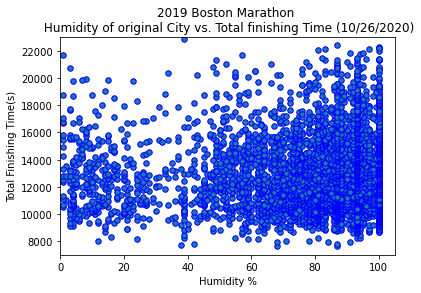

This scatter plot shows that the majority number of runners in our sample, live/train in a humidity over 70%.


<Figure size 432x288 with 0 Axes>

In [51]:
# Plotting Data
plt.scatter(humidity_time_df["Humidity"], humidity_time_df["Seconds"], marker='o',s=30, edgecolors= "blue")
plt.title("2019 Boston Marathon \n Humidity of original City vs. Total finishing Time (10/26/2020)")
plt.xlim(0,105)
plt.ylim(7000,23000)
plt.xlabel("Humidity %")
plt.ylabel("Total Finishing Time(s)")
plt.show()
plt.savefig("output/Humid_vs_Time.png")
print(f"This scatter plot shows that the majority number of runners in our data, live/train in a humidity over 50%.")

In [68]:
high_humidity_data= humidity_time_df.loc[humidity_time_df["Humidity"]>=79]
low_humidity_data= humidity_time_df.loc[humidity_time_df["Humidity"]<79]
print(len(high_humidity_data))
print(len(low_humidity_data))

3659
1785


In [ ]:
high_humidity_time = high_humidity_data["Seconds"]
low_humidity_time =low_humidity_data["Seconds"]

ValueError: `bins` must increase monotonically, when an array

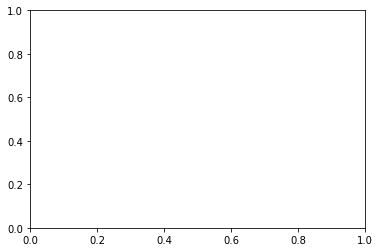

In [61]:
plt.hist(high_humidity_time, 10, density=True, alpha=0.7, label="High Elevation")
plt.hist(low_humidity_time, 10, density=True, alpha=0.7, label="Normal Elevation")
plt.axvline(high_sec_data.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(norm_sec_data.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title(f"2019 Boston Marathon \n Time to Finish per Elevation")
plt.xlabel("Time to Finish (s)")
plt.legend()
print(st.normaltest(second_data.sample(50)))


In [ ]:
northern_max_temp = northern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_max_temp)
line_fit = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_lat, northern_max_temp, marker="o", edgecolors="red")
plt.plot(northern_lat,line_fit,"r-")
plt.title("Northern Hemisphere: City Latitude vs. Max Temperature (10/20/2020)")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("North_Lat_Temp.png")
plt.show()

correlation = st.pearsonr(northern_lat, northern_max_temp)
print(f"The Linear Regression Model is: {line_eq}")
print(f"The r-value is: {round(correlation[0],2)}")
print(f"This scatter plot and regression line show that max temperature decreases as you move away from the equator into the northern hemisphere.")